### LIBRARIES AND VERSION CHECK

In [1]:
# IMPORTS AND PRINTS ALL VERSIONS

import sys                                     # STANDARD LIB TO ACCESS PYTHON RUNTIME DETAILS
import platform                                # STANDARD LIB TO GET OS/PLATFORM INFORMATION
import warnings                                # STANDARD LIB TO CONTROL WARNING MESSAGES
from pathlib import Path                       # STANDARD LIB FOR SAFE, CROSS-PLATFORM PATH HANDLING
from typing import List                        # TYPE HINTS FOR CLARITY AND ROBUSTNESS


import numpy as np                              # NUMERICAL COMPUTING
import pandas as pd                             # DATAFRAMES AND DATA MANIPULATION
import matplotlib                               # BASE PLOTTING BACKEND
import matplotlib.pyplot as plt                 # IMPORTS MATPLOTLIB'S STATEFUL PLOTTING INTERFACE
from matplotlib import rcParams                 # IMPORTS RCPARAMS TO GLOBALLY SET STYLE
from typing import Optional                     # OPTIONAL TYPE HINTING FOR FUNCTION ARGUMENTS
import seaborn as sns                           # STATISTICAL PLOTTING BUILT ON TOP OF MATPLOTLIB
import plotly                                   # INTERACTIVE PLOTTING
import missingno as msno                        # MISSING DATA VISUALIZATION
import sklearn                                  # SCIKIT-LEARN: CLASSIC MACHINE LEARNING
from sklearn.model_selection import KFold       # K-FOLD CROSS-VALIDATION SPLITTER
from sklearn.impute import SimpleImputer        # SIMPLE STRATEGIES TO IMPUTE MISSING VALUES
from sklearn.preprocessing import StandardScaler# STANDARDIZATION (MEAN=0, STD=1)
from sklearn.pipeline import Pipeline           # TO BUILD CLEAN, REUSABLE PREPROCESSING PIPELINES
import statsmodels                              # STATISTICAL MODELS AND TESTS

warnings.filterwarnings("ignore")               # SUPPRESSES NON-CRITICAL WARNINGS FOR CLEANER OUTPUT

print("PYTHON:", sys.version)                   # PRINTS PYTHON VERSION
print("OS:", platform.platform())               # PRINTS OPERATING SYSTEM DETAILS
print("NUMPY:", np.__version__)                 # PRINTS NUMPY VERSION
print("PANDAS:", pd.__version__)                # PRINTS PANDAS VERSION
print("SCIKIT-LEARN:", sklearn.__version__)     # PRINTS SCIKIT-LEARN VERSION
print("MATPLOTLIB:", matplotlib.__version__)    # PRINTS MATPLOTLIB VERSION
print("SEABORN:", sns.__version__)              # PRINTS SEABORN VERSION
print("PLOTLY:", plotly.__version__)            # PRINTS PLOTLY VERSION
print("MISSINGNO:", msno.__version__)           # PRINTS MISSINGNO VERSION
print("STATSMODELS:", statsmodels.__version__)  # PRINTS STATSMODELS VERSION

PYTHON: 3.12.10 (tags/v3.12.10:0cc8128, Apr  8 2025, 12:21:36) [MSC v.1943 64 bit (AMD64)]
OS: Windows-11-10.0.26100-SP0
NUMPY: 2.1.3
PANDAS: 2.3.1
SCIKIT-LEARN: 1.7.1
MATPLOTLIB: 3.10.3
SEABORN: 0.13.2
PLOTLY: 6.2.0
MISSINGNO: 0.5.2
STATSMODELS: 0.14.5


### PLOTTING SETUP

In [2]:
# GLOBAL PLOTTING STYLE TO KEEP ALL FIGURES CRISP, BOLD, UPPERCASE, AND HIGH-IMPACT      
FIGSIZE = (8, 6)                                      # DEFAULT FIGURE SIZE
DPI = 500                                             # HIGH RESOLUTION
LINEWIDTH = 2.0                                       # BOLD LINE WIDTH
GRID_LINEWIDTH = 1.5                                  # BOLD GRID LINES
FONTSIZE_TITLE = 20                                   # LARGE TITLE SIZE
FONTSIZE_LABEL = 16                                   # LARGE AXIS LABEL SIZE
FONTSIZE_TICK = 14                                    # LARGE TICK LABEL SIZE
FONTSIZE_LEGEND = 14                                  # LARGE LEGEND FONT SIZE

def init_plot_style() -> None:                        # DEFINES A FUNCTION TO INITIALIZE GLOBAL STYLE
    """SET GLOBAL MATPLOTLIB STYLE FOR BOLD, UPPERCASE, HIGH-RES FIGURES."""  
    rcParams["figure.figsize"] = FIGSIZE              # SETS FIGURE SIZE
    rcParams["figure.dpi"] = DPI                      # SETS DPI
    rcParams["savefig.dpi"] = DPI                     # HIGH-RES SAVED FIGURES
    rcParams["font.weight"] = "bold"                  # MAKES TEXT BOLD
    rcParams["axes.titleweight"] = "bold"             # BOLD TITLES
    rcParams["axes.labelweight"] = "bold"             # BOLD LABELS
    rcParams["axes.titlesize"] = FONTSIZE_TITLE       # TITLE FONT SIZE
    rcParams["axes.labelsize"] = FONTSIZE_LABEL       # LABEL FONT SIZE
    rcParams["xtick.labelsize"] = FONTSIZE_TICK       # X-TICK LABEL SIZE
    rcParams["ytick.labelsize"] = FONTSIZE_TICK       # Y-TICK LABEL SIZE
    rcParams["legend.fontsize"] = FONTSIZE_LEGEND     # LEGEND FONT SIZE
    rcParams["legend.title_fontsize"] = FONTSIZE_LEGEND  # LEGEND TITLE FONT SIZE
    rcParams["lines.linewidth"] = LINEWIDTH           # DEFAULT LINE WIDTH
    rcParams["grid.linewidth"] = GRID_LINEWIDTH       # GRID LINE WIDTH
    rcParams["axes.grid"] = True                      # ENABLE GRID BY DEFAULT
    rcParams["grid.alpha"] = 0.3                      # GRID TRANSPARENCY
    rcParams["axes.spines.top"] = True                # SHOW TOP SPINE
    rcParams["axes.spines.right"] = True              # SHOW RIGHT SPINE

def boldify_axes(ax: plt.Axes,
                 title: str = "",
                 xlabel: str = "",
                 ylabel: str = "",
                 legend: bool = True) -> None:
    """UPPERCASE + BOLD ALL TEXT ELEMENTS ON AN AXES OBJECT."""  
    if title:                                                    # CHECKS IF TITLE IS PROVIDED
        ax.set_title(title.upper(), weight="bold", size=FONTSIZE_TITLE)    # SETS BOLD, UPPERCASE TITLE
    if xlabel:                                                   # CHECKS IF XLABEL IS PROVIDED
        ax.set_xlabel(xlabel.upper(), weight="bold", size=FONTSIZE_LABEL)  # SETS BOLD, UPPERCASE XLABEL
    if ylabel:                                                   # CHECKS IF YLABEL IS PROVIDED
        ax.set_ylabel(ylabel.upper(), weight="bold", size=FONTSIZE_LABEL)  # SETS BOLD, UPPERCASE YLABEL

    for tick in ax.get_xticklabels():                             # LOOPS OVER X TICKS
        tick.set_fontweight("bold")                               # MAKES THEM BOLD
        tick.set_fontsize(FONTSIZE_TICK)                          # SETS FONT SIZE
        tick.set_text(str(tick.get_text()).upper())               # UPPERCASES TEXT

    for tick in ax.get_yticklabels():                             # LOOPS OVER Y TICKS
        tick.set_fontweight("bold")                               # MAKES THEM BOLD
        tick.set_fontsize(FONTSIZE_TICK)                          # SETS FONT SIZE
        tick.set_text(str(tick.get_text()).upper())               # UPPERCASES TEXT

    for spine in ax.spines.values():                              # ITERATES OVER SPINES
        spine.set_linewidth(2.0)                                  # MAKES SPINES THICK

    if legend and ax.get_legend() is not None:                     # IF LEGEND EXISTS, FORMAT IT
        leg = ax.get_legend()                                      # GETS LEGEND HANDLE
        if leg.get_title() is not None:                            # IF LEGEND TITLE EXISTS
            leg.get_title().set_text(leg.get_title().get_text().upper())  # UPPERCASE LEGEND TITLE
            leg.get_title().set_fontweight("bold")                 # BOLD LEGEND TITLE
        for text in leg.get_texts():                               # FOR EACH LEGEND LABEL
            text.set_text(text.get_text().upper())                 # UPPERCASE TEXT
            text.set_fontweight("bold")                            # BOLD TEXT
            text.set_fontsize(FONTSIZE_LEGEND)                     # SET FONT SIZE

def finalize_figure(fig: plt.Figure, suptitle: str = "") -> None:
    """APPLY SUPTITLE (UPPERCASE, BOLD) AND TIGHT LAYOUT."""       
    if suptitle:                                                   # IF SUPTITLE PROVIDED
        fig.suptitle(suptitle.upper(), fontsize=FONTSIZE_TITLE, fontweight="bold")  # SETS BOLD, UPPERCASE SUPTITLE
    fig.tight_layout()                                             # TIGHT LAYOUT TO PREVENT CLIPPING

init_plot_style()                                                  # INITIALIZES THE GLOBAL STYLE

### CONFIG & REPRODUCIBILITY

In [3]:
# CONFIGURATION FOR REPRODUCIBILITY AND PROJECT-SPECIFIC CONSTANTS                     

GLOBAL_SEED = 42                                    # GLOBAL SEED FOR REPRODUCIBILITY
np.random.seed(GLOBAL_SEED)                         # SETS NUMPY SEED

TARGET_COLS: List[str] = ["frequency", "return loss", "gain"]  # MULTI-OUTPUT TARGETS 
FEATURE_COLS: List[str] = ["il", "iw", "pw", "ro"]     # FEATURES 

N_SPLITS: int = 5                                   # DEFAULT K-FOLD SPLITS 
SHUFFLE_KFOLD: bool = True                          # SHUFFLE BEFORE SPLITTING FOR BETTER MIXING
KFOLD_RANDOM_STATE: int = GLOBAL_SEED               # REPRODUCIBLE SHUFFLING

SAVE_DIR = Path("../DATA")              # DIRECTORY TO SAVE CLEANED DATA
SAVE_DIR.mkdir(parents=True, exist_ok=True)         # CREATES DIRECTORY IF IT DOES NOT EXIST

print("GLOBAL SEED:", GLOBAL_SEED)                  # CONFIRMS GLOBAL SEED
print("K-FOLD SPLITS:", N_SPLITS)                   # CONFIRMS NUMBER OF K-FOLDS
print("FEATURE COLS:", FEATURE_COLS)                # DISPLAYS FEATURE COLUMNS
print("TARGET COLS:", TARGET_COLS)                  # DISPLAYS TARGET COLUMNS

GLOBAL SEED: 42
K-FOLD SPLITS: 5
FEATURE COLS: ['il', 'iw', 'pw', 'ro']
TARGET COLS: ['frequency', 'return loss', 'gain']


### DATA READING

In [4]:
DATA_CSV_PATH = Path("../DATA/DATA.csv")            # ENVIRONMENT PATH 

def safe_read_csv(path: Path) -> pd.DataFrame:      # DEFINES A SAFE CSV READER FUNCTION
    """
    SAFELY READ A CSV FILE AND RETURN A PANDAS DATAFRAME.
    RAISES A CLEAR ERROR IF THE FILE IS NOT FOUND OR IS EMPTY.
    """                                              
    if not path.exists():                            # CHECKS IF FILE EXISTS
        raise FileNotFoundError(f"FILE NOT FOUND: {path}")  # RAISES FRIENDLY ERROR IF MISSING
    df_local = pd.read_csv(path)                     # READS CSV INTO DATAFRAME
    if df_local.empty:                               # CHECKS IF DATAFRAME IS EMPTY
        raise ValueError("THE CSV FILE IS EMPTY.")   # RAISES ERROR IF NO DATA
    return df_local                                  # RETURNS THE LOADED DATAFRAME

try:                                                 # STARTS ERROR-HANDLED BLOCK
    df = safe_read_csv(DATA_CSV_PATH)                # TRIES TO LOAD THE CSV USING OUR FUNCTION
    print("DATA LOADED SUCCESSFULLY!")               # CONFIRMS SUCCESS
    print("SHAPE:", df.shape)                        # PRINTS NUMBER OF ROWS AND COLUMNS
except Exception as e:                               # CATCHES ANY EXCEPTION
    print("FAILED TO LOAD DATA:", str(e))            # PRINTS ERROR MESSAGE
    raise                                            # RERAISES ERROR FOR VISIBILITY

DATA LOADED SUCCESSFULLY!
SHAPE: (1297, 22)


### DATASET OVERVIEW

In [5]:
# BASIC, CRITICAL INSPECTIONS TO UNDERSTAND STRUCTURE, TYPES, AND MISSINGNESS.         

print("HEAD:")                                       # PRINTS A HEADER MESSAGE
display(df.head())                                   # SHOWS FIRST 5 ROWS

print("INFO:")                                       # PRINTS A HEADER MESSAGE
df.info()                                            # SHOWS COLUMN TYPES AND NULL COUNTS

print("DESCRIBE:")                                   # PRINTS A HEADER MESSAGE
display(df.describe().T)                             # SHOWS SUMMARY STATS AND TRANSPOSES FOR READABILITY

print("NUMBER OF DUPLICATES:", df.duplicated().sum())  # PRINTS HOW MANY DUPLICATE ROWS EXIST

missing_pct = df.isna().mean().sort_values(ascending=False) * 100  # CALCULATES MISSING PERCENT PER COLUMN
print("MISSING VALUES (%) PER COLUMN:")              # PRINTS A HEADER MESSAGE
display(missing_pct.to_frame("missing_percentage"))  # DISPLAYS AS A ONE-COLUMN DATAFRAME

HEAD:


fl   fw   gh   il   iw  pchl  pcl   pcw   ph   pil  ...    pw   ri   ro  \
0  1.0  1.0  0.1  0.6  3.5  15.0  1.0  22.0  0.4  14.0  ...  35.0  1.0  3.5   
1  1.0  1.0  0.1  0.6  3.5  15.0  1.0  22.0  0.4  14.0  ...  33.2  1.0  3.5   
2  1.0  1.0  0.1  0.6  3.5  15.0  1.0  22.0  0.4  14.0  ...  31.9  1.0  3.5   
3  1.0  1.0  0.1  0.6  3.5  15.0  1.0  22.0  0.4  14.0  ...  30.6  1.0  3.5   
4  1.0  1.0  0.1  0.6  3.5  15.0  1.0  22.0  0.4  14.0  ...  29.3  1.0  3.5   

    sh    sl    sw    freq        s11      gain  bandwidth  
0  3.0  41.0  50.0  4.2778 -21.447149  1.713390   0.073339  
1  3.0  41.0  50.0  7.8913 -29.974880  6.672563        NaN  
2  3.0  41.0  50.0  6.7825 -29.186930  4.348915   0.203333  
3  3.0  41.0  50.0  8.7130 -35.987275  8.515079   1.563093  
4  3.0  41.0  50.0  7.3270 -22.439577  6.253887   0.634561  

[5 rows x 22 columns]

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fl         1297 non-null   float64
 1   fw         1297 non-null   float64
 2   gh         1297 non-null   float64
 3   il         1297 non-null   float64
 4   iw         1297 non-null   float64
 5   pchl       1297 non-null   float64
 6   pcl        1297 non-null   float64
 7   pcw        1297 non-null   float64
 8   ph         1297 non-null   float64
 9   pil        1297 non-null   float64
 10  piw        1297 non-null   float64
 11  pl         1297 non-null   float64
 12  pw         1297 non-null   float64
 13  ri         1297 non-null   float64
 14  ro         1297 non-null   float64
 15  sh         1297 non-null   float64
 16  sl         1297 non-null   float64
 17  sw         1297 non-null   float64
 18  freq       1297 non-null   float64
 19  s11        1297 non-null   float64
 20  ga

count       mean           std        min        25%        50%  \
fl         1297.0   1.000000  0.000000e+00   1.000000   1.000000   1.000000   
fw         1297.0   1.000000  0.000000e+00   1.000000   1.000000   1.000000   
gh         1297.0   0.100000  1.388314e-17   0.100000   0.100000   0.100000   
il         1297.0   0.350193  1.709235e-01   0.100000   0.200000   0.400000   
iw         1297.0   3.250193  1.709235e-01   3.000000   3.100000   3.300000   
pchl       1297.0  15.000000  0.000000e+00  15.000000  15.000000  15.000000   
pcl        1297.0   1.000000  0.000000e+00   1.000000   1.000000   1.000000   
pcw        1297.0  22.000000  0.000000e+00  22.000000  22.000000  22.000000   
ph         1297.0   0.400000  5.553256e-17   0.400000   0.400000   0.400000   
pil        1297.0  14.000000  0.000000e+00  14.000000  14.000000  14.000000   
piw        1297.0  20.000000  0.000000e+00  20.000000  20.000000  20.000000   
pl         1297.0  22.000000  0.000000e+00  22.000000  22.000000  22.000000   
pw         1297.0  31.336160  2.348600e+00  28.000000  29.300000  31.900000   
ri         1297.0   1.000000  0.000000e+00   1.000000   1.000000   1.000000   
ro         1297.0   3.250193  1.709235e-01   3.000000   3.100000   3.300000   
sh         1297.0   3.000000  0.000000e+00   3.000000   3.000000   3.000000   
sl         1297.0  41.000000  0.000000e+00  41.000000  41.000000  41.000000   
sw         1297.0  50.000000  0.000000e+00  50.000000  50.000000  50.000000   
freq       1297.0   6.479328  1.807244e+00   2.634400   4.436200   6.931000   
s11        1297.0 -25.671353  7.660760e+00 -55.213850 -30.000622 -24.098607   
gain       1297.0   4.939448  2.548351e+00   0.277401   2.880059   4.944140   
bandwidth  1289.0   0.429016  4.849070e-01   0.064673   0.080609   0.205658   

                 75%        max  
fl          1.000000   1.000000  
fw          1.000000   1.000000  
gh          0.100000   0.100000  
il          0.500000   0.600000  
iw          3.400000   3.500000  
pchl       15.000000  15.000000  
pcl         1.000000   1.000000  
pcw        22.000000  22.000000  
ph          0.400000   0.400000  
pil        14.000000  14.000000  
piw        20.000000  20.000000  
pl         22.000000  22.000000  
pw         33.200000  35.000000  
ri          1.000000   1.000000  
ro          3.400000   3.500000  
sh          3.000000   3.000000  
sl         41.000000  41.000000  
sw         50.000000  50.000000  
freq        7.970500   9.455500  
s11       -19.607467 -12.984603  
gain        7.634350   8.618472  
bandwidth   0.637233   2.408238

NUMBER OF DUPLICATES: 1
MISSING VALUES (%) PER COLUMN:


missing_percentage
bandwidth            0.616808
fl                   0.000000
gh                   0.000000
il                   0.000000
iw                   0.000000
fw                   0.000000
pchl                 0.000000
pcl                  0.000000
ph                   0.000000
pcw                  0.000000
piw                  0.000000
pl                   0.000000
pw                   0.000000
pil                  0.000000
ri                   0.000000
ro                   0.000000
sl                   0.000000
sh                   0.000000
sw                   0.000000
freq                 0.000000
s11                  0.000000
gain                 0.000000

In [6]:
# RENAME 'FREQ' TO 'FREQUENCY' AND 'S11' TO 'RETURN LOSS'
df.rename(columns={'freq': 'frequency', 's11': 'return loss'}, inplace=True)

# PRINT ALL COLUMN NAMES
print(list(df.columns))

['fl', 'fw', 'gh', 'il', 'iw', 'pchl', 'pcl', 'pcw', 'ph', 'pil', 'piw', 'pl', 'pw', 'ri', 'ro', 'sh', 'sl', 'sw', 'frequency', 'return loss', 'gain', 'bandwidth']


### MISSINGNESS VISUALIZATION

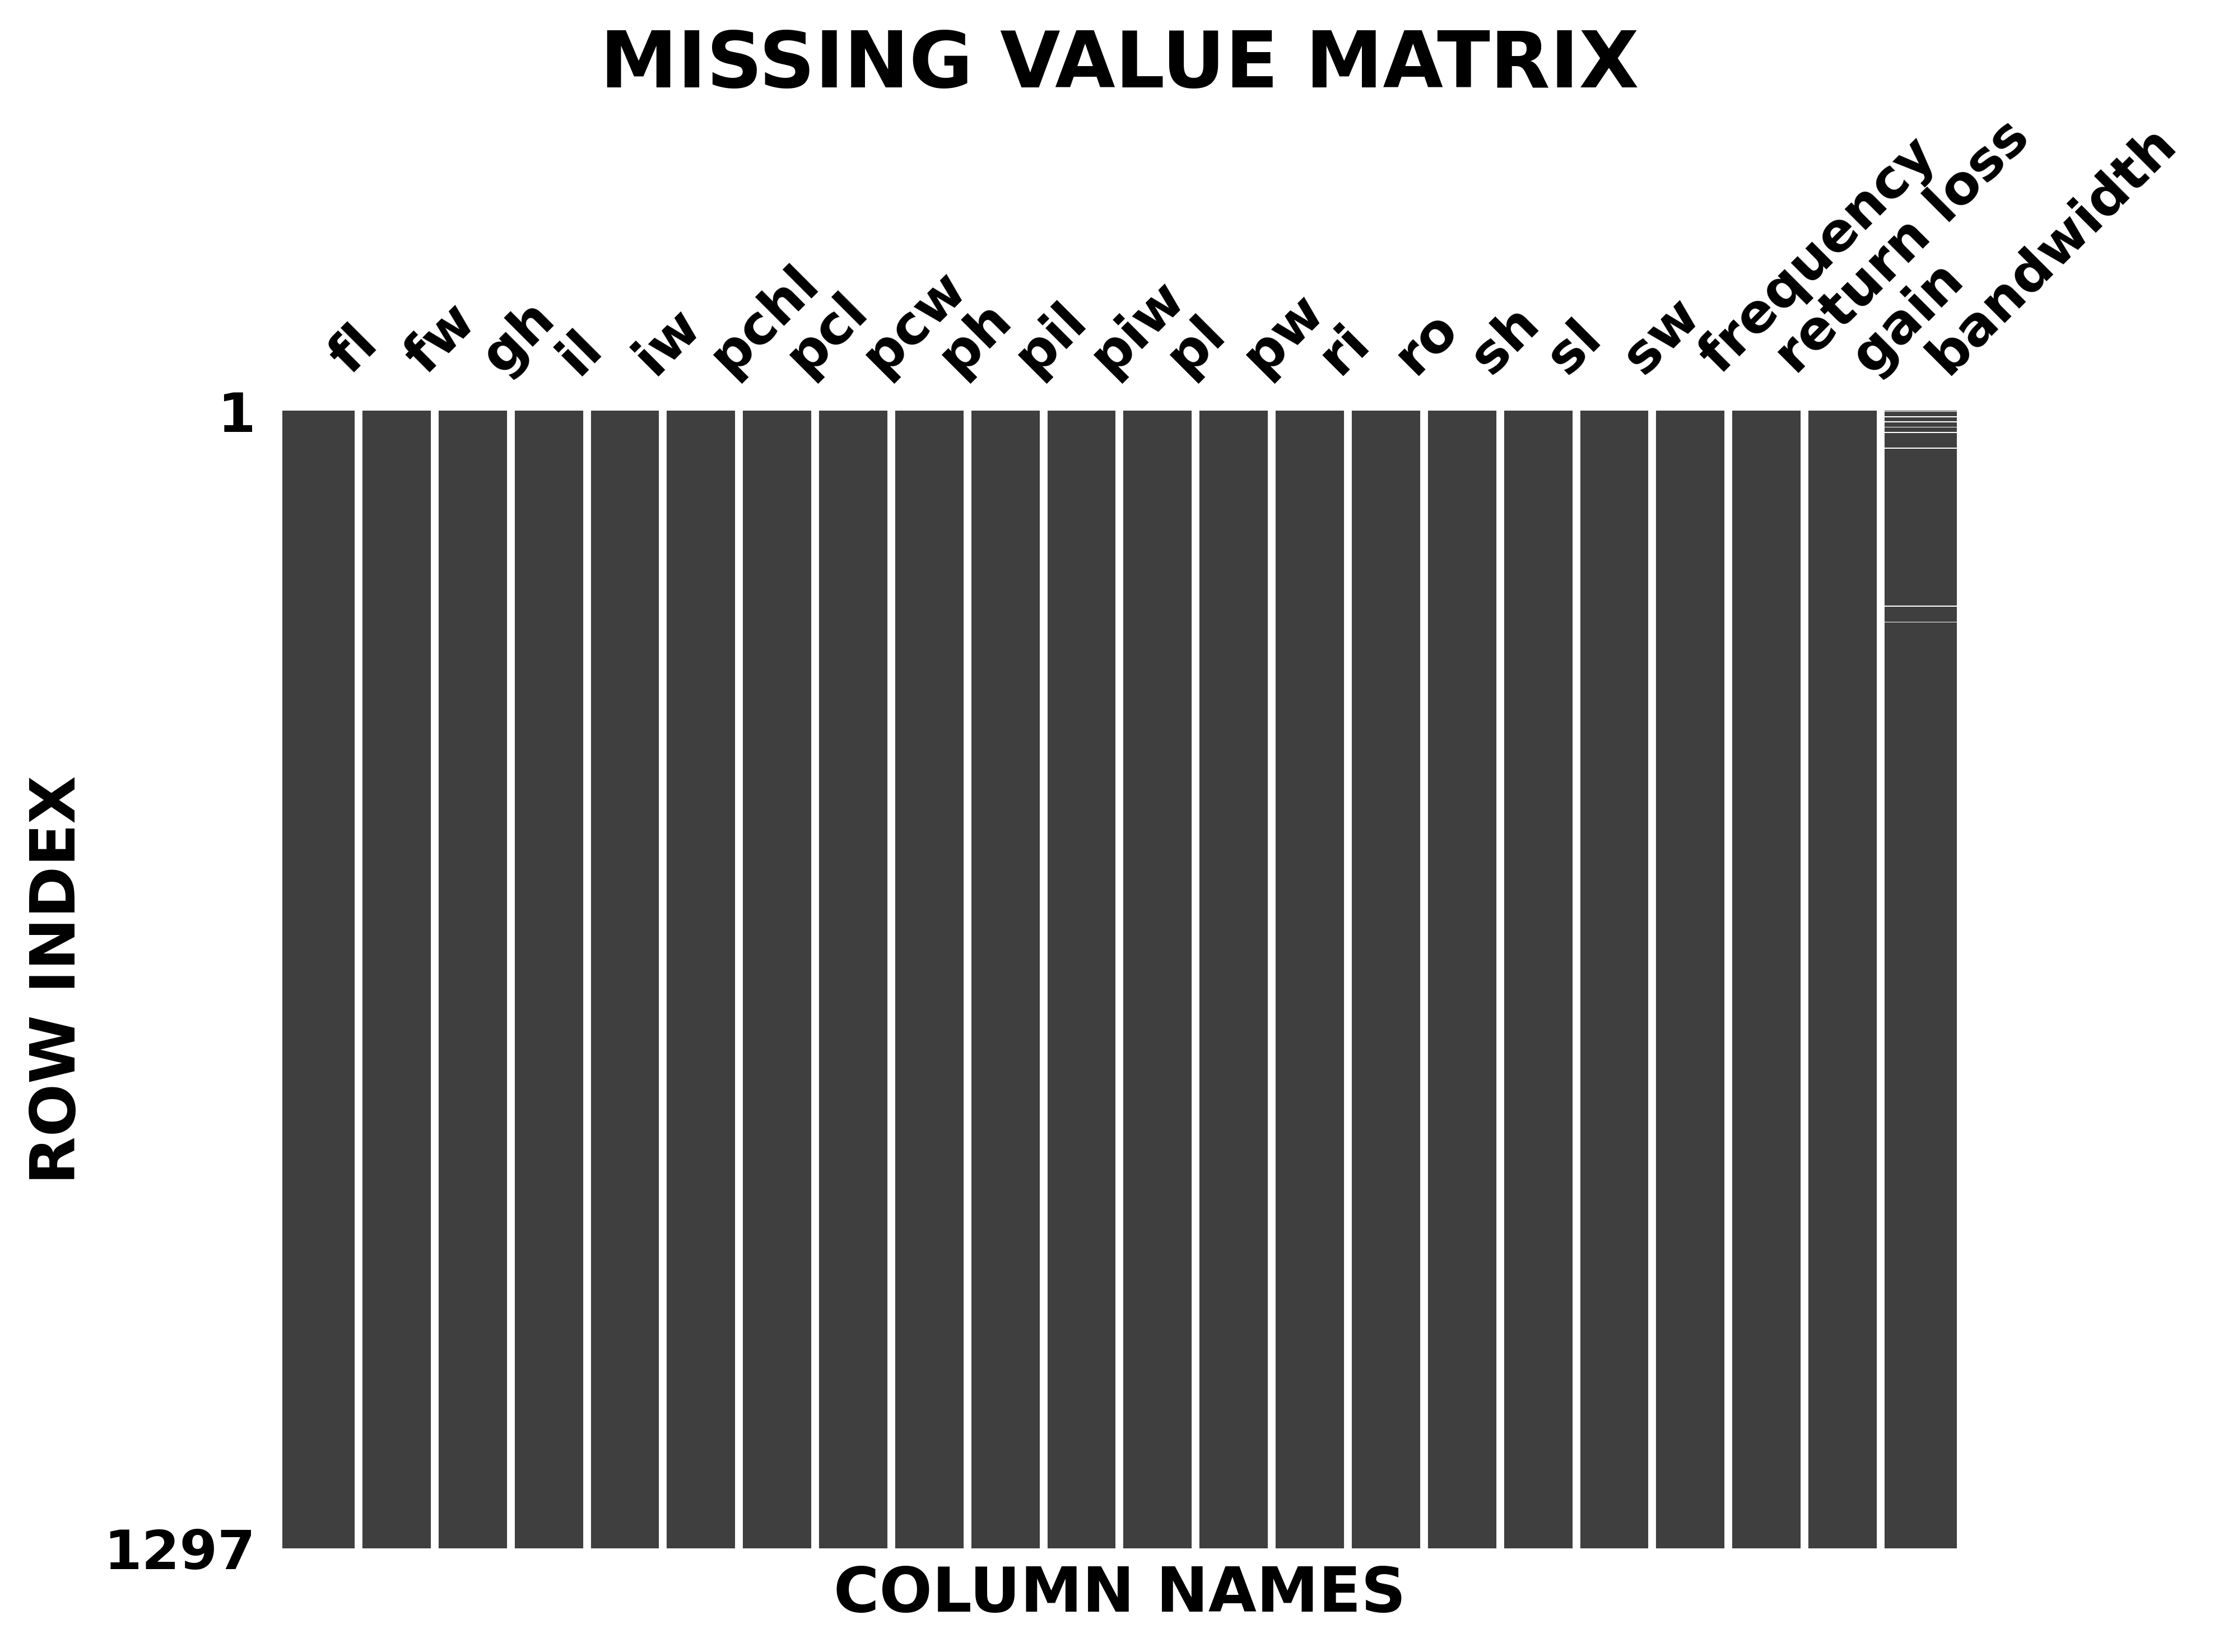

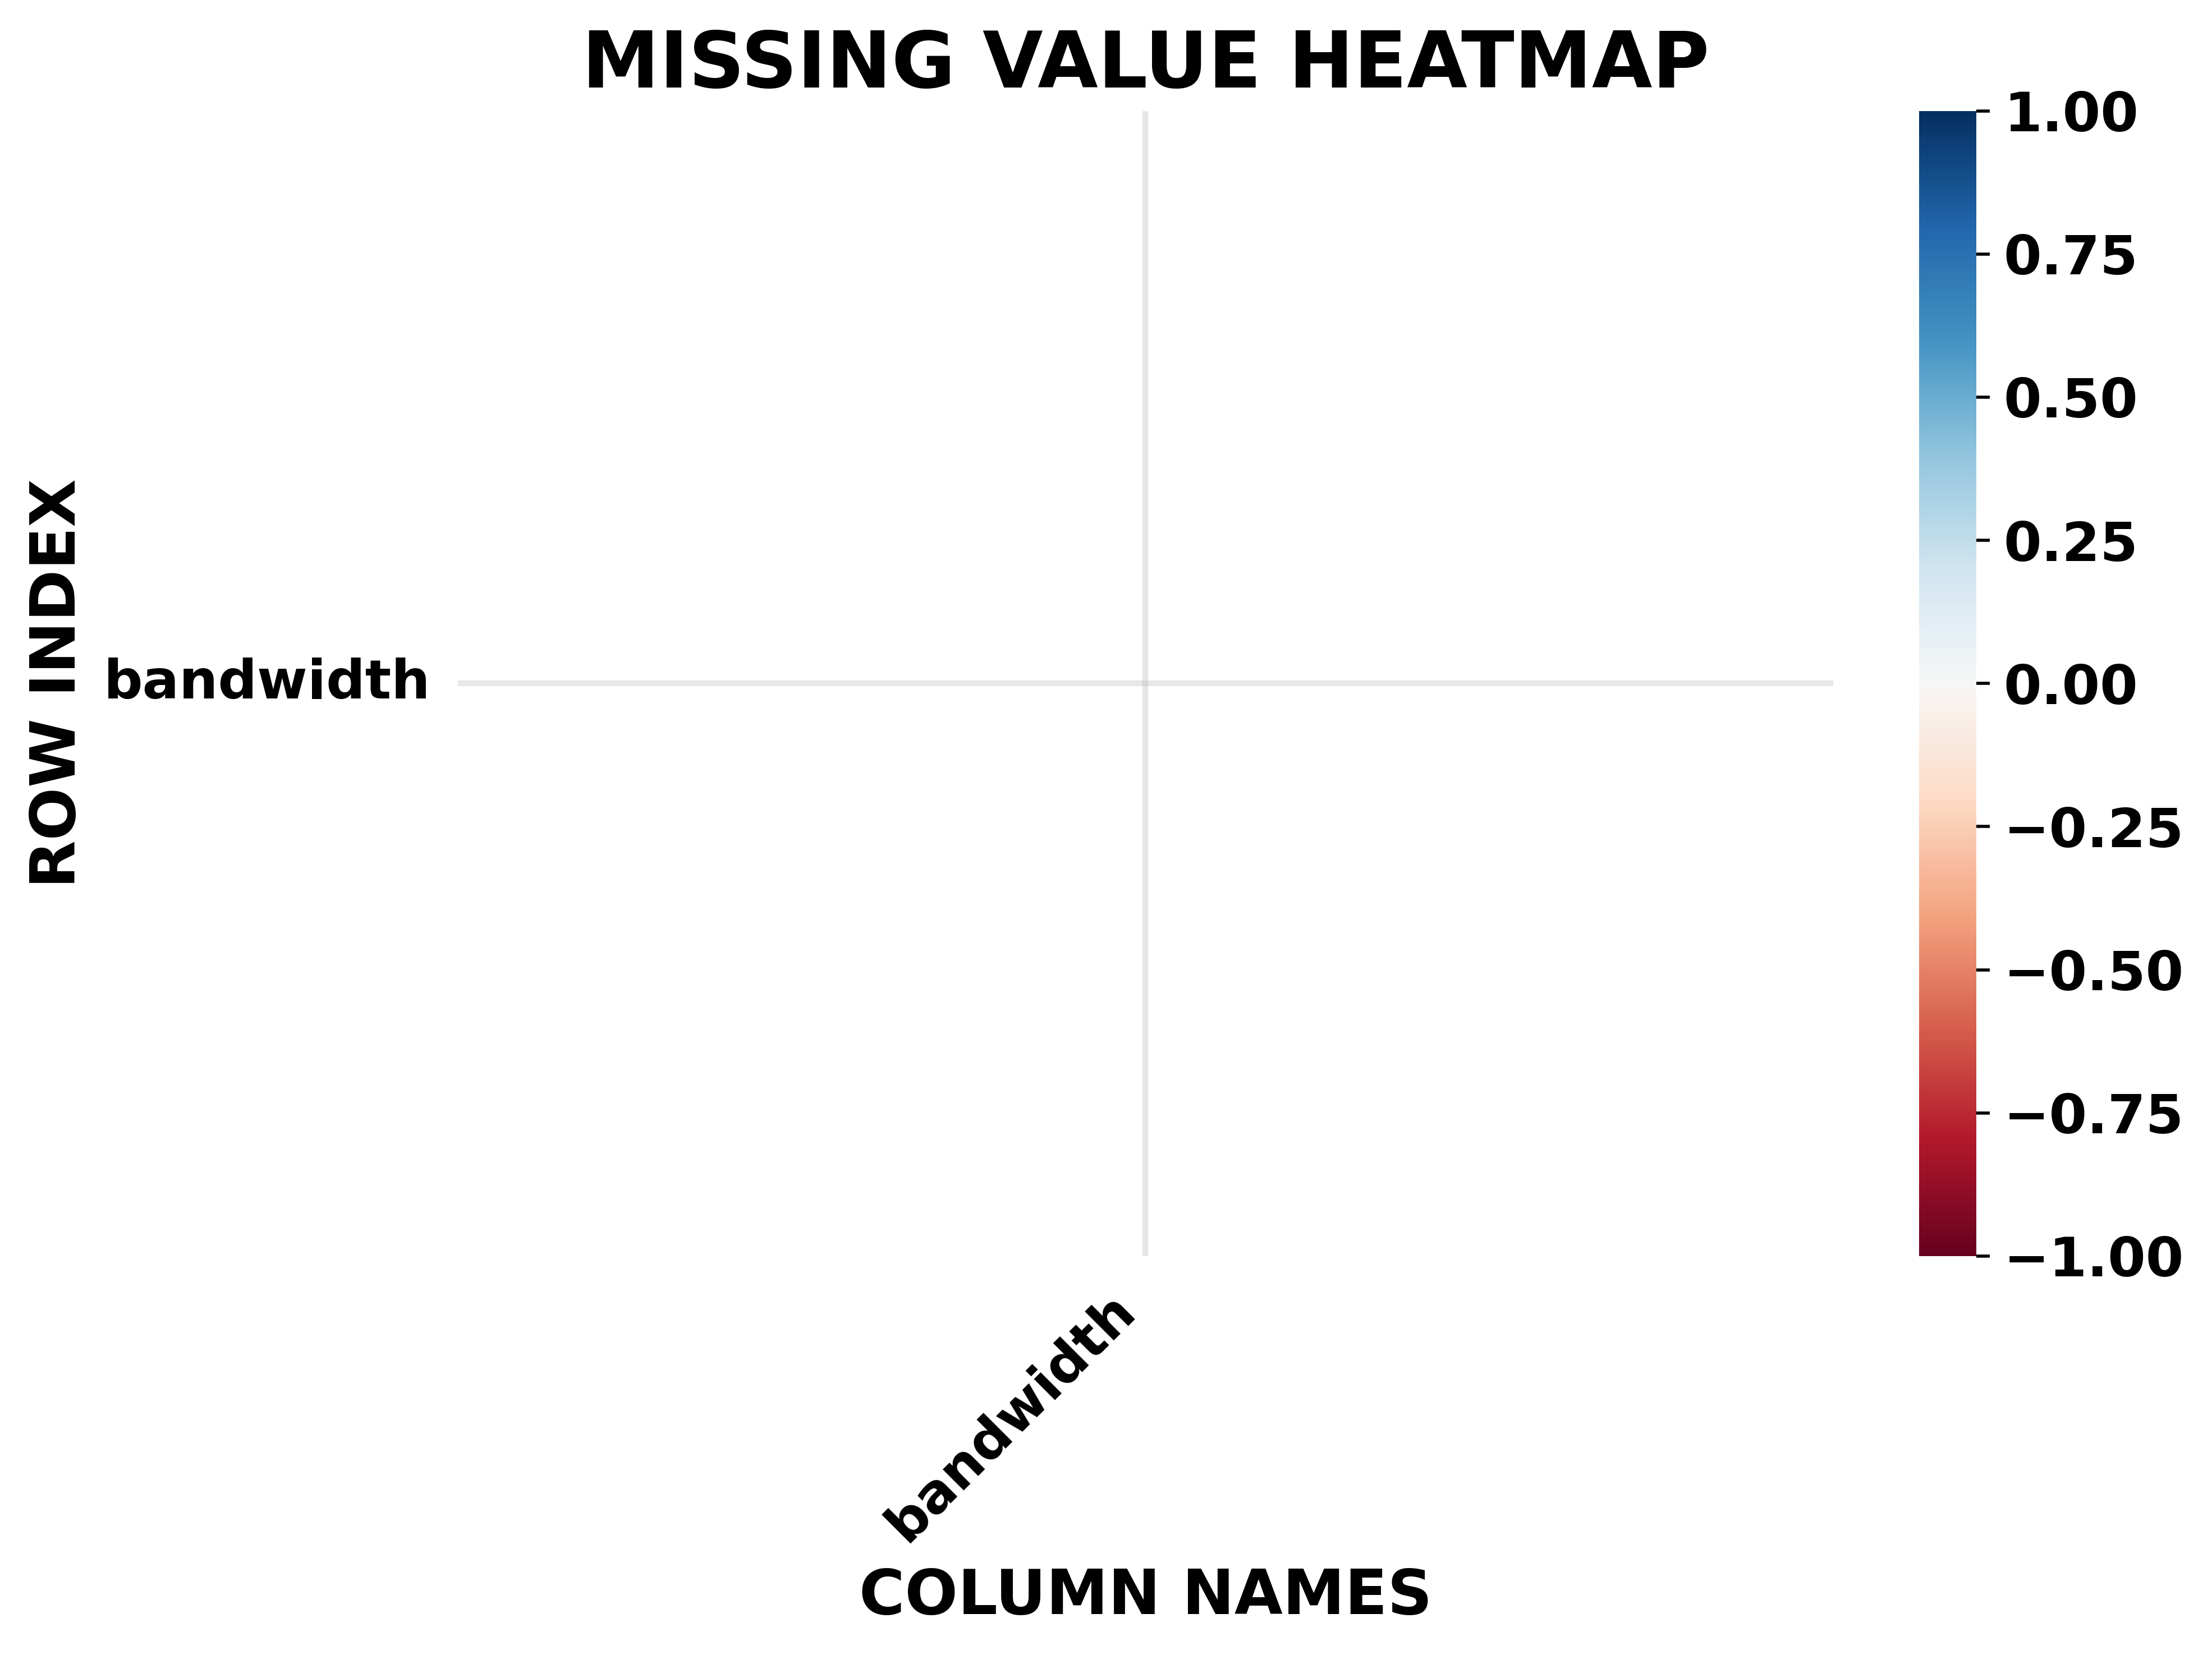

In [7]:
# FUNCTION TO APPLY BOLD STYLING TO A MISSINGNO PLOT                                     
def style_missingno_plot(ax: plt.Axes, title: str) -> None:
    """
    APPLY BOLD STYLING AND TITLES TO MISSINGNO PLOTS.
    """
    boldify_axes(ax, title=title, xlabel="COLUMN NAMES", ylabel="ROW INDEX", legend=False)  # APPLIES BOLD FORMATTING
    finalize_figure(ax.figure)                                                              # ENSURES TIGHT LAYOUT

# MATRIX PLOT                                                                           
fig, ax = plt.subplots(figsize=FIGSIZE, dpi=DPI)     # CREATES FIGURE AND AXES 
msno.matrix(df, ax=ax)                               # PLOTS MISSINGNO MATRIX
style_missingno_plot(ax, title="MISSING VALUE MATRIX")  # APPLIES BOLD STYLING

# HEATMAP PLOT                                                                         
fig, ax = plt.subplots(figsize=FIGSIZE, dpi=DPI)     # CREATES FIGURE AND AXES FOR HEATMAP
msno.heatmap(df, ax=ax)                              # PLOTS MISSINGNO HEATMAP
style_missingno_plot(ax, title="MISSING VALUE HEATMAP")  # APPLIES BOLD STYLING

plt.show()                                          # DISPLAYS THE PLOTS

### SELECT FEATURES AND TARGETS

In [8]:
# SUBSET THE DATAFRAME TO THE COLUMNS WE WILL USE (FEATURES + TARGETS)                   

expected_cols = set(FEATURE_COLS + TARGET_COLS)        # SET OF EXPECTED COLUMNS
missing_expected = expected_cols - set(df.columns)     # CHECKS IF ANY EXPECTED COL IS MISSING
if missing_expected:                                   # IF MISSING COLUMNS ARE FOUND
    raise KeyError(f"MISSING COLUMNS IN DATASET: {missing_expected}")  # RAISES ERROR

df_model = df[FEATURE_COLS + TARGET_COLS].copy()       # CREATES A CLEAN COPY WITH ONLY NEEDED COLS
print("MODEL DF SHAPE:", df_model.shape)               # PRINTS NEW SHAPE

MODEL DF SHAPE: (1297, 7)


### DUPLICATES HANDLING

In [9]:
# REMOVE DUPLICATES TO AVOID LEAKAGE/BIAS                                              

before = df_model.shape[0]                           # ROW COUNT BEFORE
df_model = df_model.drop_duplicates()                # DROPS DUPLICATE ROWS
after = df_model.shape[0]                            # ROW COUNT AFTER
print("DROPPED DUPLICATES:", before - after)         # PRINTS HOW MANY WERE DROPPED

DROPPED DUPLICATES: 1


### TYPE FIXING

In [10]:
# ENSURE ALL FEATURES/TARGETS ARE NUMERIC        

df_model = df_model.apply(pd.to_numeric, errors="coerce")  # COERCES NON-NUMERIC TO NAN
print("AFTER TYPE COERCION, NULLS PER COLUMN:")            # HEADER PRINT
display(df_model.isna().sum().to_frame("null_count"))      # DISPLAYS NULL COUNTS AFTER COERCION

AFTER TYPE COERCION, NULLS PER COLUMN:


null_count
il                    0
iw                    0
pw                    0
ro                    0
frequency             0
return loss           0
gain                  0

### OUTLIER CHECKS (VISUAL + Z-SCORE)

In [11]:
# WE WILL DO BASIC OUTLIER VISUALIZATION USING BOXPLOTS AND Z-SCORE FILTERS             

from scipy import stats                               # IMPORTS SCIPY STATS FOR Z-SCORE

numeric_cols = df_model.columns.tolist()              # ALL COLUMNS ARE NUMERIC 
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(8, 4 * len(numeric_cols)), dpi=DPI)  # CREATES SUBPLOTS
if len(numeric_cols) == 1:                            # HANDLES EDGE CASE WHERE ONLY ONE COLUMN
    axes = [axes]                                     # MAKES IT ITERABLE

for ax, col in zip(axes, numeric_cols):               # LOOPS OVER COLUMNS
    sns.boxplot(x=df_model[col], ax=ax)               # DRAWS BOXPLOT
    boldify_axes(ax, title=f"boxplot - {col}", xlabel=col, ylabel="")         # FORMATS EACH AXES
    finalize_figure(fig, suptitle="outlier inspection \n via boxplots")       # FINALIZES FIGURE
    fig.tight_layout(rect=[0, 0, 1, 0.96])            # FINALIZE THE LAYOUT WITH MORE SPACE FOR SUPTITLE
plt.show()                                            # SHOWS PLOT

z_scores = np.abs(stats.zscore(df_model[numeric_cols], nan_policy="omit"))  # COMPUTES ABS Z-SCORES
outlier_mask = (z_scores > 3).any(axis=1)             # FLAG ROWS WITH ANY Z-SCORE > 3
print("ROWS FLAGGED AS OUTLIERS BY Z>3:", outlier_mask.sum())  # PRINTS COUNT

ROWS FLAGGED AS OUTLIERS BY Z>3: 9


In [12]:
outliers_df = df_model[outlier_mask]  # GET THE ROWS FLAGGED AS OUTLIERS BASED ON Z-SCORE CONDITION
print(outliers_df)                    # DISPLAY THE OUTLIERS TO INSPECT THEM (SEE IF THEY ARE VALID OR ERRORS)

       il   iw    pw   ro  frequency  return loss      gain
185   0.1  3.5  28.0  3.5     7.7131   -49.578300  7.845418
215   0.1  3.5  28.0  3.0     7.7131   -50.711651  7.874395
219   0.6  3.4  30.6  3.5     8.6734   -49.849481  8.484088
225   0.6  3.4  30.6  3.4     8.6932   -50.847014  8.488336
380   0.2  3.4  31.9  3.2     7.9705   -50.263383  7.725528
857   0.1  3.2  28.0  3.1     9.0100   -49.375897  6.176324
1138  0.5  3.0  29.3  3.2     8.8120   -55.213850  8.061559
1196  0.3  3.0  31.9  3.4     7.9804   -52.452133  7.721920
1262  0.1  3.0  31.9  3.5     9.4258   -48.858964  6.740287


### SCALING AND IMPUTATION PIPELINE

In [13]:
# BUILD A REUSABLE, CLEAN PIPELINE FOR NUMERIC PREPROCESSING (IMPUTATION + SCALING)      

numeric_pipeline = Pipeline(steps=[                   # DEFINES A PIPELINE OBJECT
    ("imputer", SimpleImputer(strategy="median")),    # IMPUTES MISSING NUMERICAL VALUES WITH MEDIAN
    ("scaler", StandardScaler())                      # STANDARDIZES FEATURES (MEAN 0, STD 1)
])                                                    # CLOSES PIPELINE DEFINITION

print("NUMERIC PIPELINE DEFINED (IMPUTE=MEDIAN, SCALE=STANDARD).")  # CONFIRMS PIPELINE

NUMERIC PIPELINE DEFINED (IMPUTE=MEDIAN, SCALE=STANDARD).


### APPLY PREPROCESSING

In [14]:
# FIT-TRANSFORM FEATURES; FOR TARGETS, AND KEEP THEM AS-IS 

X = df_model[FEATURE_COLS].values                    # EXTRACTS FEATURES AS NUMPY ARRAY
Y = df_model[TARGET_COLS].values                     # EXTRACTS TARGETS AS NUMPY ARRAY (MULTI-OUTPUT)

X_processed = numeric_pipeline.fit_transform(X)      # FITS + TRANSFORMS FEATURES
print("X SHAPE:", X.shape)                           # PRINTS ORIGINAL FEATURE SHAPE
print("X PROCESSED SHAPE:", X_processed.shape)       # PRINTS PROCESSED FEATURE SHAPE
print("Y SHAPE:", Y.shape)                           # PRINTS TARGET SHAPE

X SHAPE: (1296, 4)
X PROCESSED SHAPE: (1296, 4)
Y SHAPE: (1296, 3)


### SAVE CLEANED DATA

In [15]:
# SAVE THE CLEANED/PROCESSED DATA FOR FUTURE STAGES & REPRODUCIBILITY                   

X_df = pd.DataFrame(X_processed, columns=FEATURE_COLS)  # CONVERTS PROCESSED X BACK TO DATAFRAME
Y_df = pd.DataFrame(Y, columns=TARGET_COLS)             # CREATES DATAFRAME FOR TARGETS

cleaned_df = pd.concat([X_df, Y_df], axis=1)            # CONCATENATES FEATURES AND TARGETS
cleaned_csv_path = SAVE_DIR / "DATA[P].csv"   # DEFINES SAVE PATH
cleaned_df.to_csv(cleaned_csv_path, index=False)        # SAVES TO CSV WITHOUT INDEX
print("CLEANED DATA SAVED TO:", cleaned_csv_path)       # CONFIRMS SAVE LOCATION

CLEANED DATA SAVED TO: ..\DATA\DATA[P].csv


### UNIVARIATE ANALYSIS

column  skewness  kurtosis
0           il  0.000000 -1.268835
1           iw  0.000000 -1.268835
2           pw  0.131032 -1.164248
3           ro  0.000000 -1.268835
4    frequency -0.105101 -1.457328
5  return loss -0.707514  0.410093
6         gain -0.103986 -1.382413

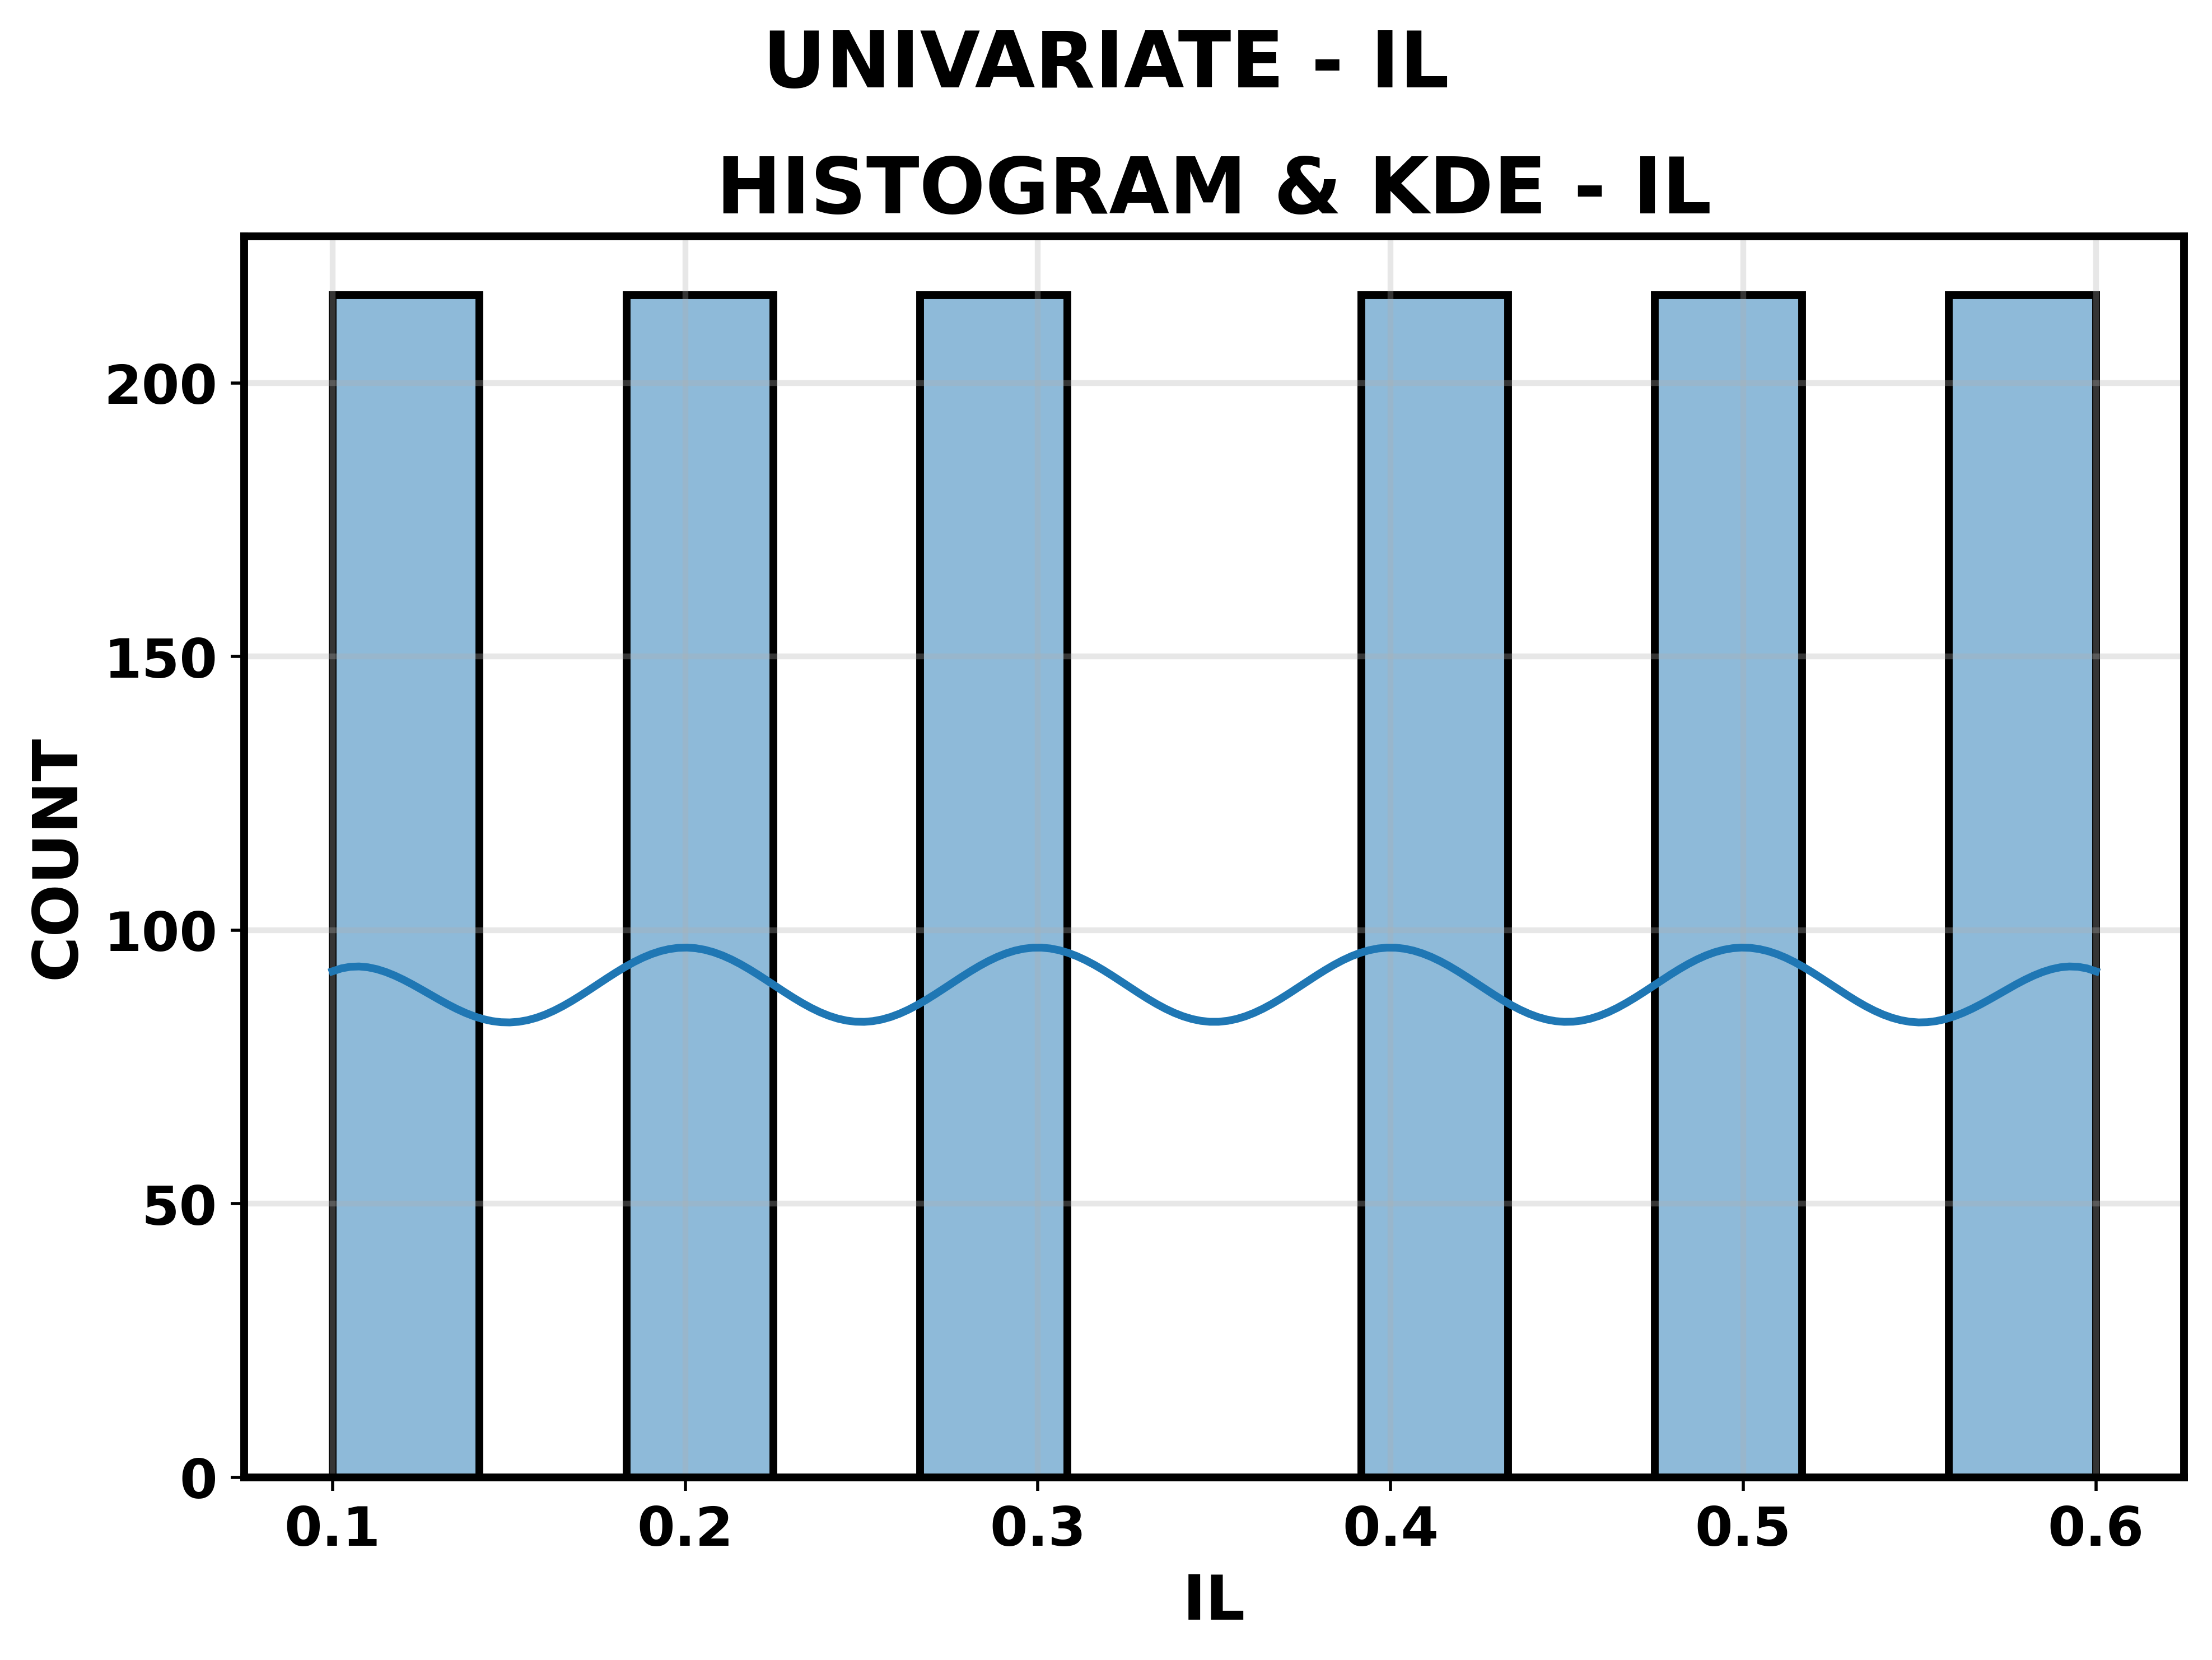

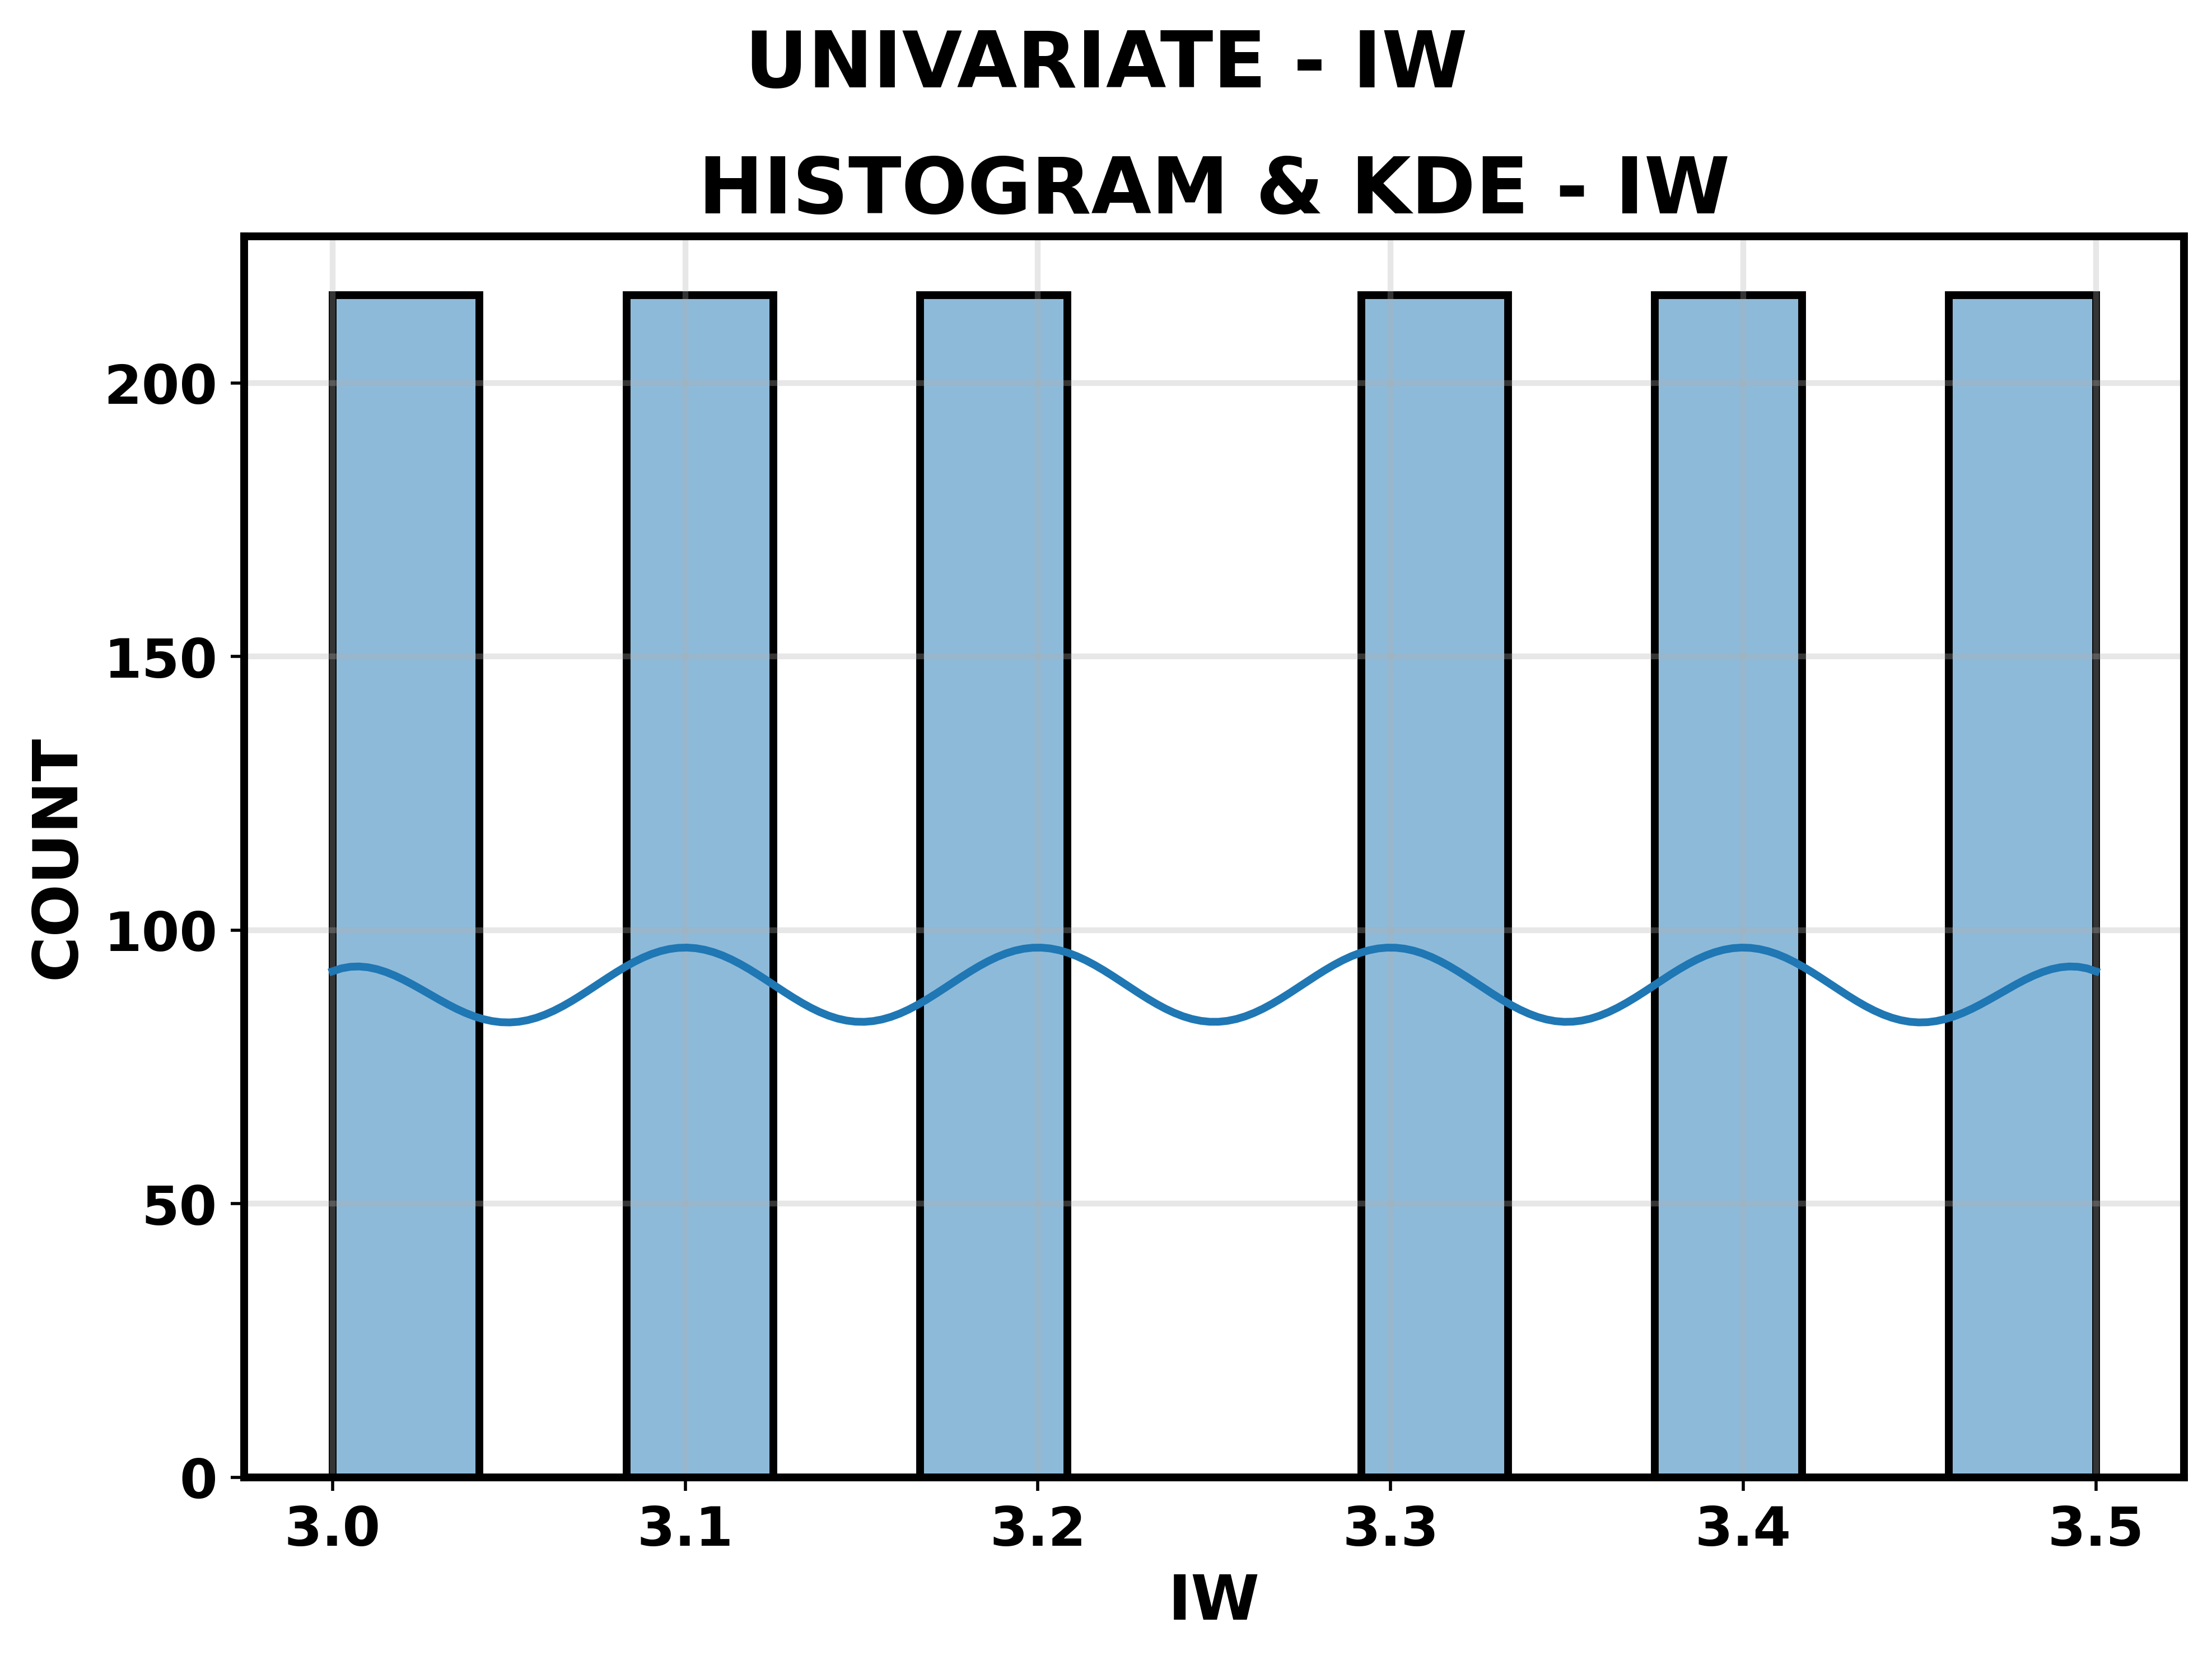

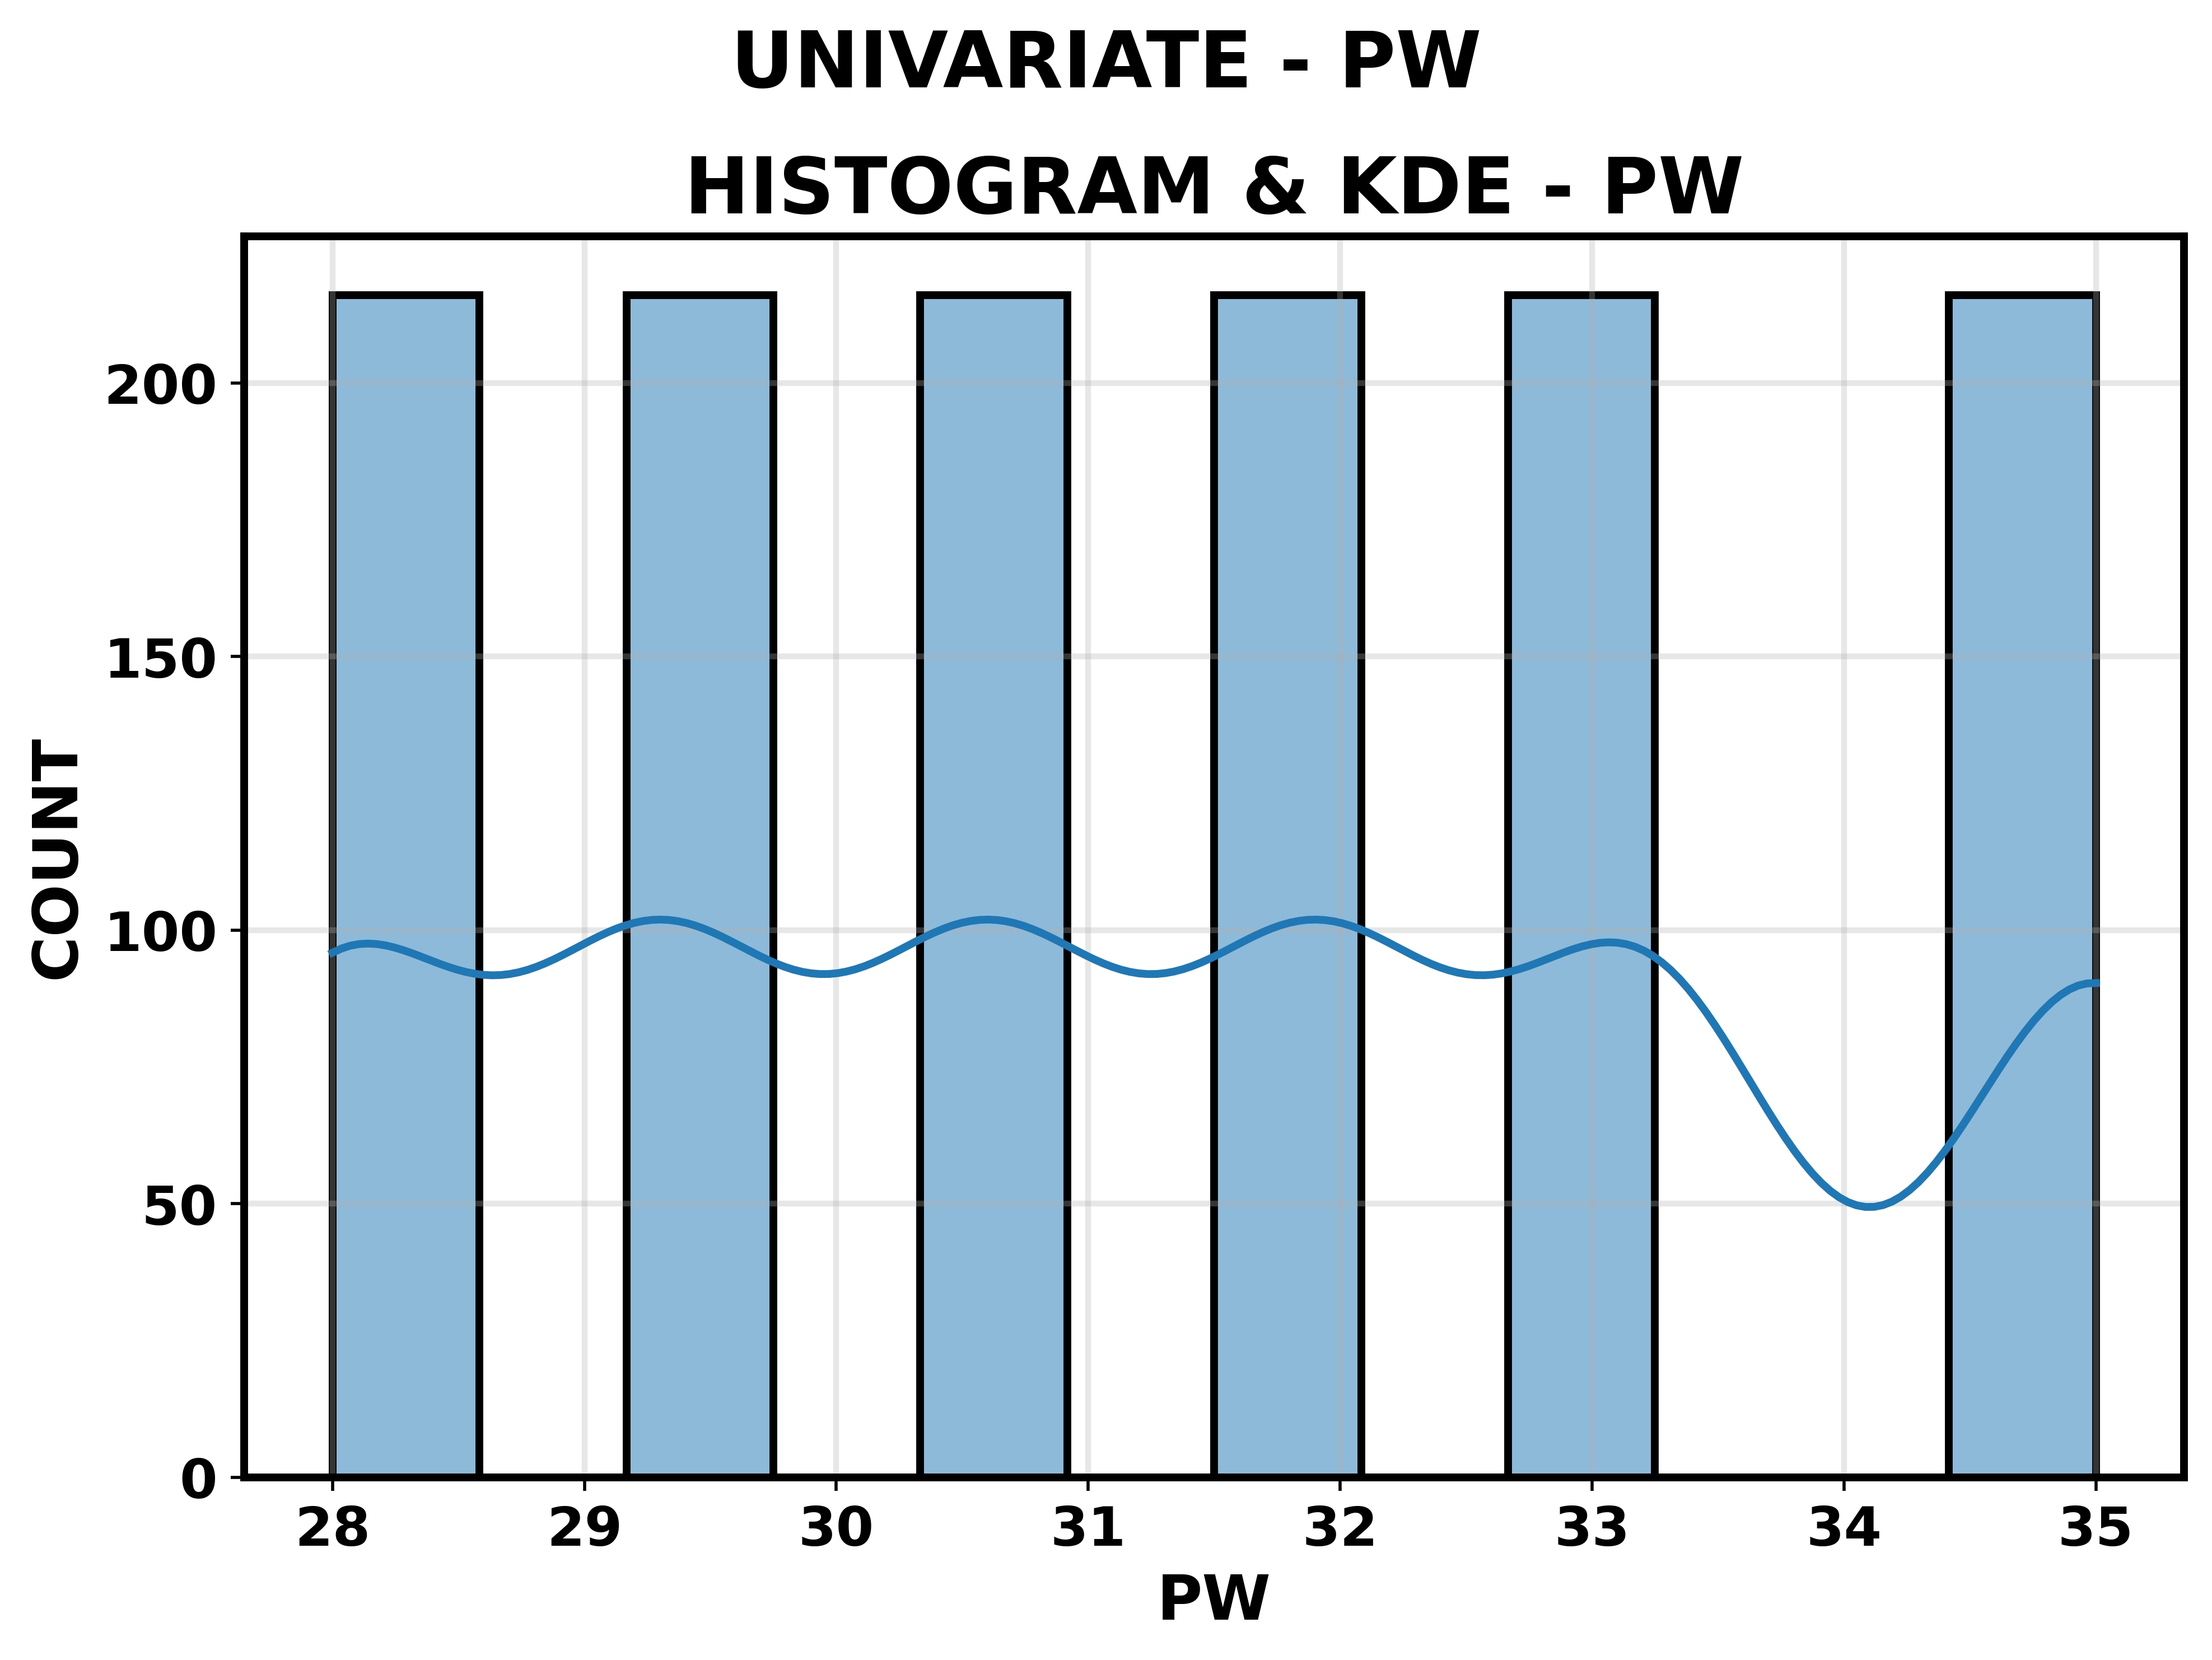

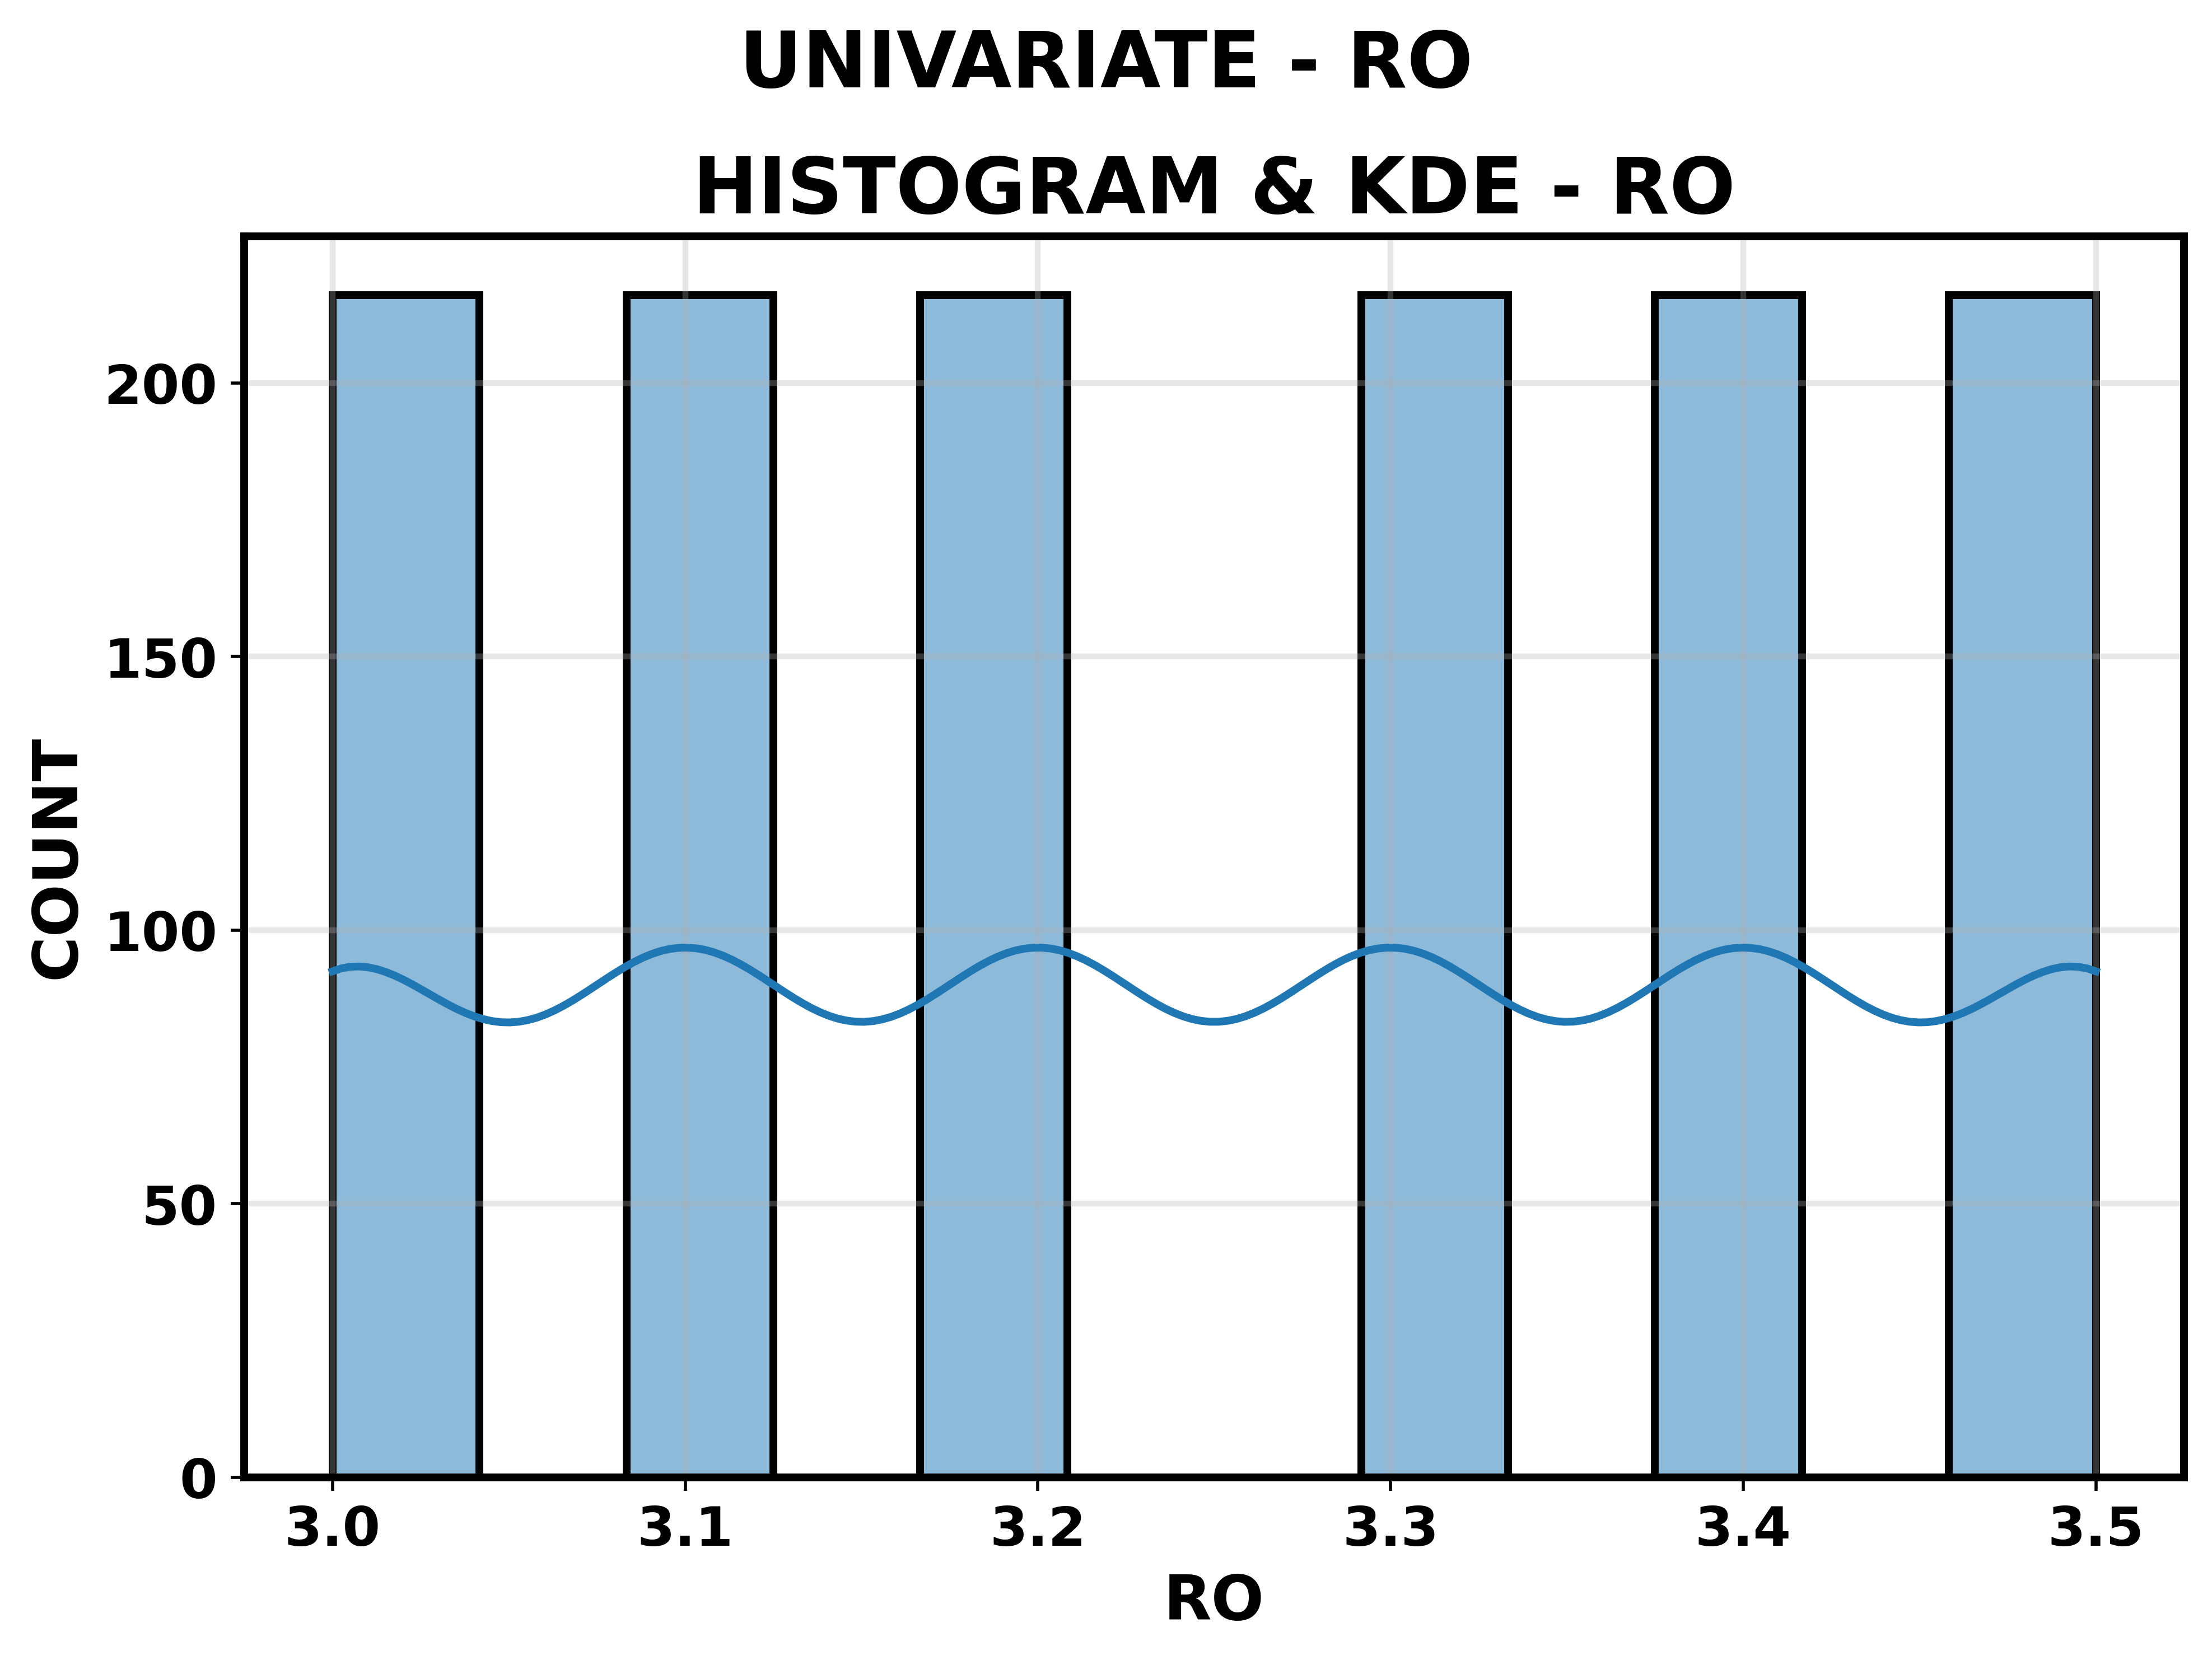

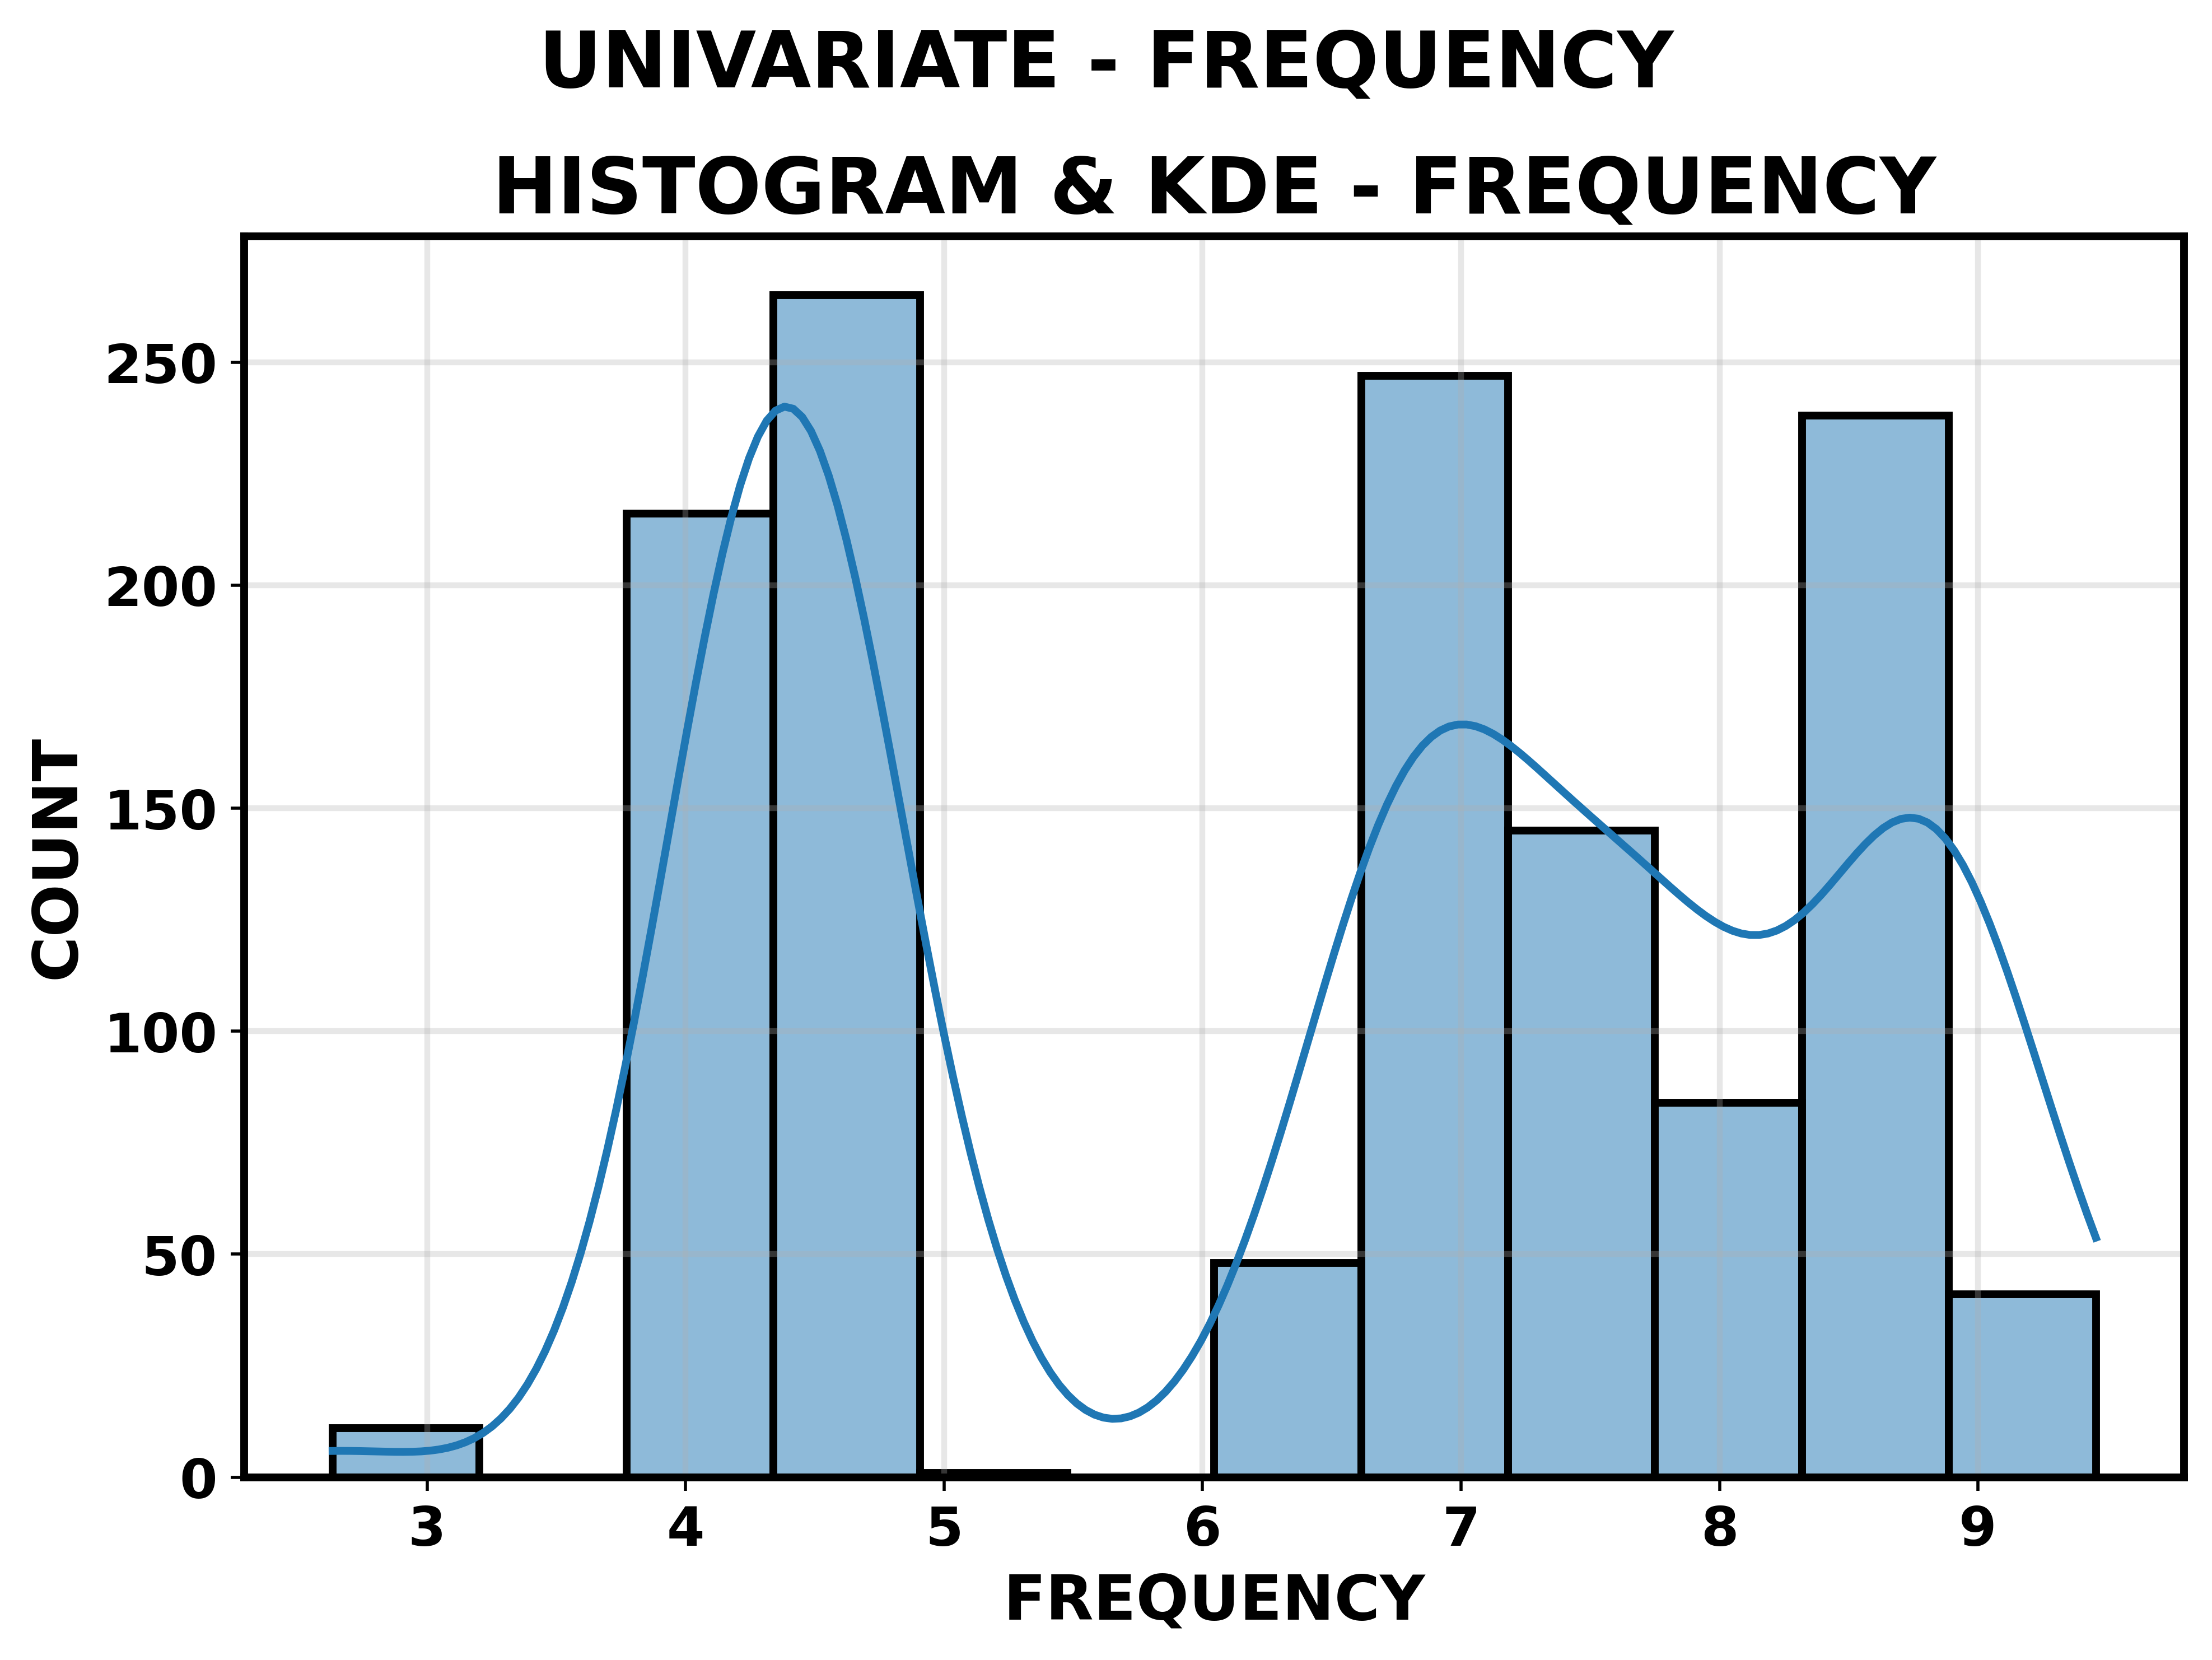

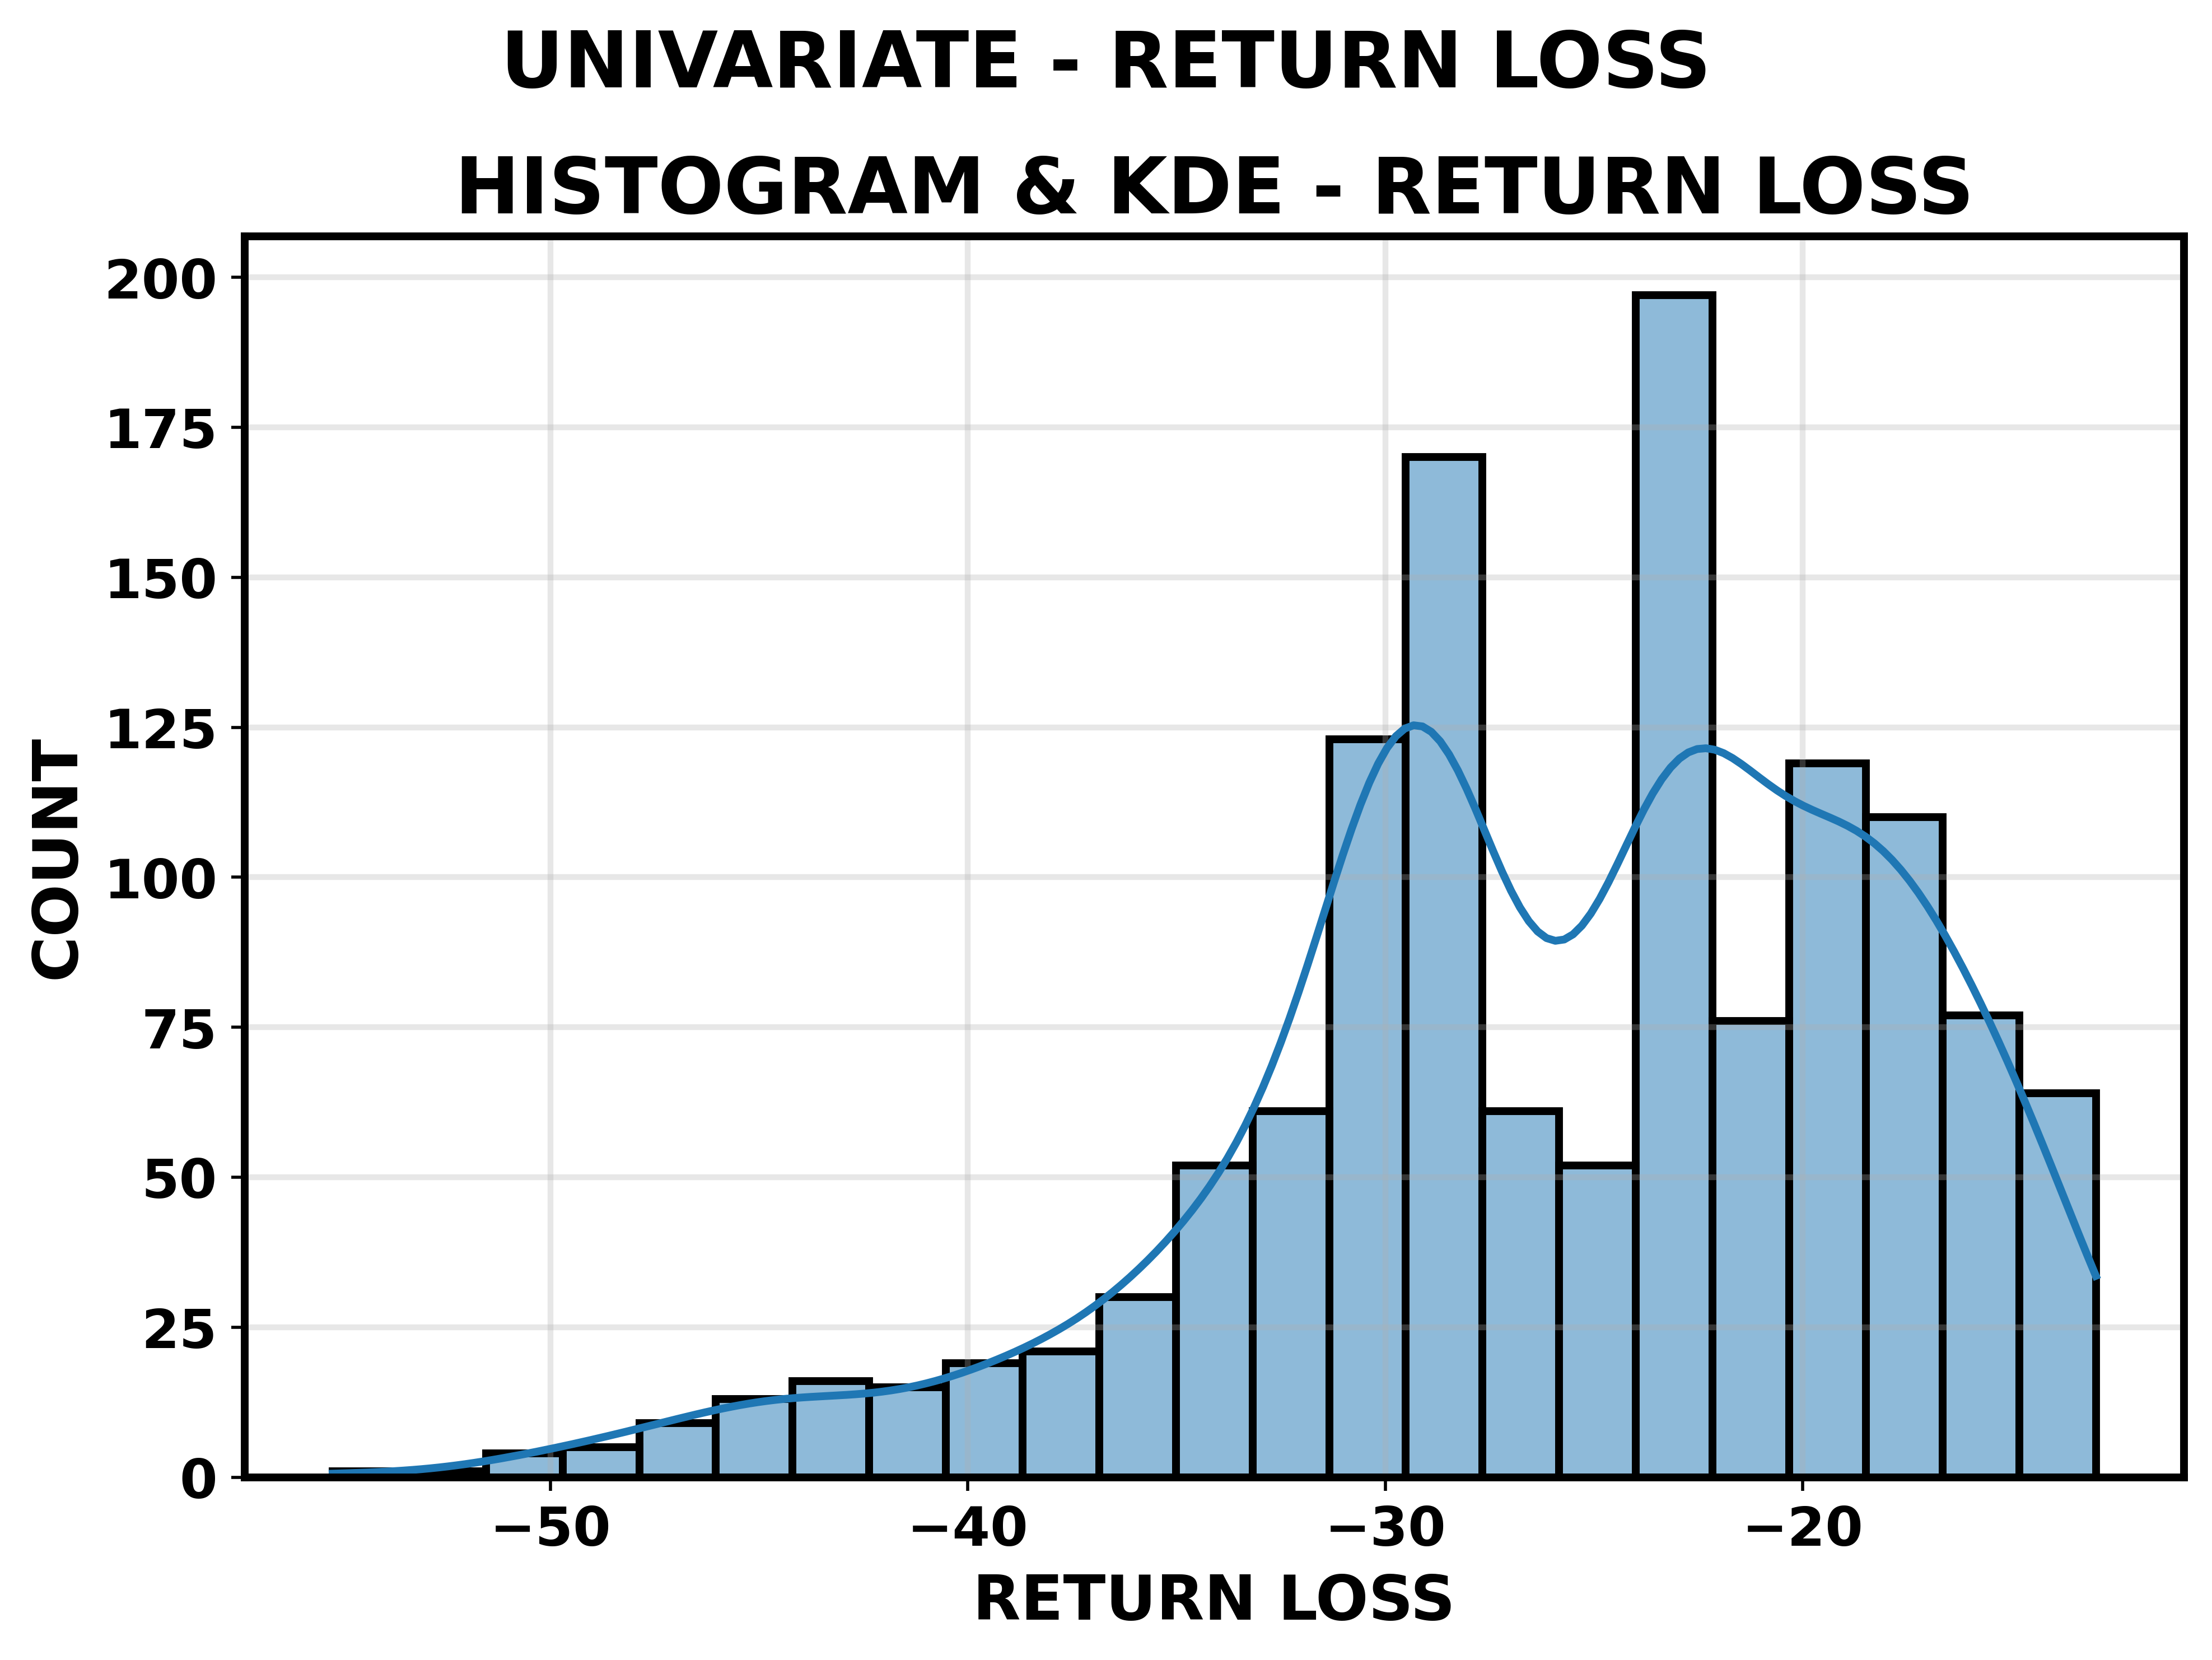

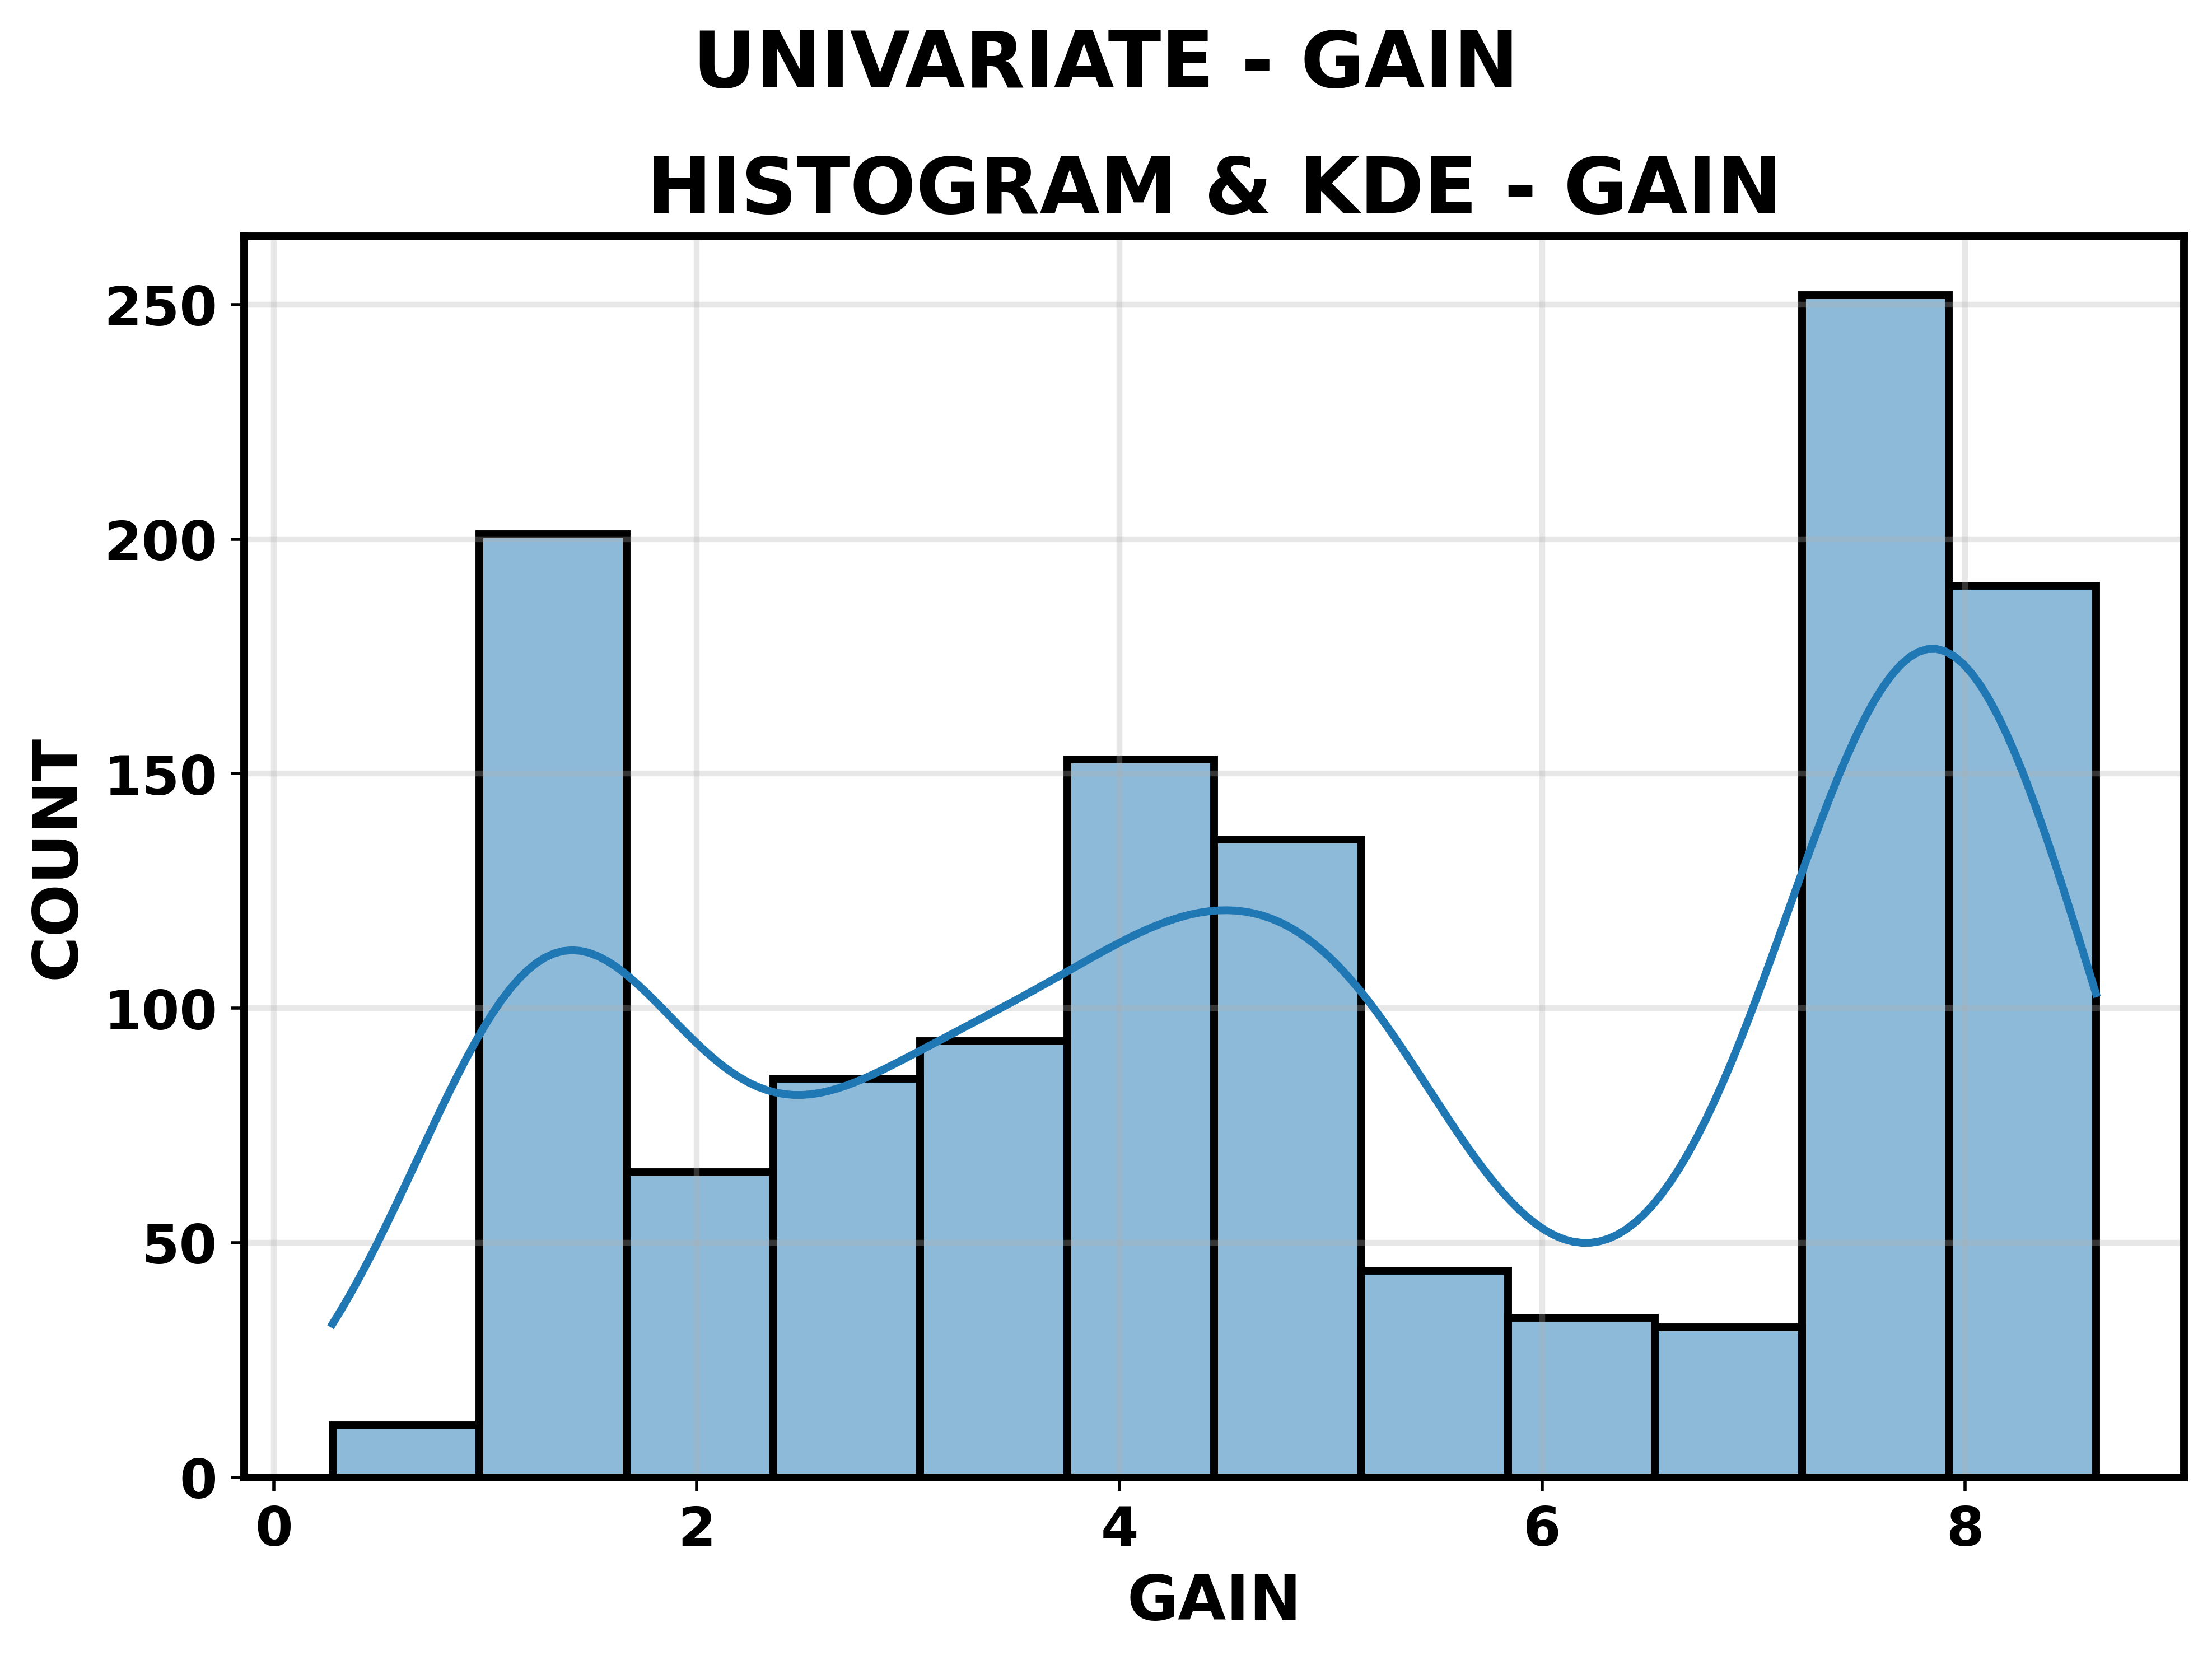

In [16]:
# HISTOGRAMS + KDE, SKEWNESS, KURTOSIS FOR EACH NUMERIC COLUMN                           

stats_table = []                                      # WILL COLLECT SKEWNESS/KURTOSIS
for col in numeric_cols:                              # LOOP OVER ALL NUMERIC COLUMNS
    data = df_model[col].dropna()                      # DROPS NA FOR STATS
    skew = data.skew()                                 # COMPUTES SKEWNESS
    kurt = data.kurtosis()                             # COMPUTES KURTOSIS
    stats_table.append((col, skew, kurt))              # APPENDS TO TABLE

stats_df = pd.DataFrame(stats_table, columns=["column", "skewness", "kurtosis"])  # BUILDS STATS DF
display(stats_df)                                      # DISPLAYS SKEWNESS/KURTOSIS

for col in numeric_cols:                               # LOOP AGAIN FOR PLOTTING
    fig, ax = plt.subplots()                           # CREATES FIGURE
    sns.histplot(df_model[col], kde=True, ax=ax, linewidth=LINEWIDTH)  # HIST + KDE
    boldify_axes(ax, title=f"histogram & kde - {col}", xlabel=col, ylabel="count")  
    finalize_figure(fig, suptitle=f"univariate - {col}")  # FINALIZES
    plt.show()                                         # DISPLAYS PLOT

> SKEWNESS AND KURTOSIS ANALYSIS

BASED ON THE TABLE BELOW, WE OBSERVE THE FOLLOWING:

| **COLUMN**   | **SKEWNESS** | **KURTOSIS** |
|--------------|--------------|--------------|
| IL           | 0.000000     | -1.268835    |
| IW           | 0.000000     | -1.268835    |
| PW           | 0.131032     | -1.164248    |
| RO           | 0.000000     | -1.268835    |
| FREQUENCY    | -0.105101    | -1.457328    |
| S11          | -0.707514    | 0.410093     |
| GAIN         | -0.103986    | -1.382413    |

- **SKEWNESS**: ALL VARIABLES HAVE A SKEWNESS VALUE OF LESS THAN **0.75** (WITH **S11** BEING THE CLOSEST AT **0.71**).
- **KURTOSIS**: THE KURTOSIS IS AROUND **-1**, INDICATING THE DATA IS **PLATYKURTIC**, MEANING IT HAS **LIGHT TAILS**.

> CONCLUSIONS

- **NO IMMEDIATE NEED FOR TRANSFORMATION**:
  - THE SKEWNESS VALUES SUGGEST THAT THERE'S **NO IMMEDIATE NEED FOR A POWER/LOG TRANSFORMATION** FOR THE VARIABLES.
  - **TREE/ENSEMBLE MODELS** LIKE **RANDOM FOREST (RF)**, **XGBOOST (XGB)**, **LIGHTGBM (LGBM)**, AND **CATBOOST** ARE **NOT SENSITIVE TO NORMALITY OR SKEWNESS** AND WILL PERFORM WELL WITHOUT TRANSFORMATIONS.
  
- **LINEAR MODELS** (E.G., **LINEAR REGRESSION** OR **RIDGE/LASSO**):
  - WHILE LINEAR MODELS MAY BENEFIT SLIGHTLY FROM A **POWER TRANSFORMATION**, IT’S **OPTIONAL** AND WILL DEPEND ON THE PERFORMANCE EVALUATION.
  - THE TRANSFORMATION WOULD BE PARTICULARLY USEFUL IF THERE’S NOTICEABLE NON-LINEARITY IN THE MODEL'S RESIDUALS.
  
- **S11**: THIS COLUMN HAS A NEGATIVE SKEWNESS (**-0.707514**), AND A **LOG TRANSFORMATION** IS **INVALID** DUE TO THE NEGATIVE VALUES. HOWEVER, WE COULD USE A **YEO-JOHNSON TRANSFORMATION** (AVAILABLE VIA **SCIKIT-LEARN'S POWERTRANSFORMER**) AS IT CAN HANDLE BOTH POSITIVE AND NEGATIVE VALUES, IF WE WISH TO TEST IT.

---

> HISTOGRAMS LOOK MULTIMODAL (ESPECIALLY FREQUENCY/GAIN). TRANSFORMS WON’T “FIX” MULTIMODALITY

THAT OFTEN COMES FROM MIXED REGIMES/DESIGNS.

---

### BIVARIATE ANALYSIS

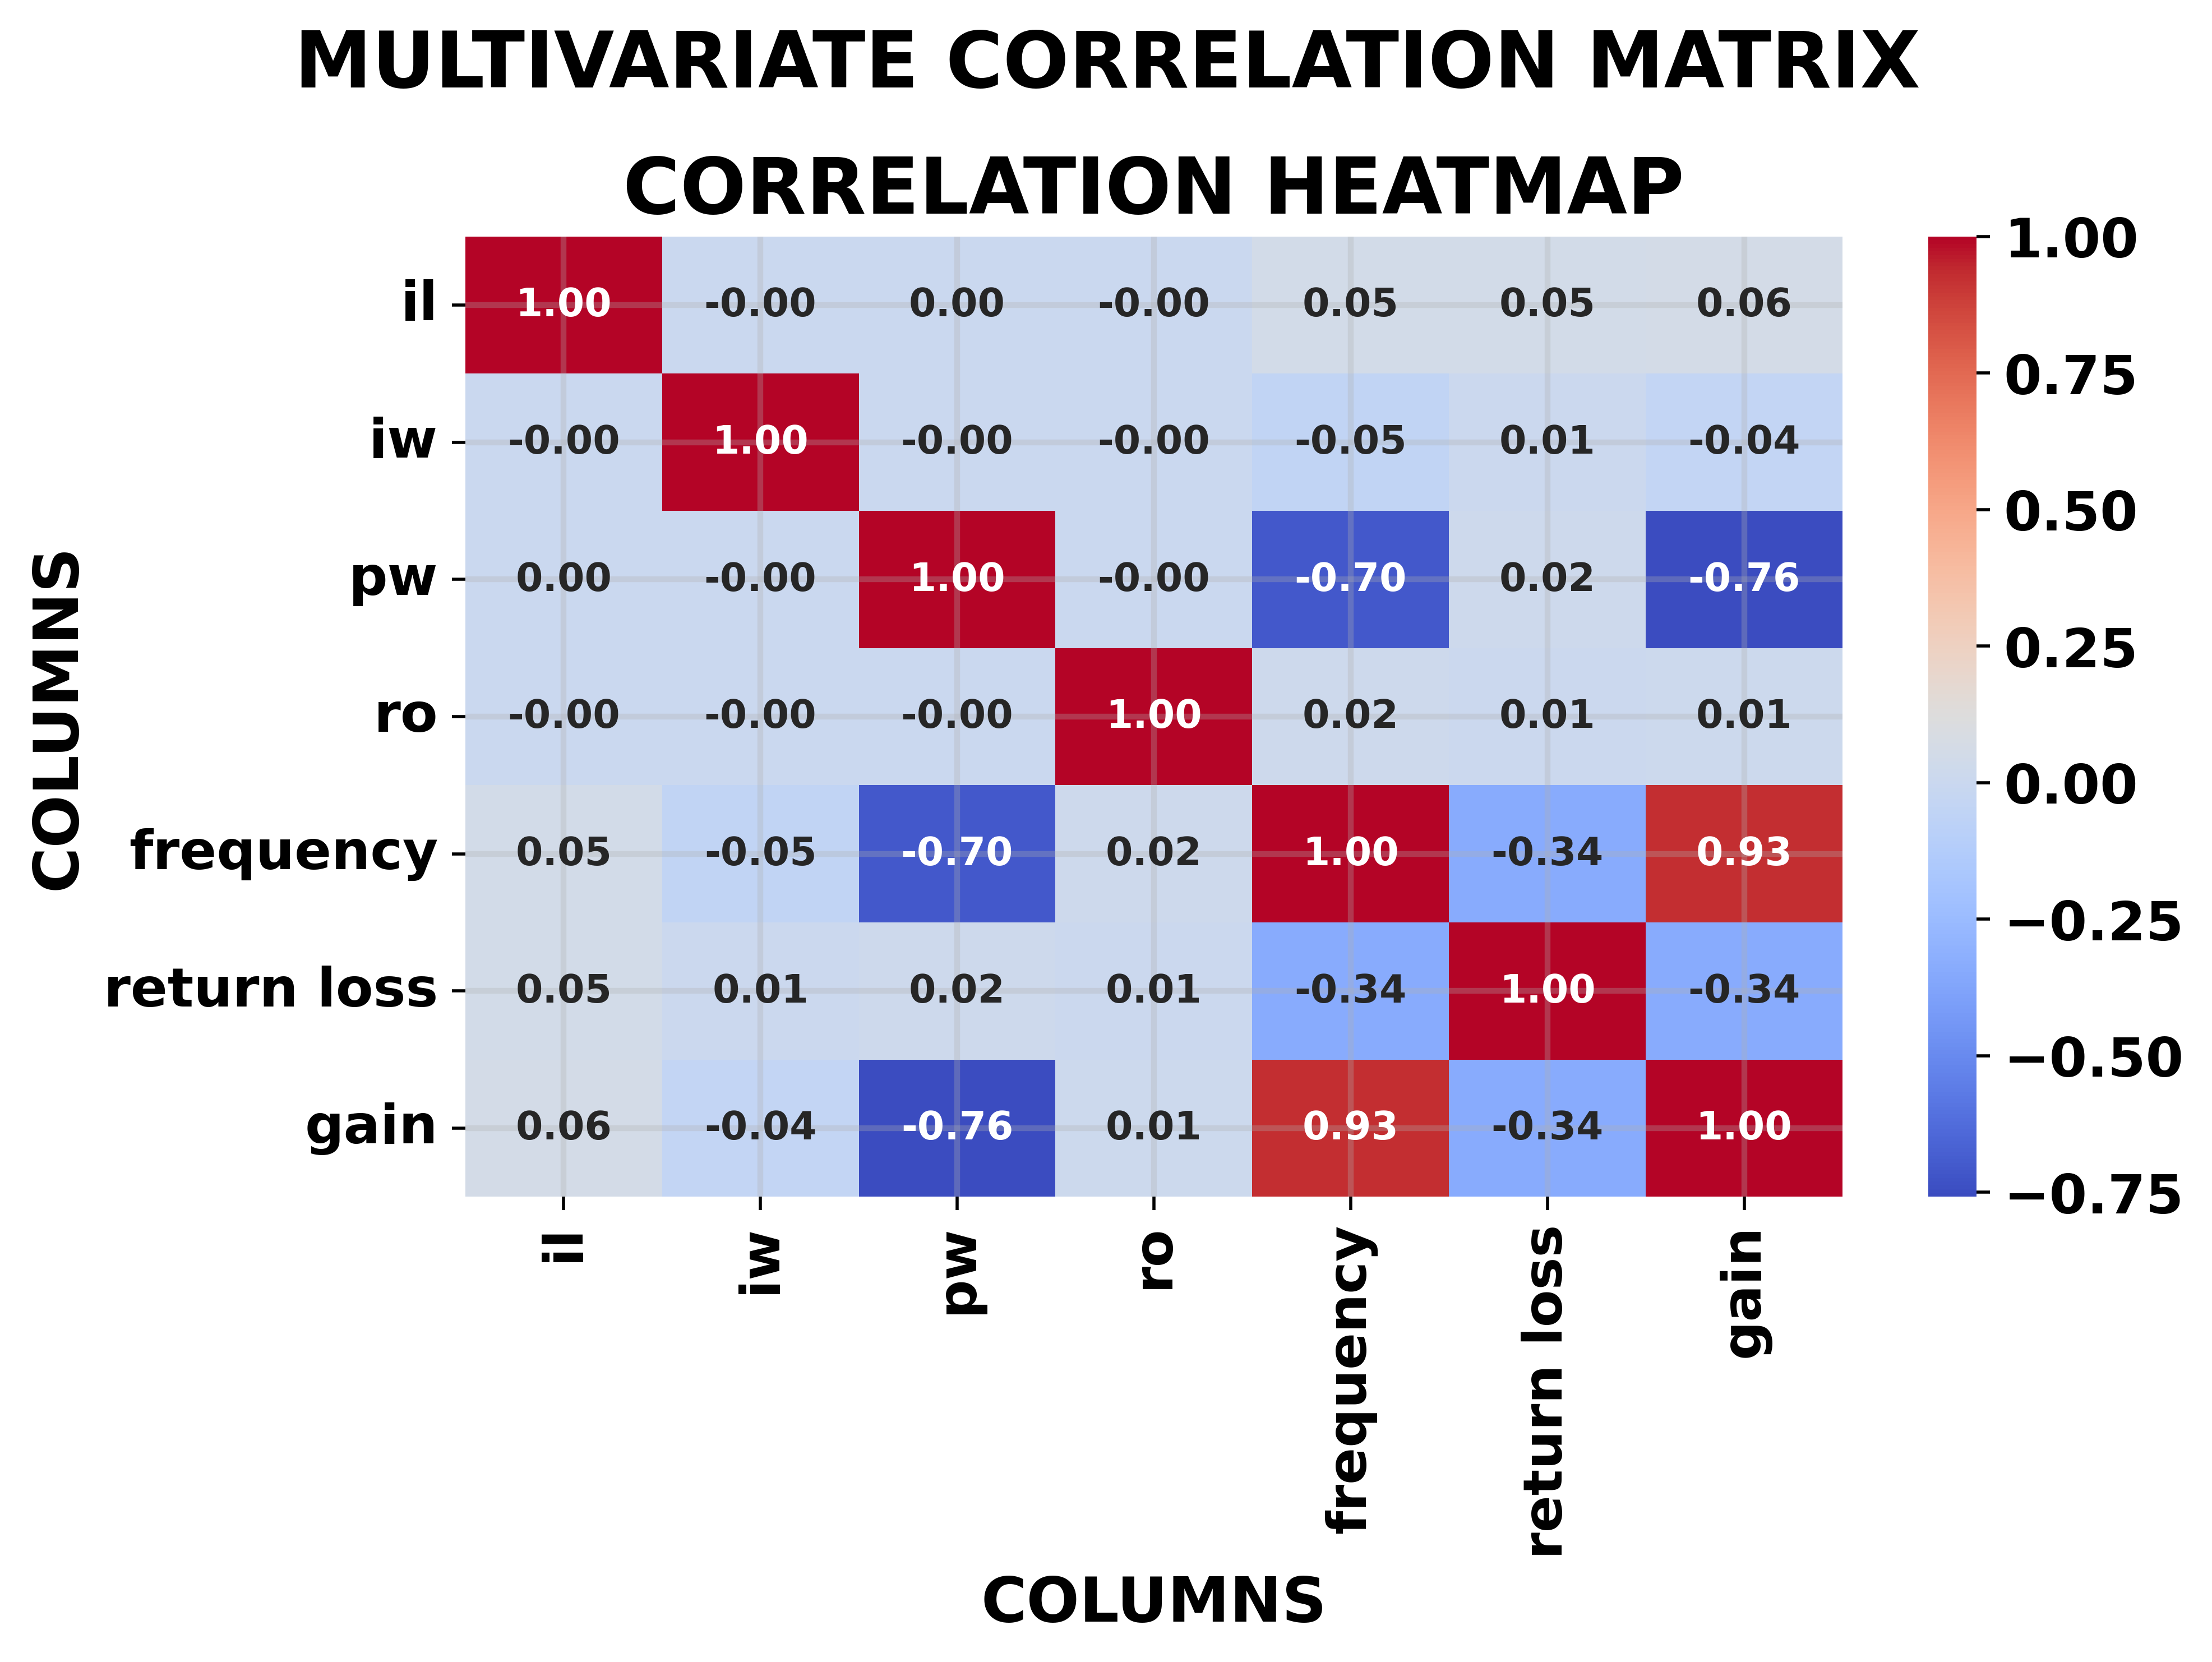

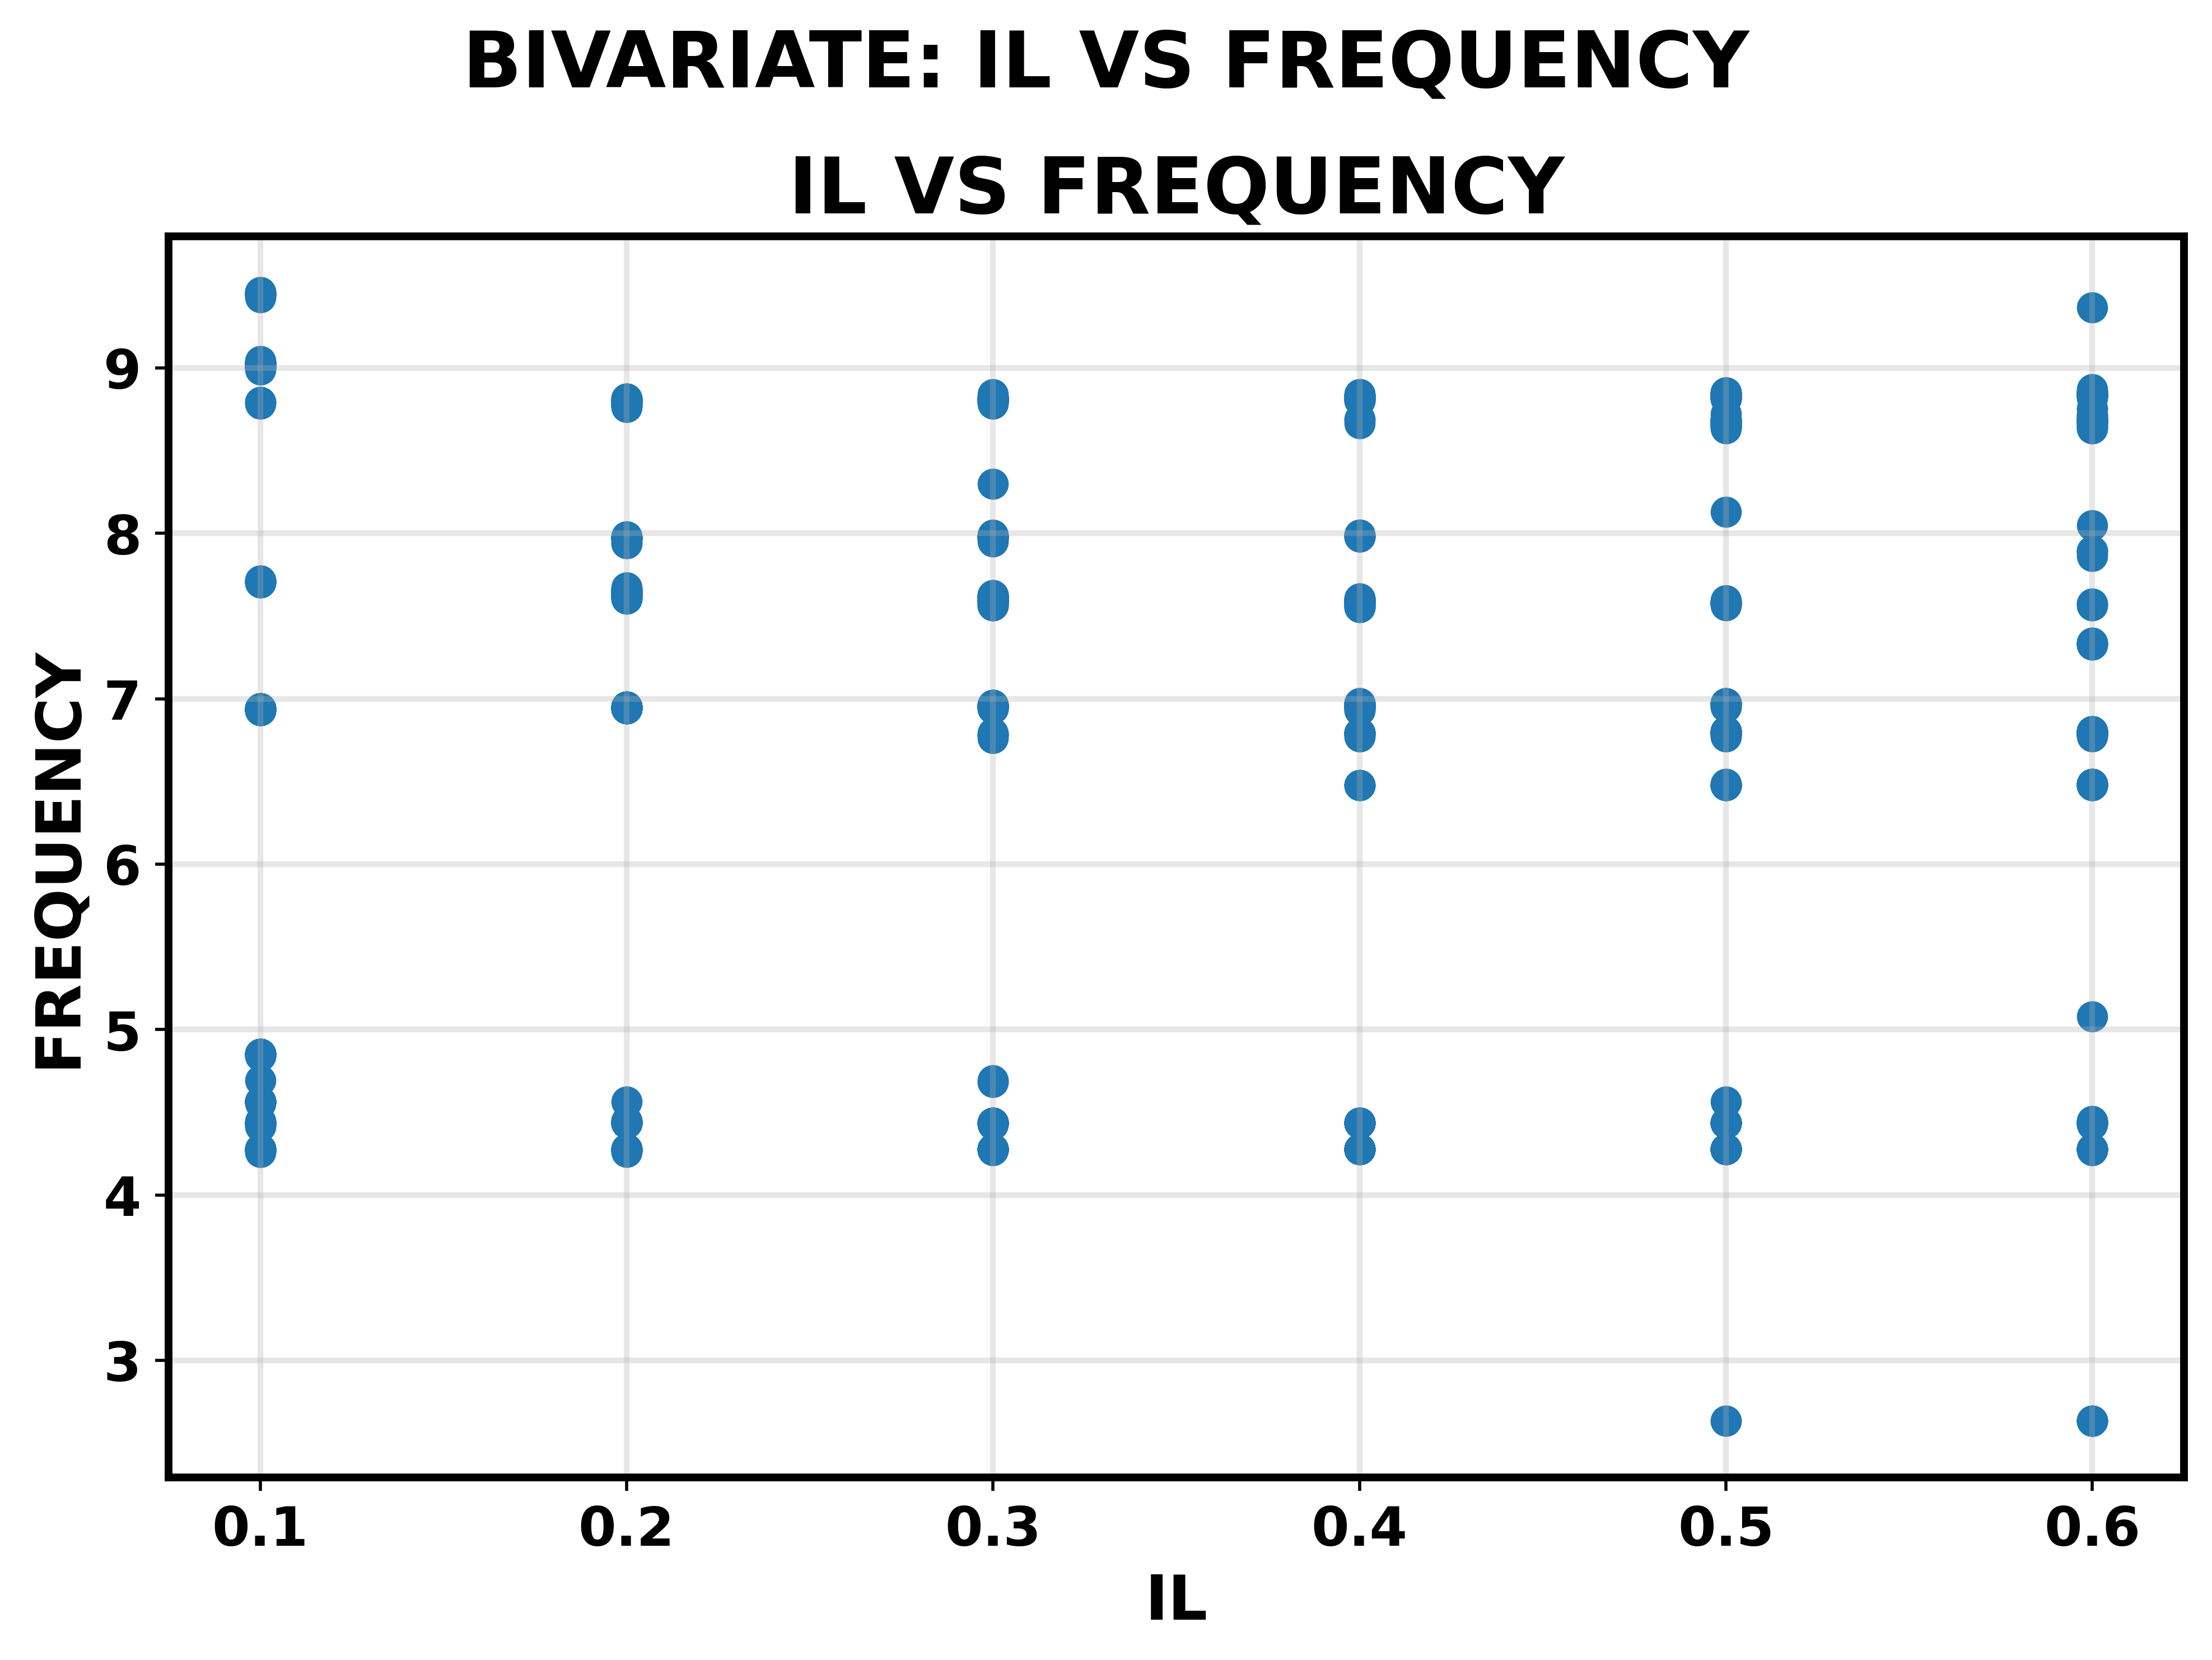

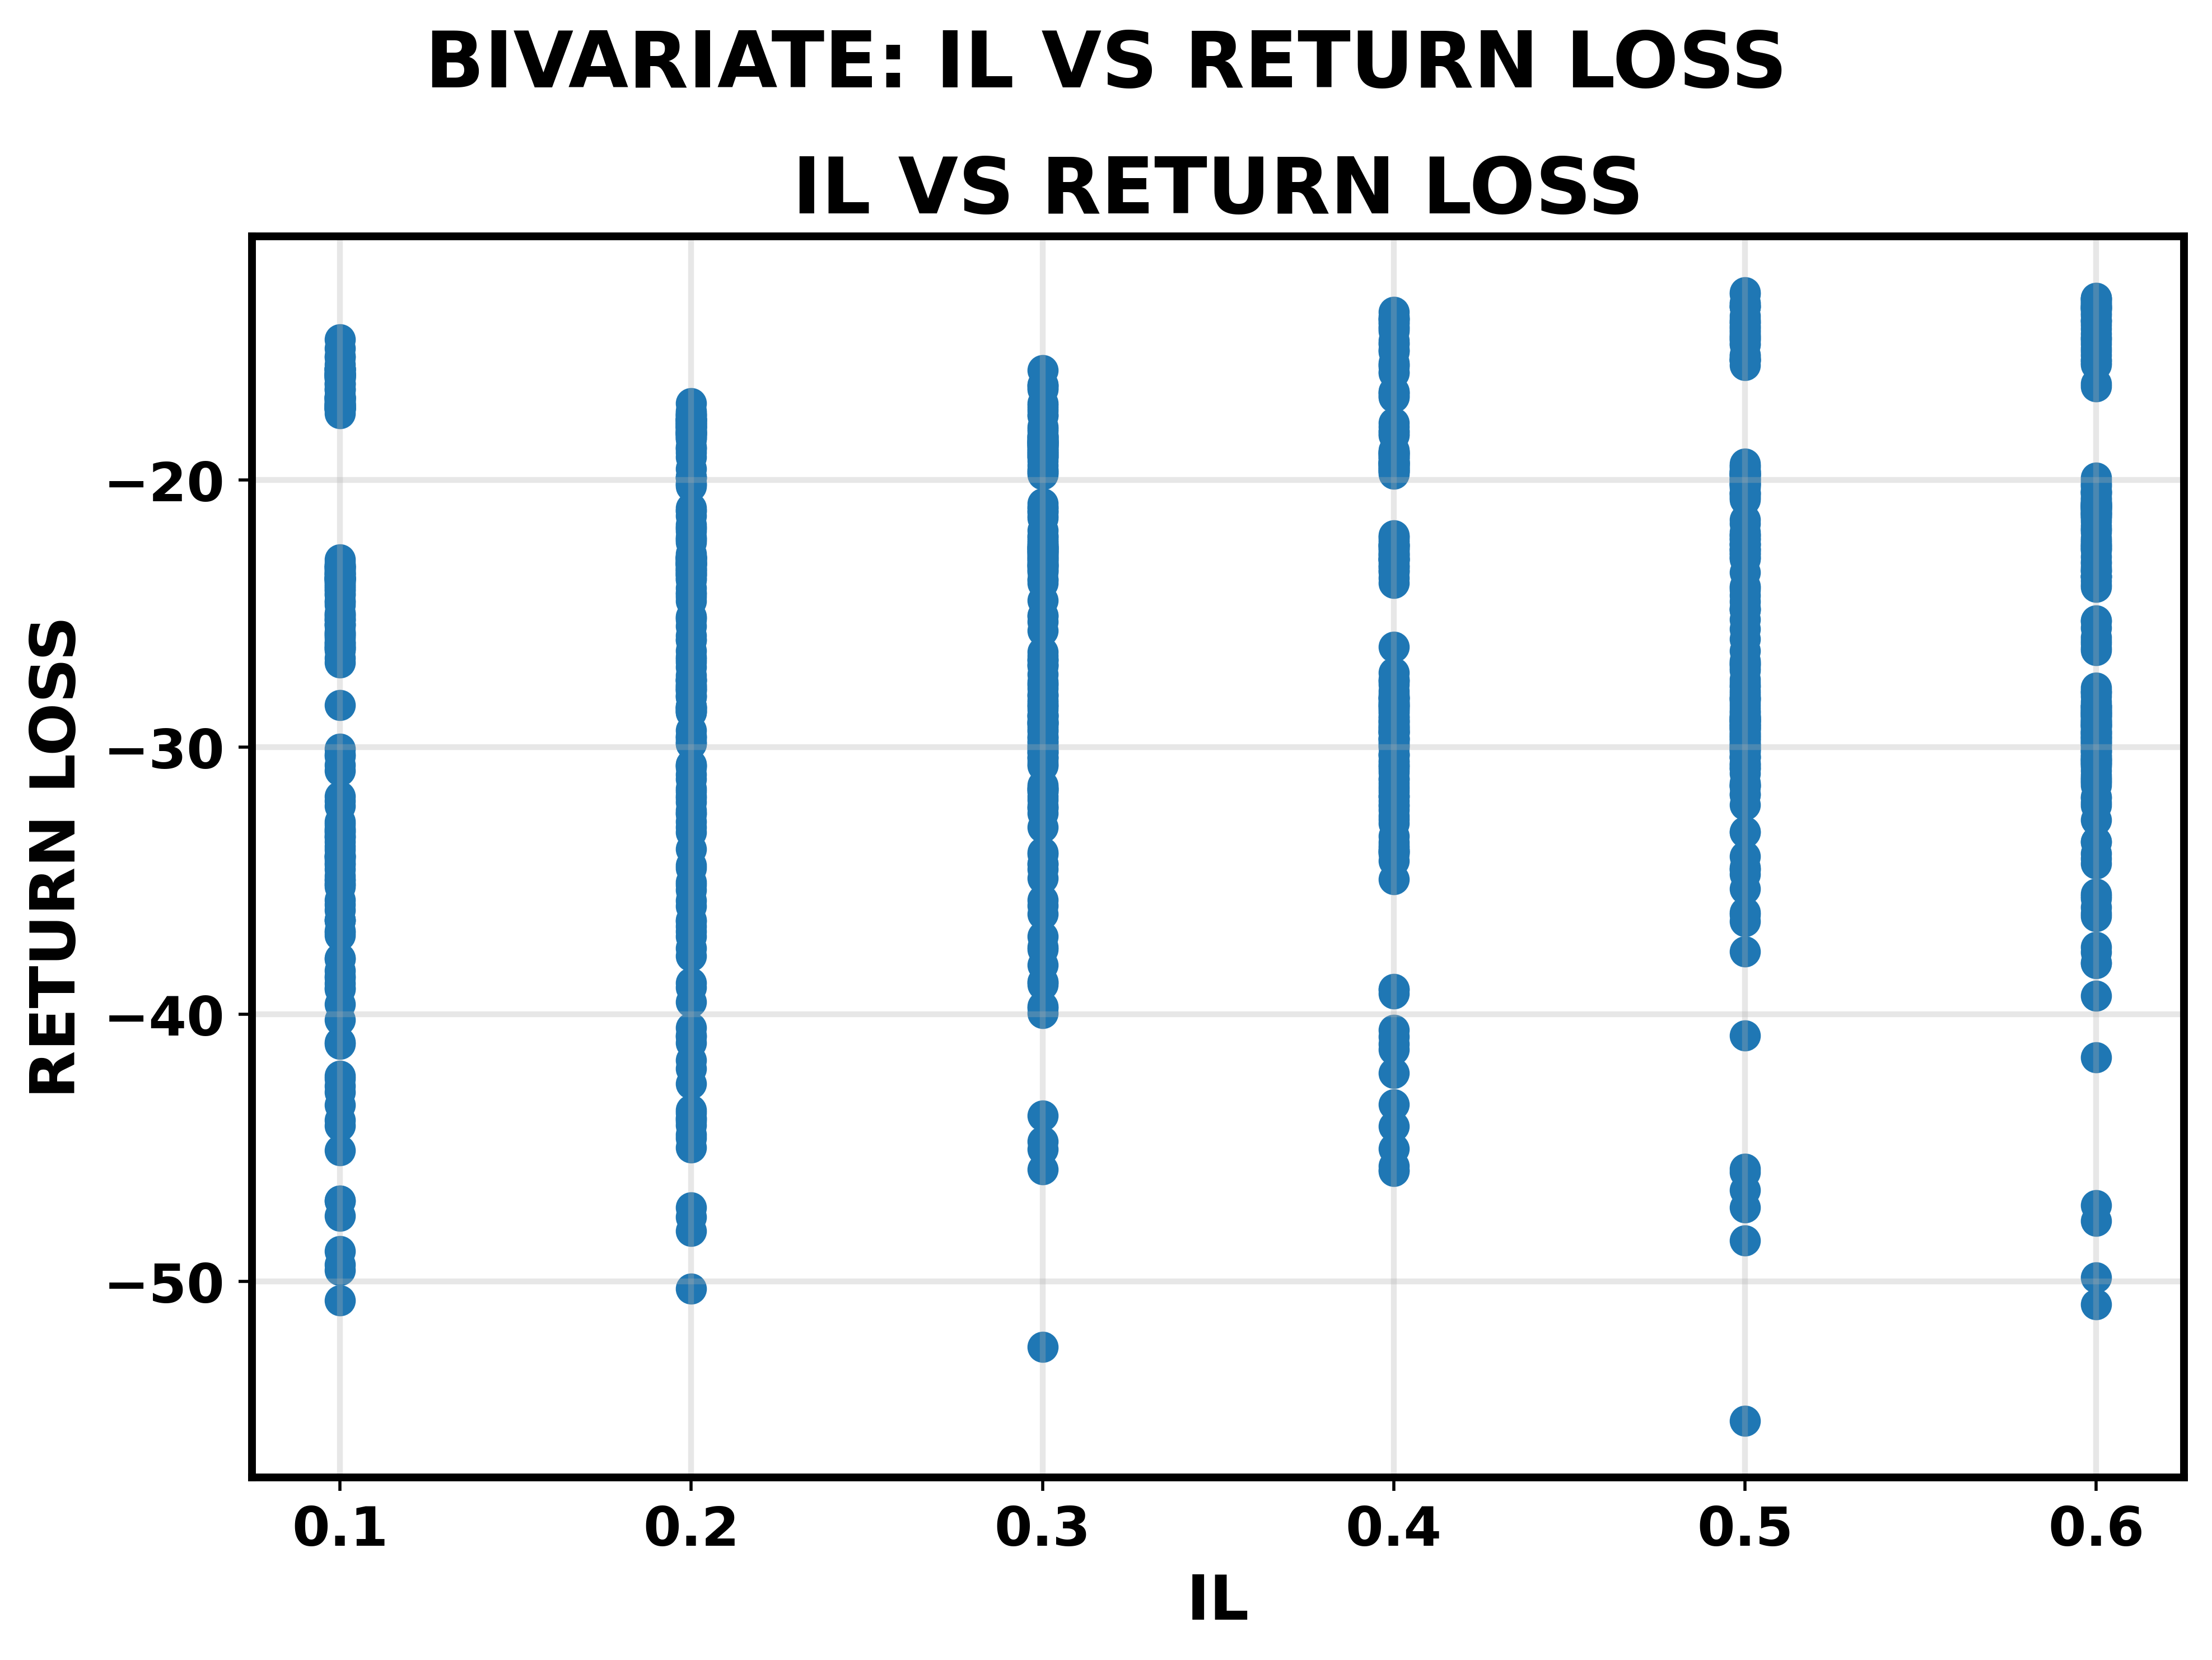

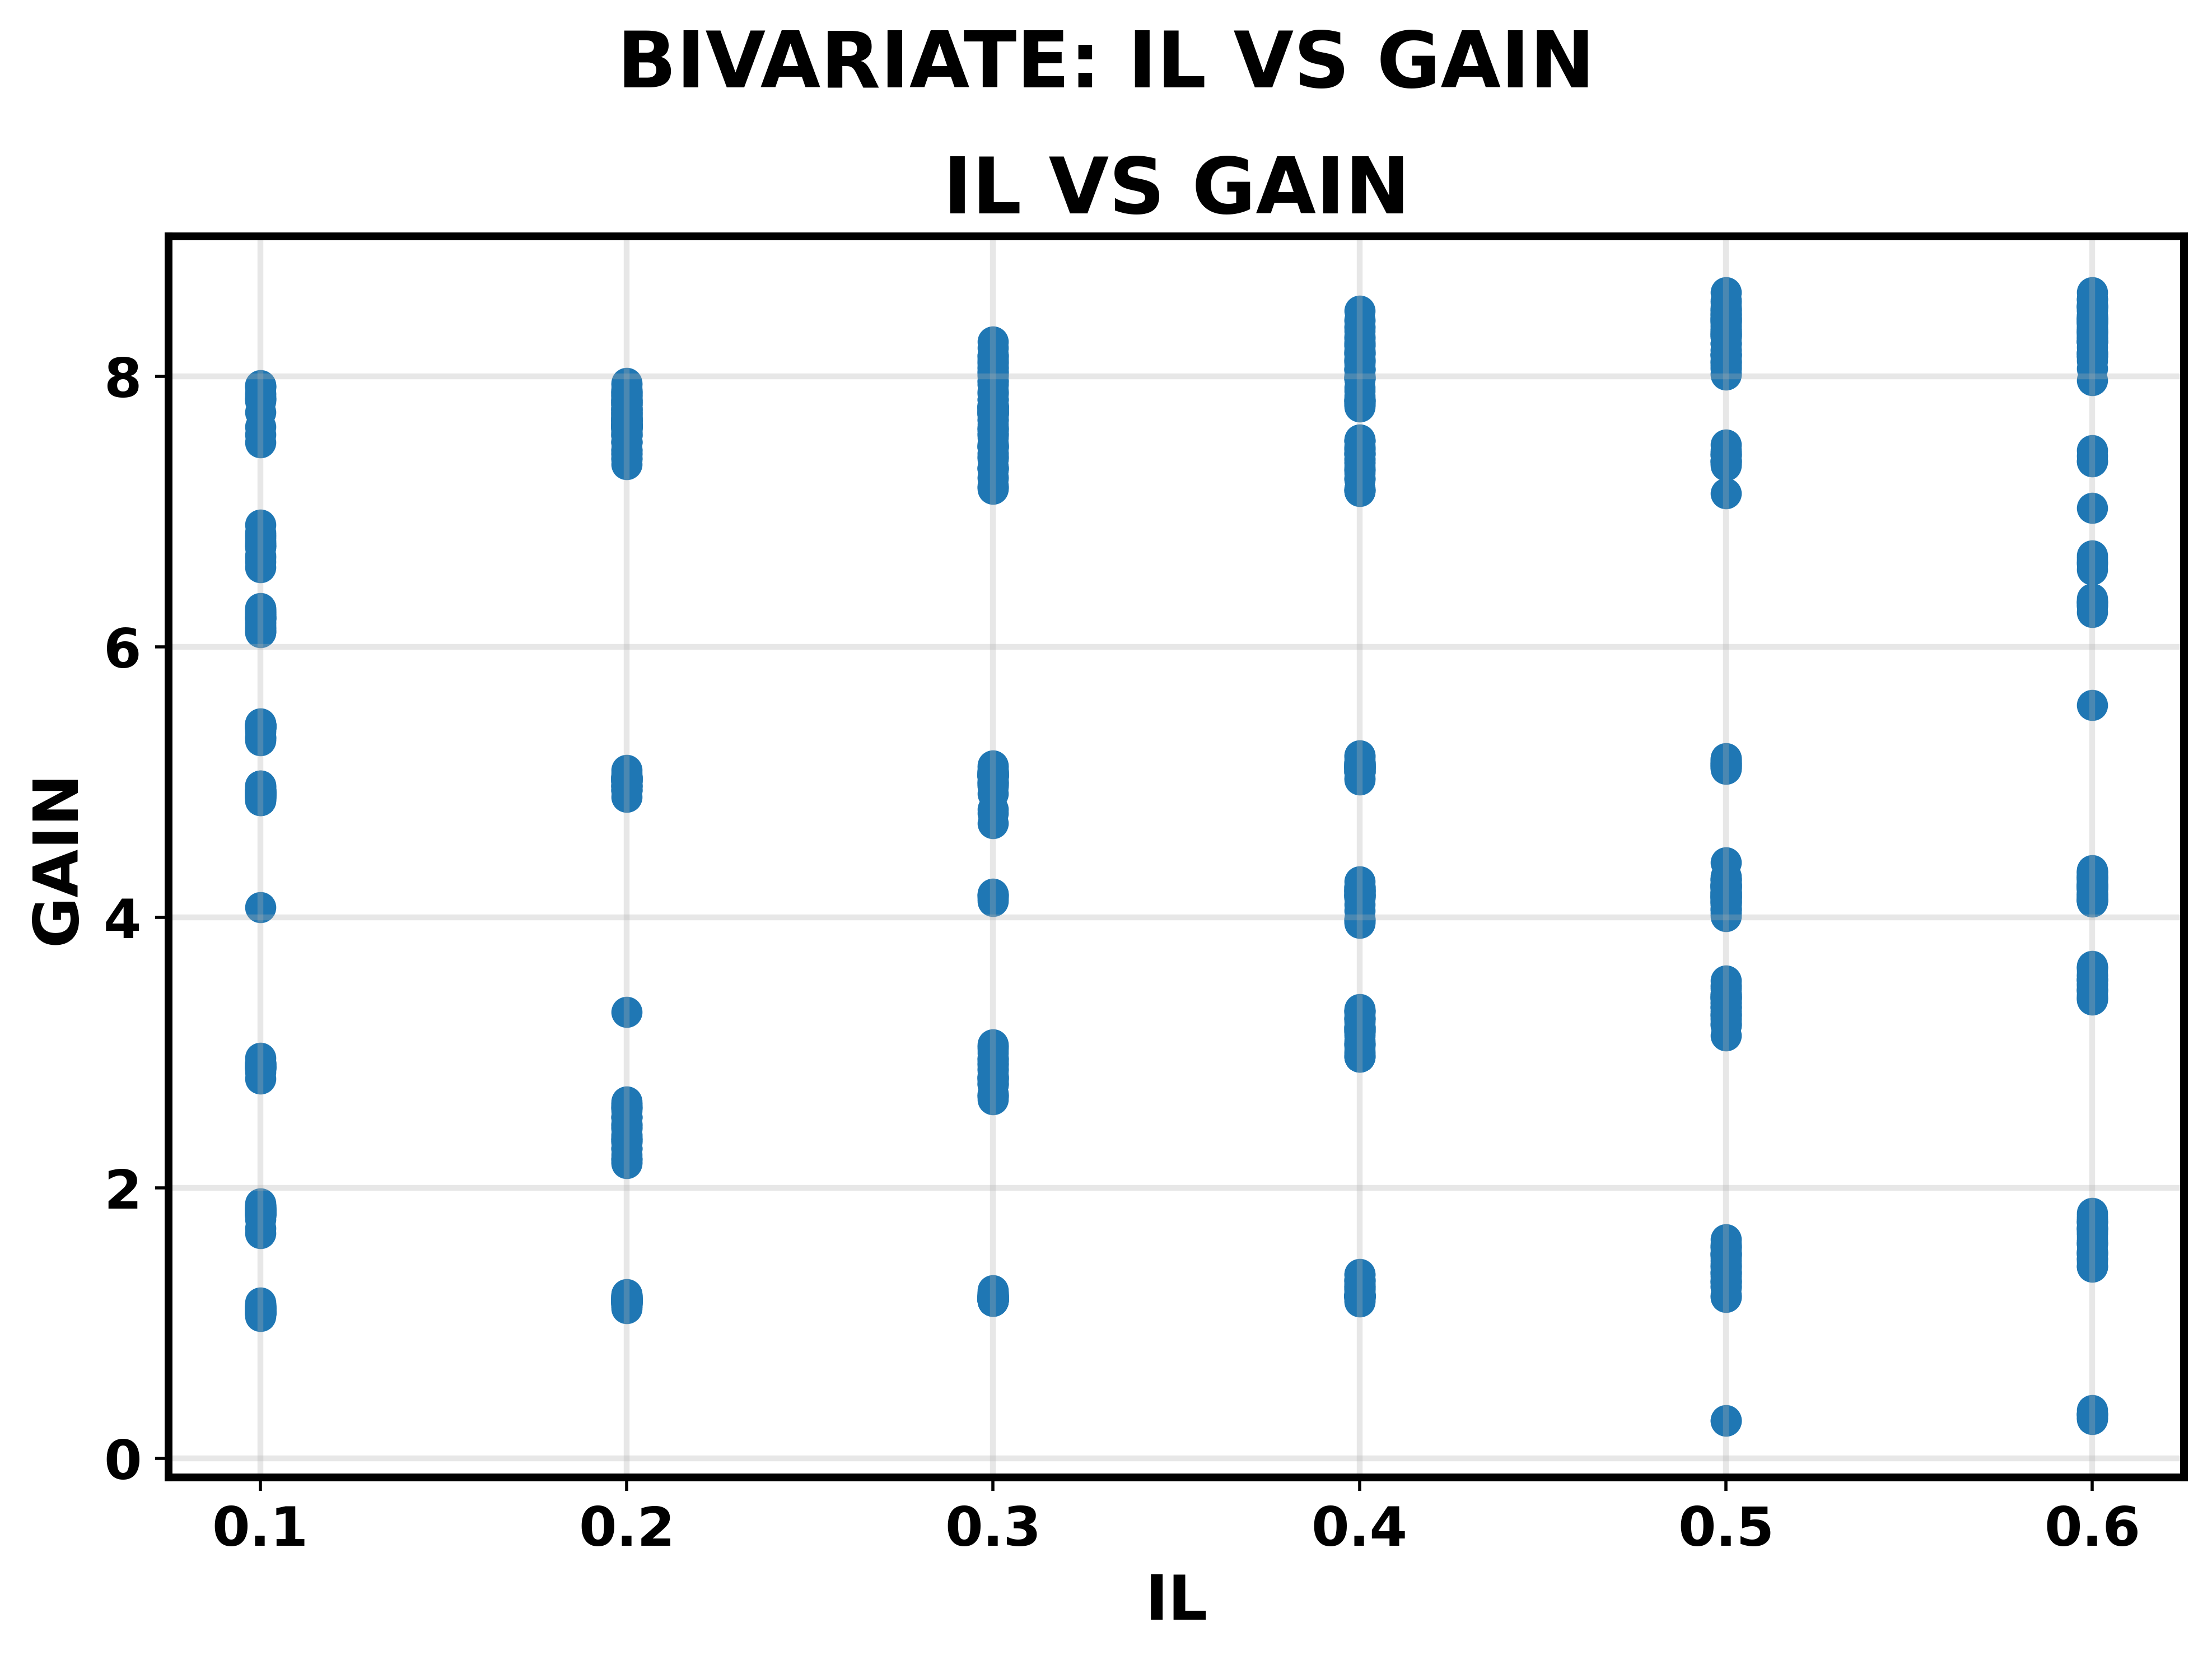

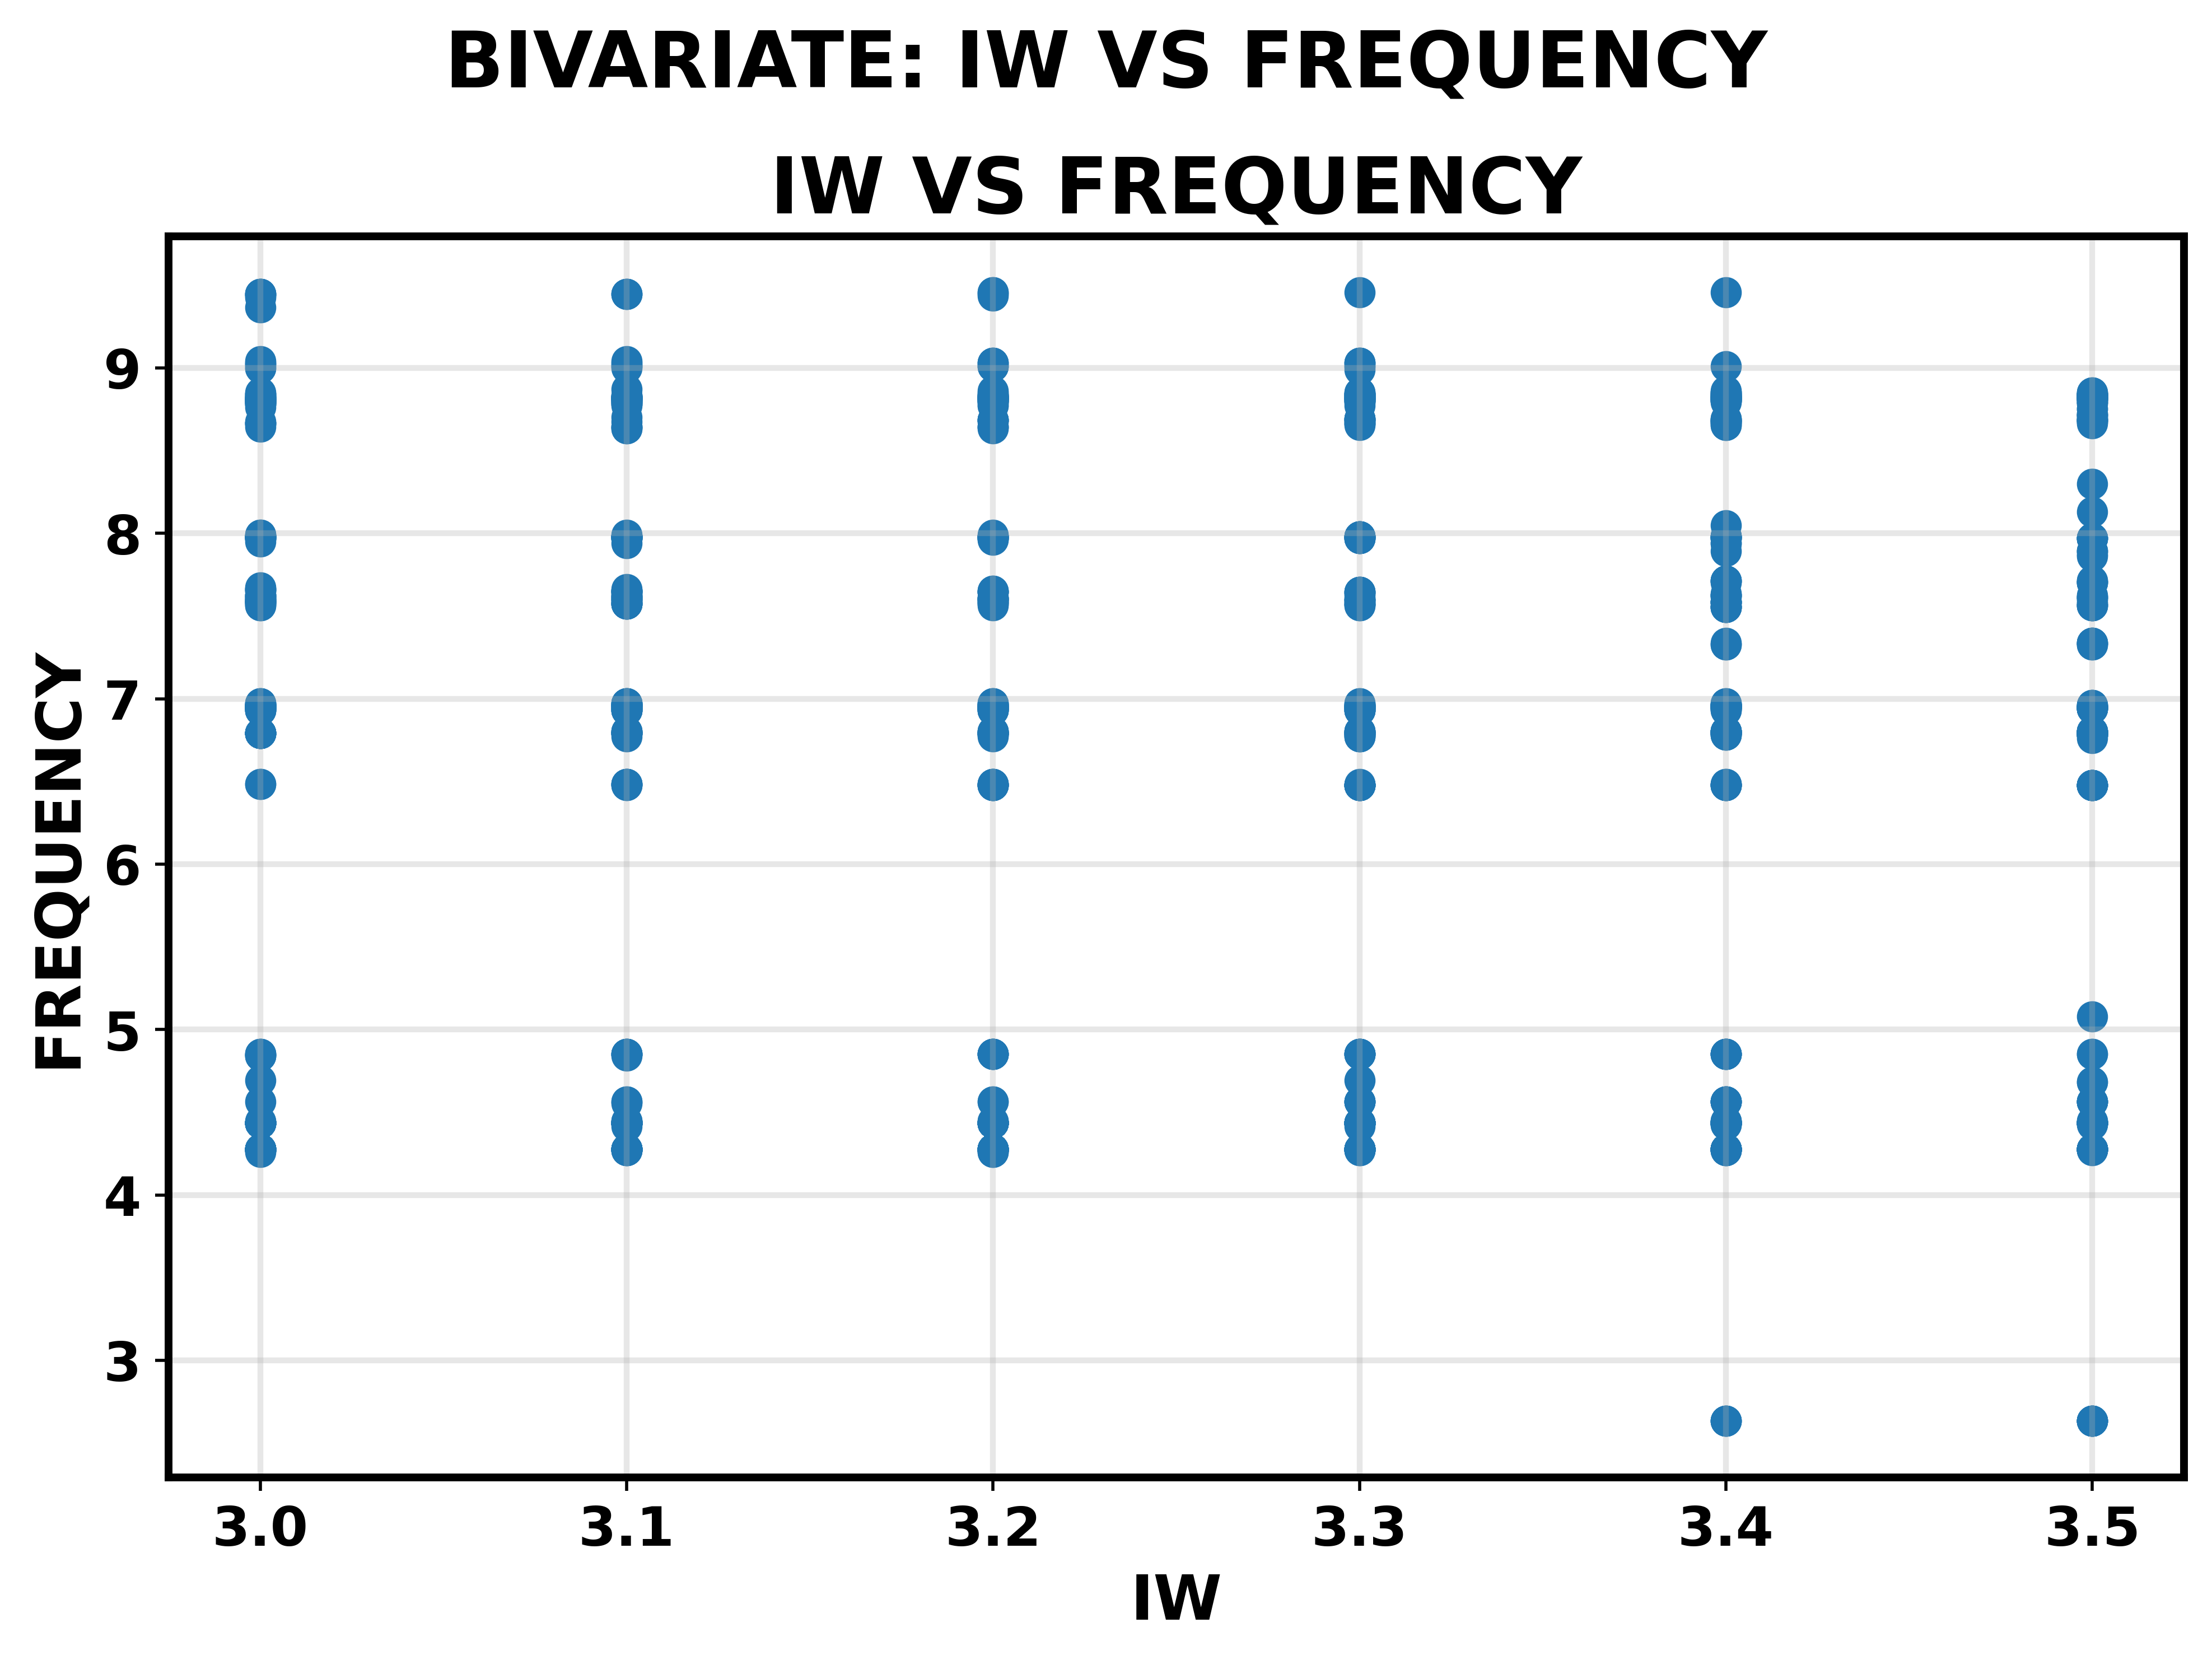

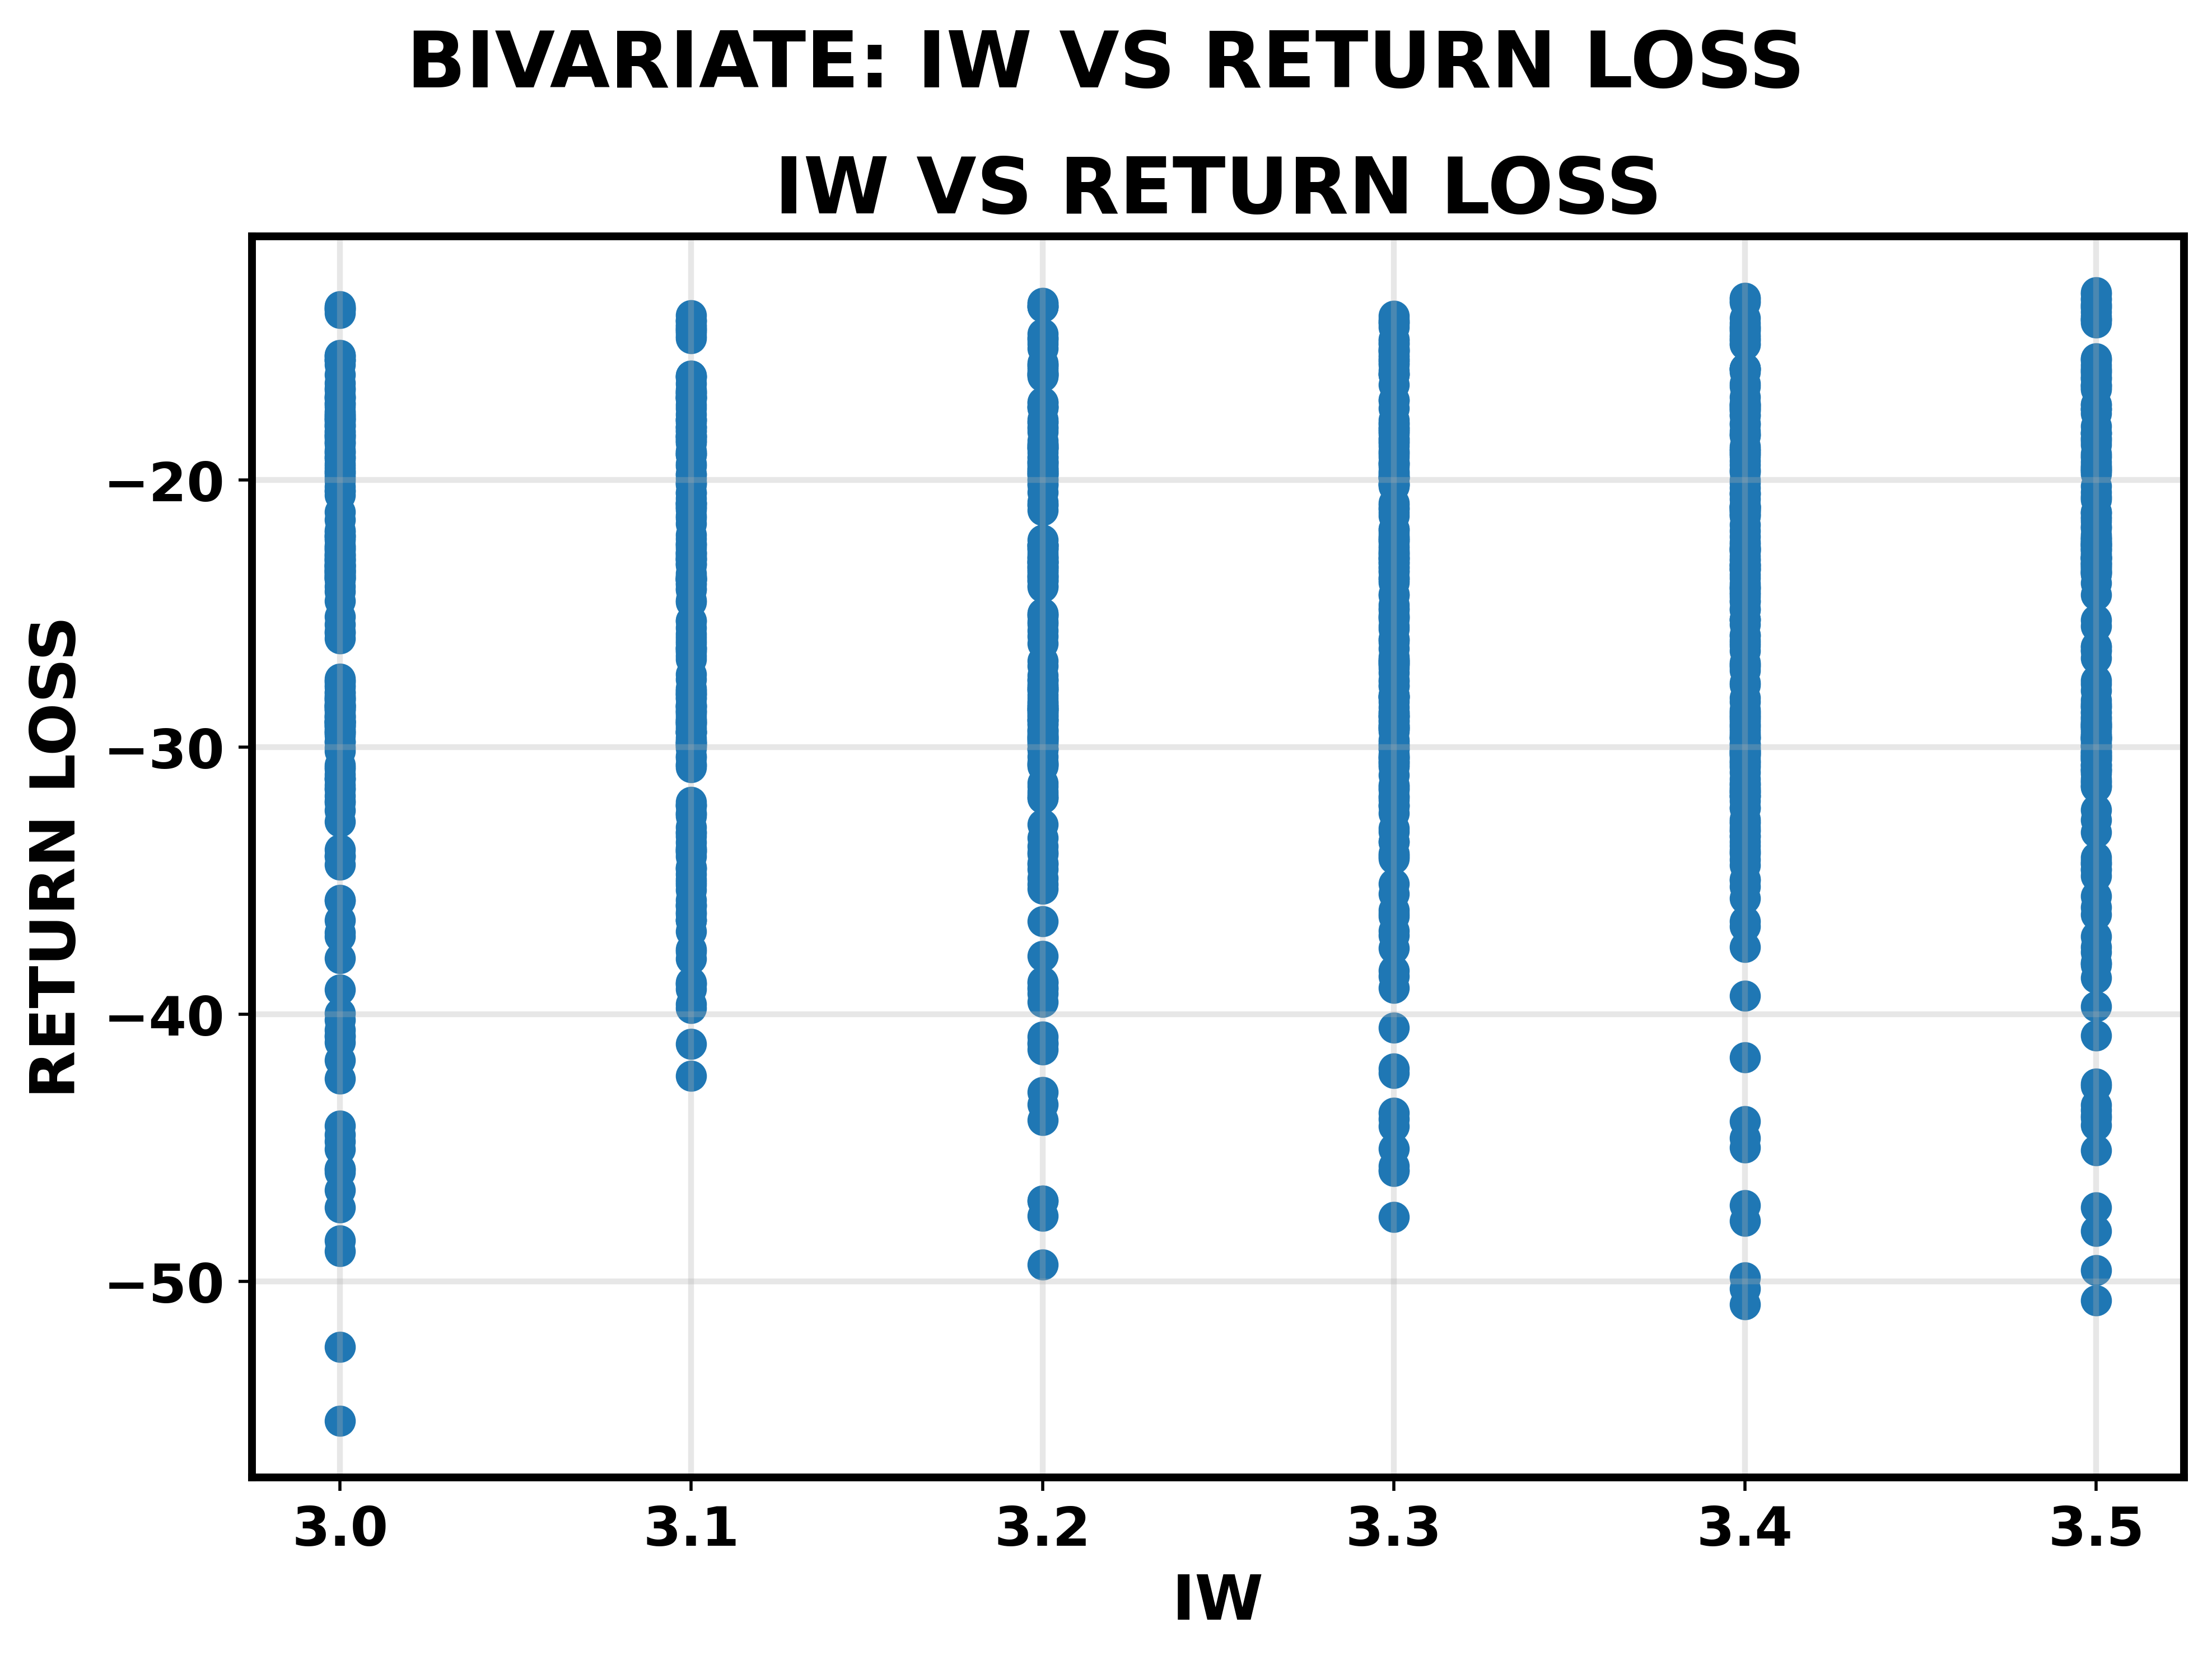

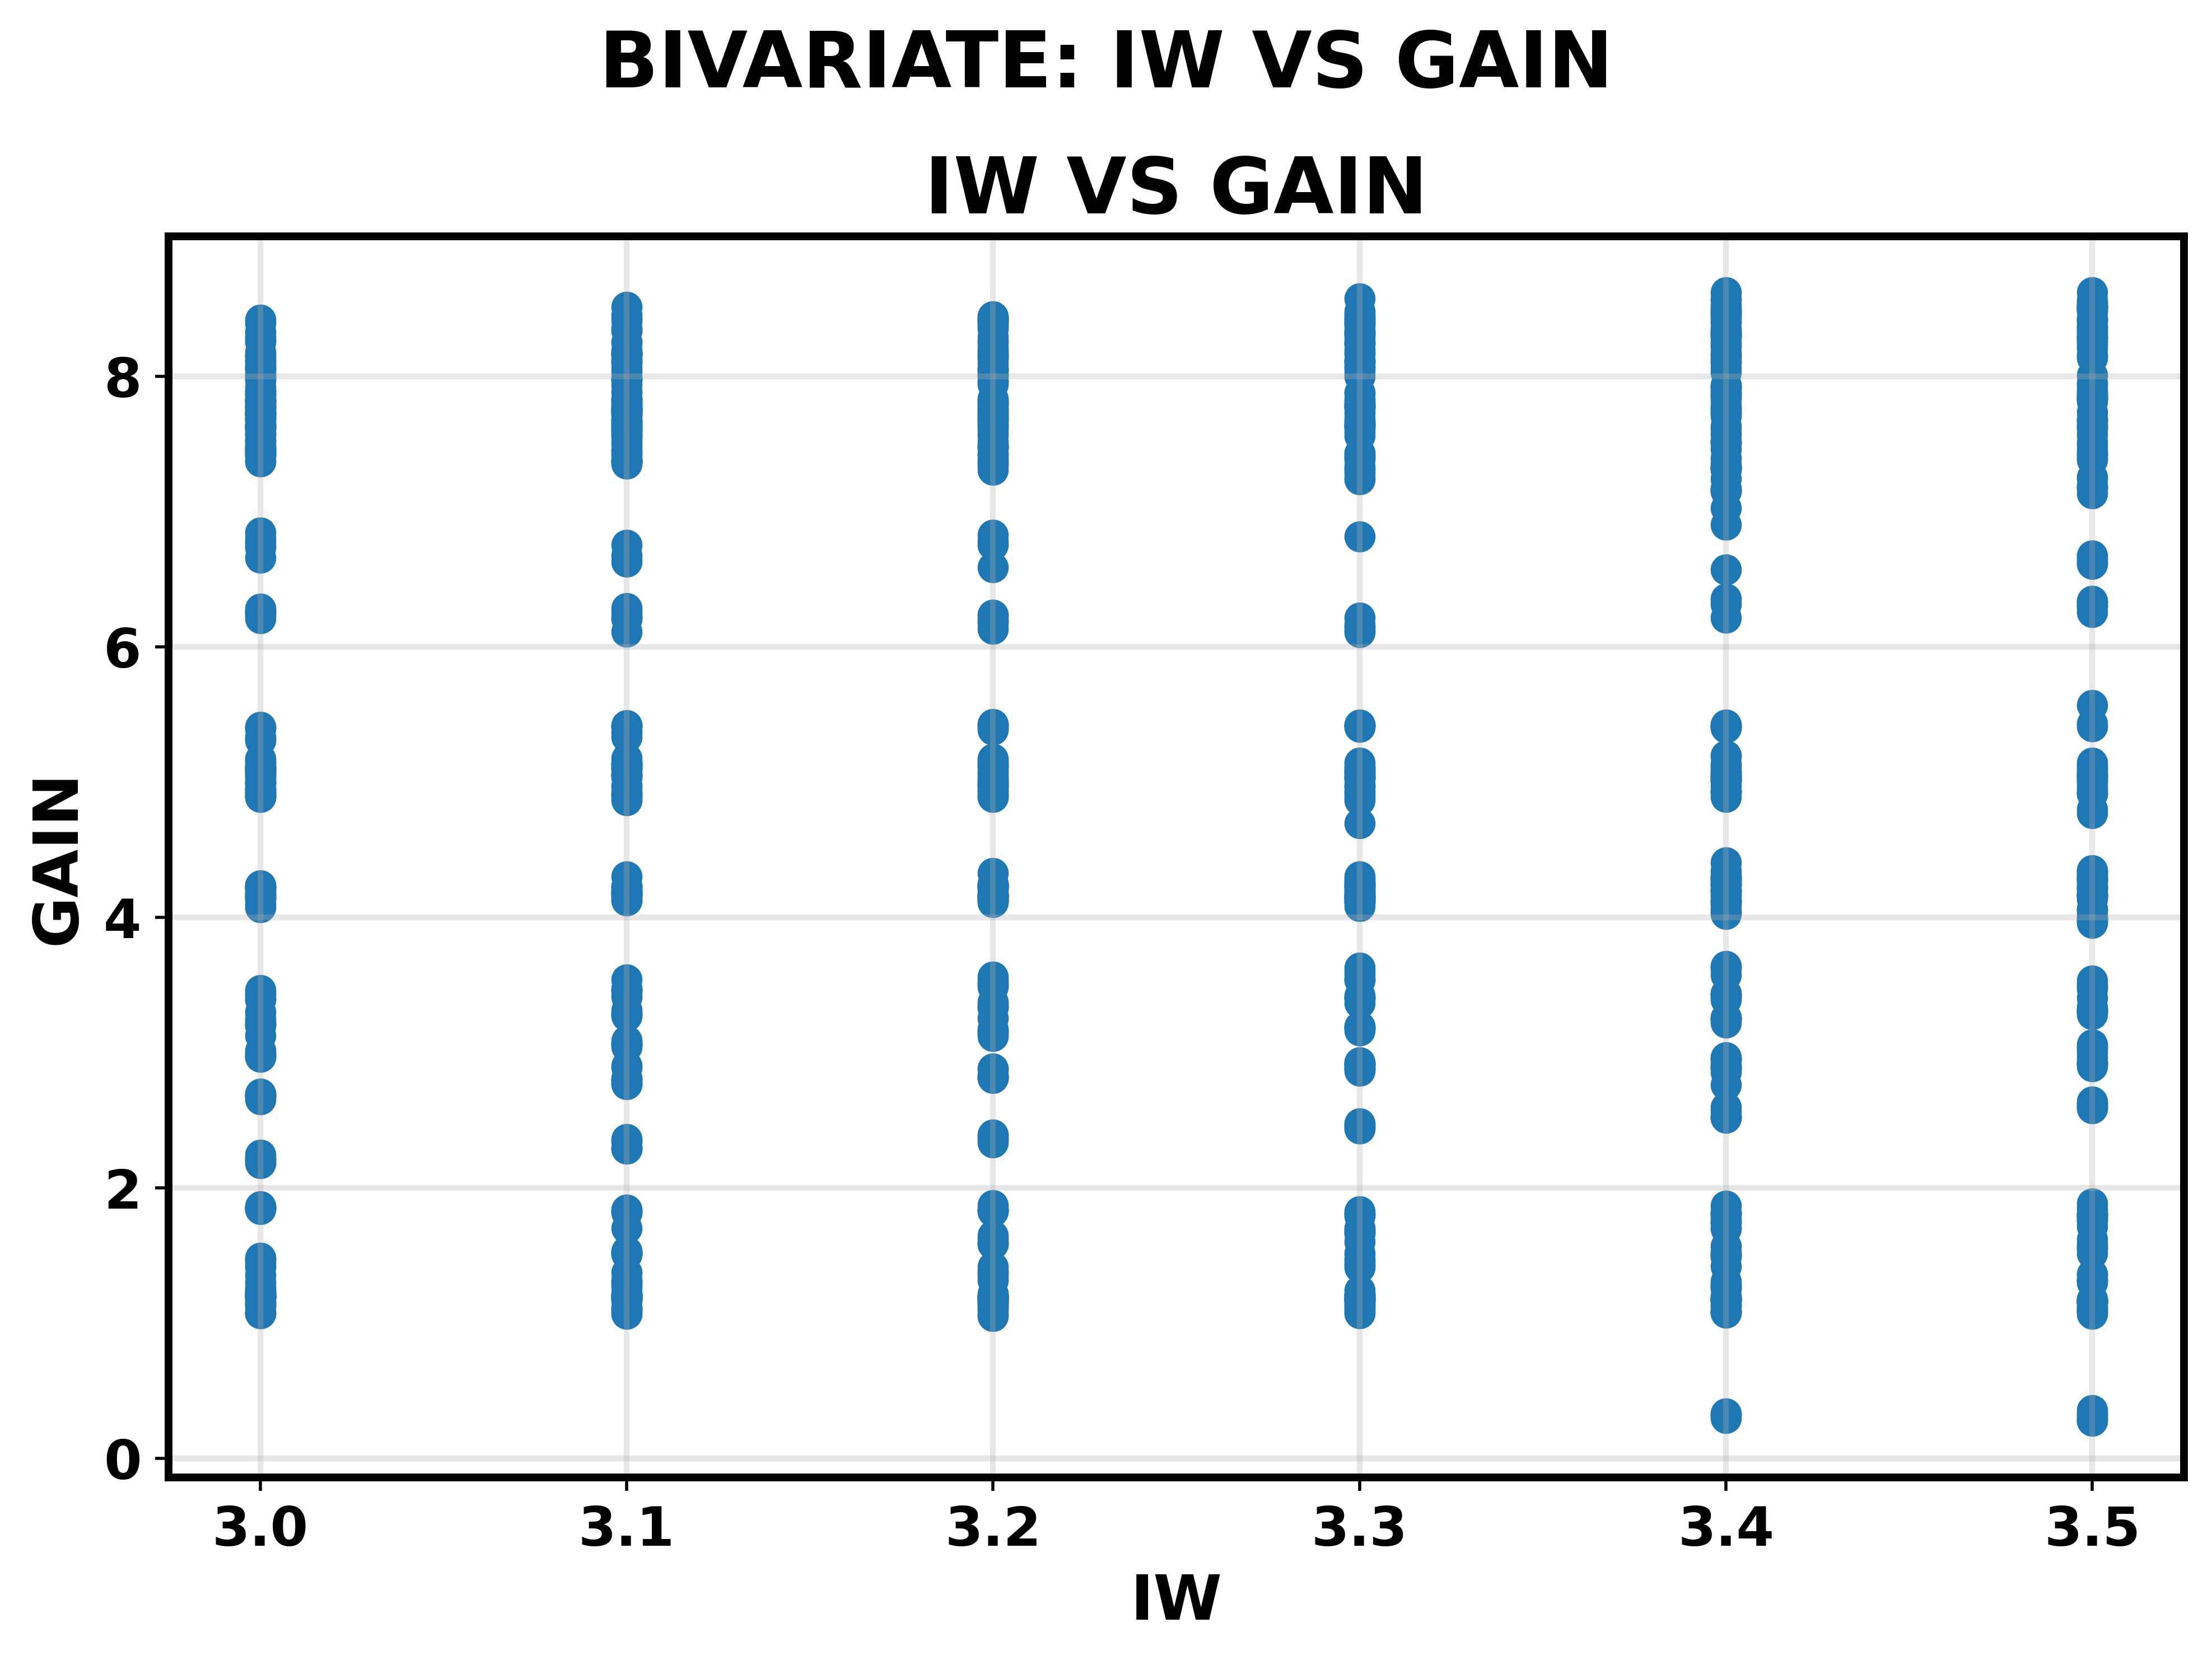

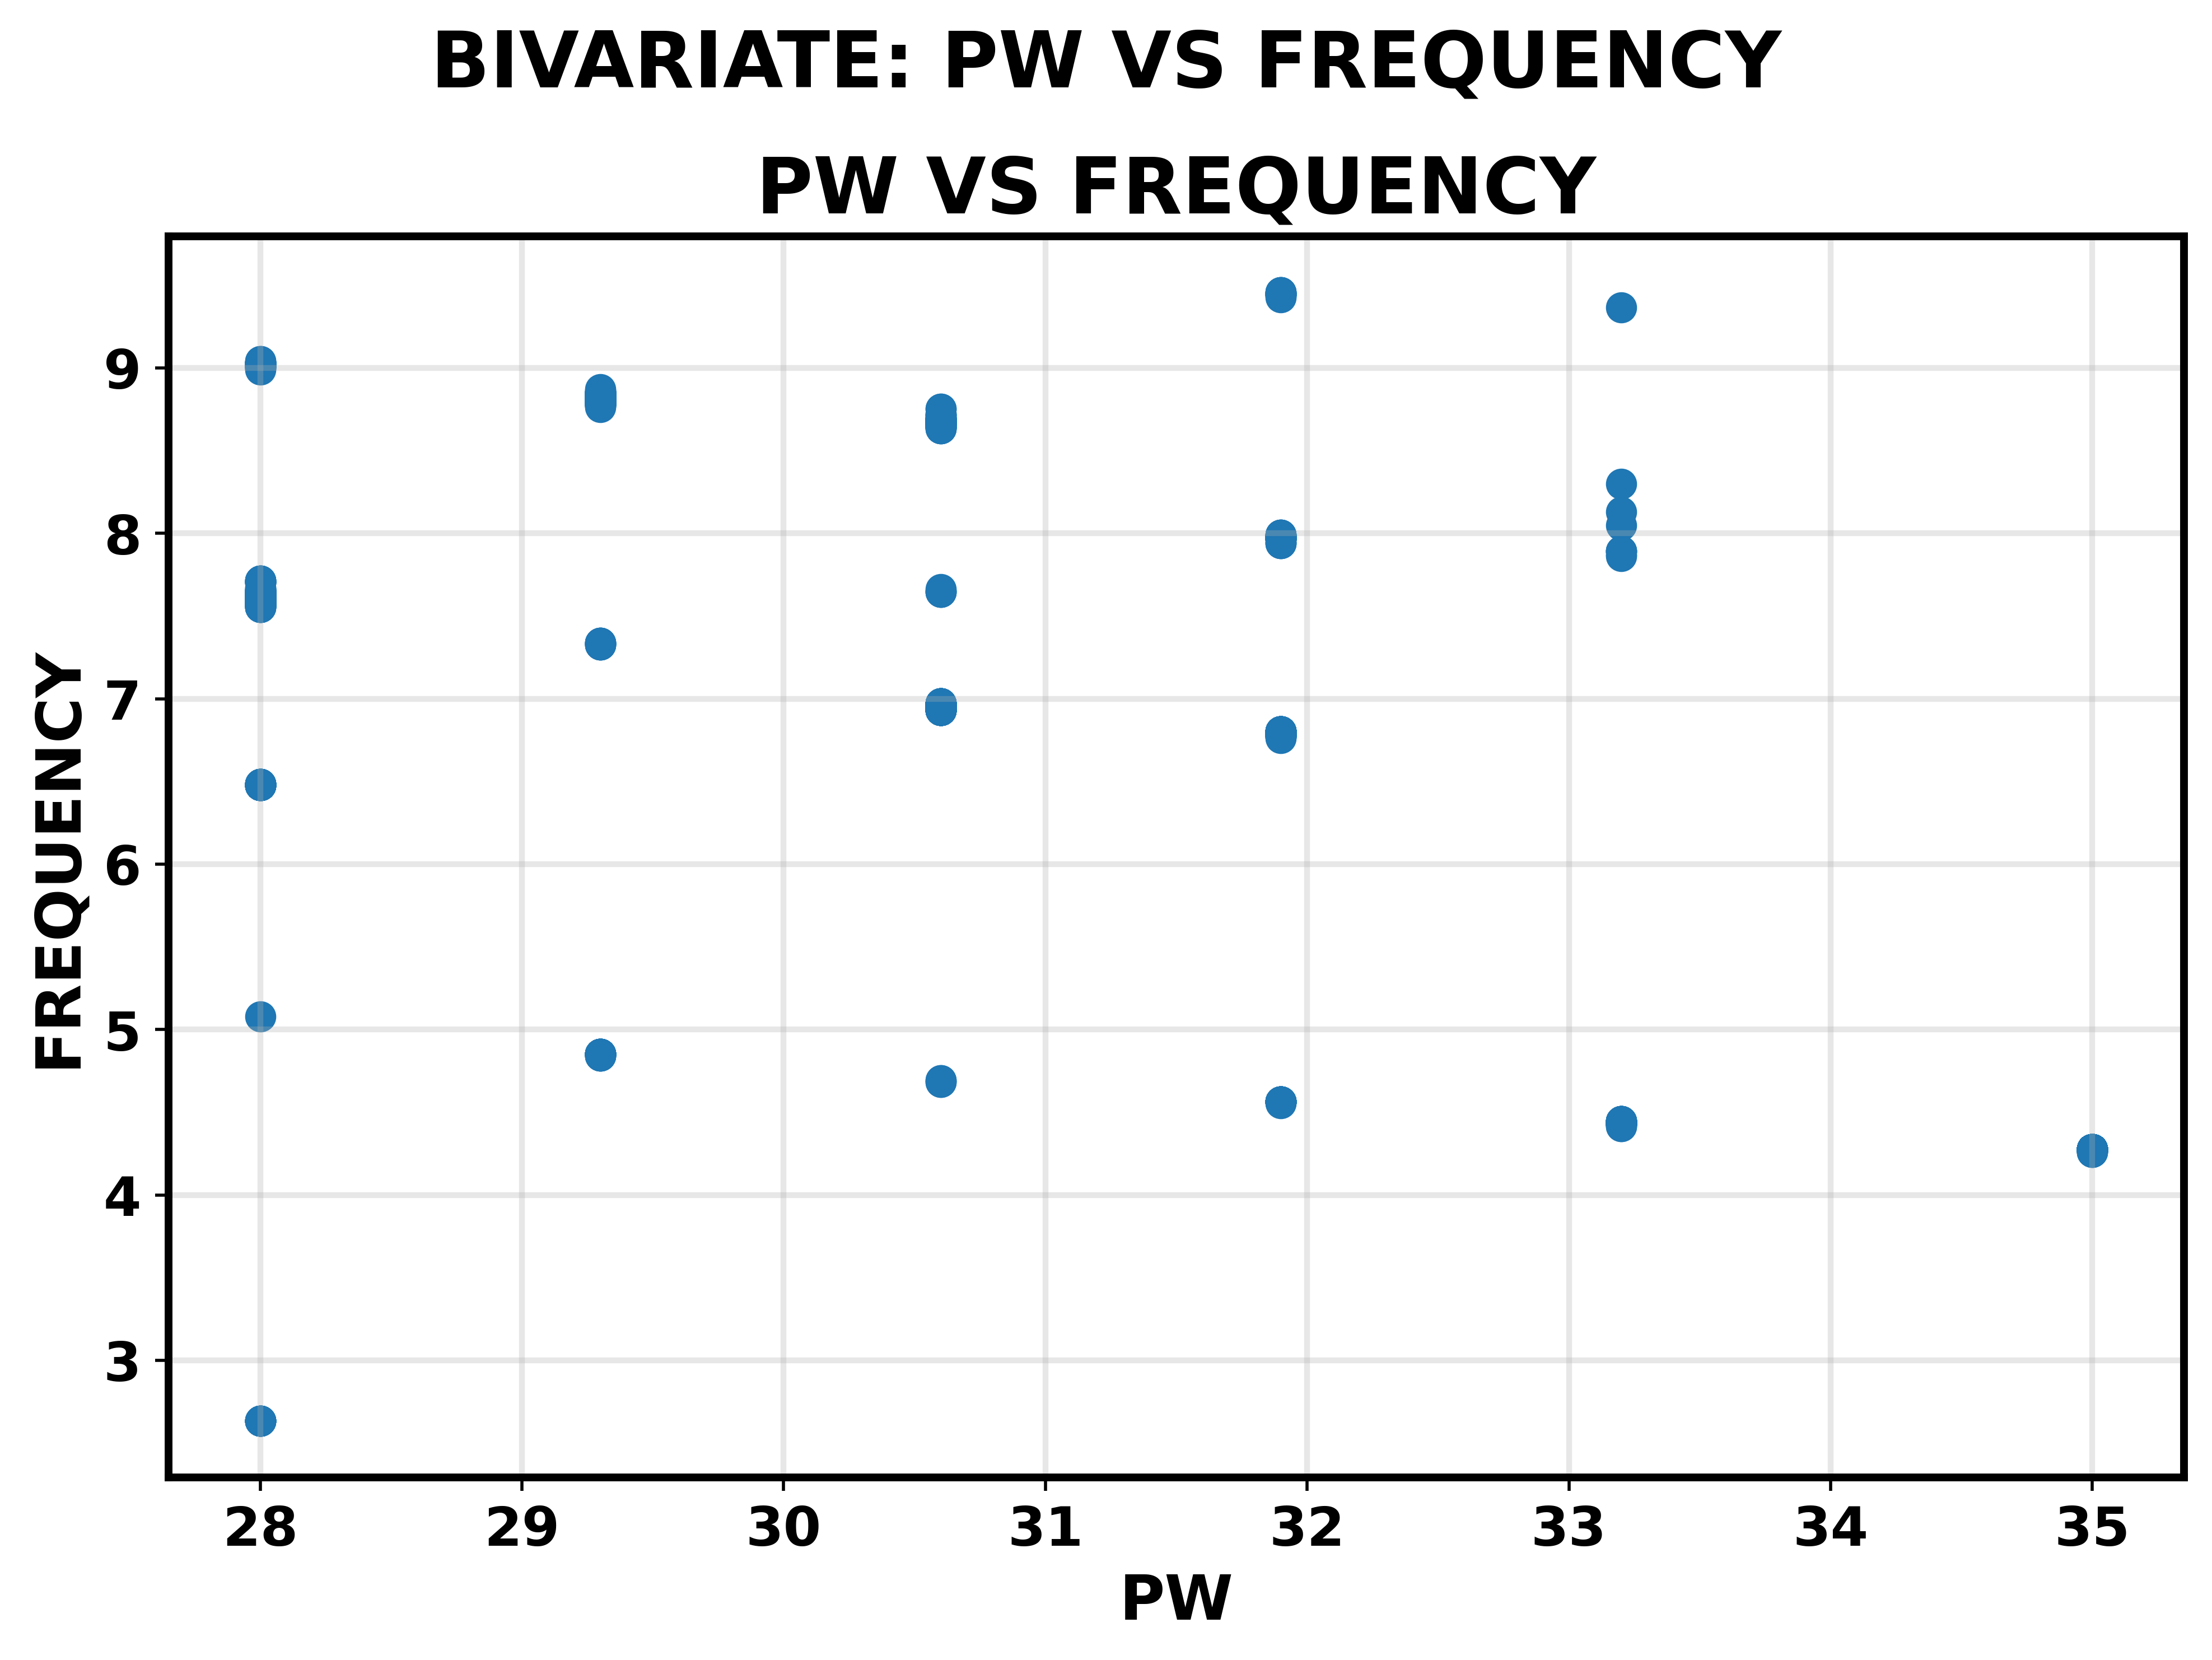

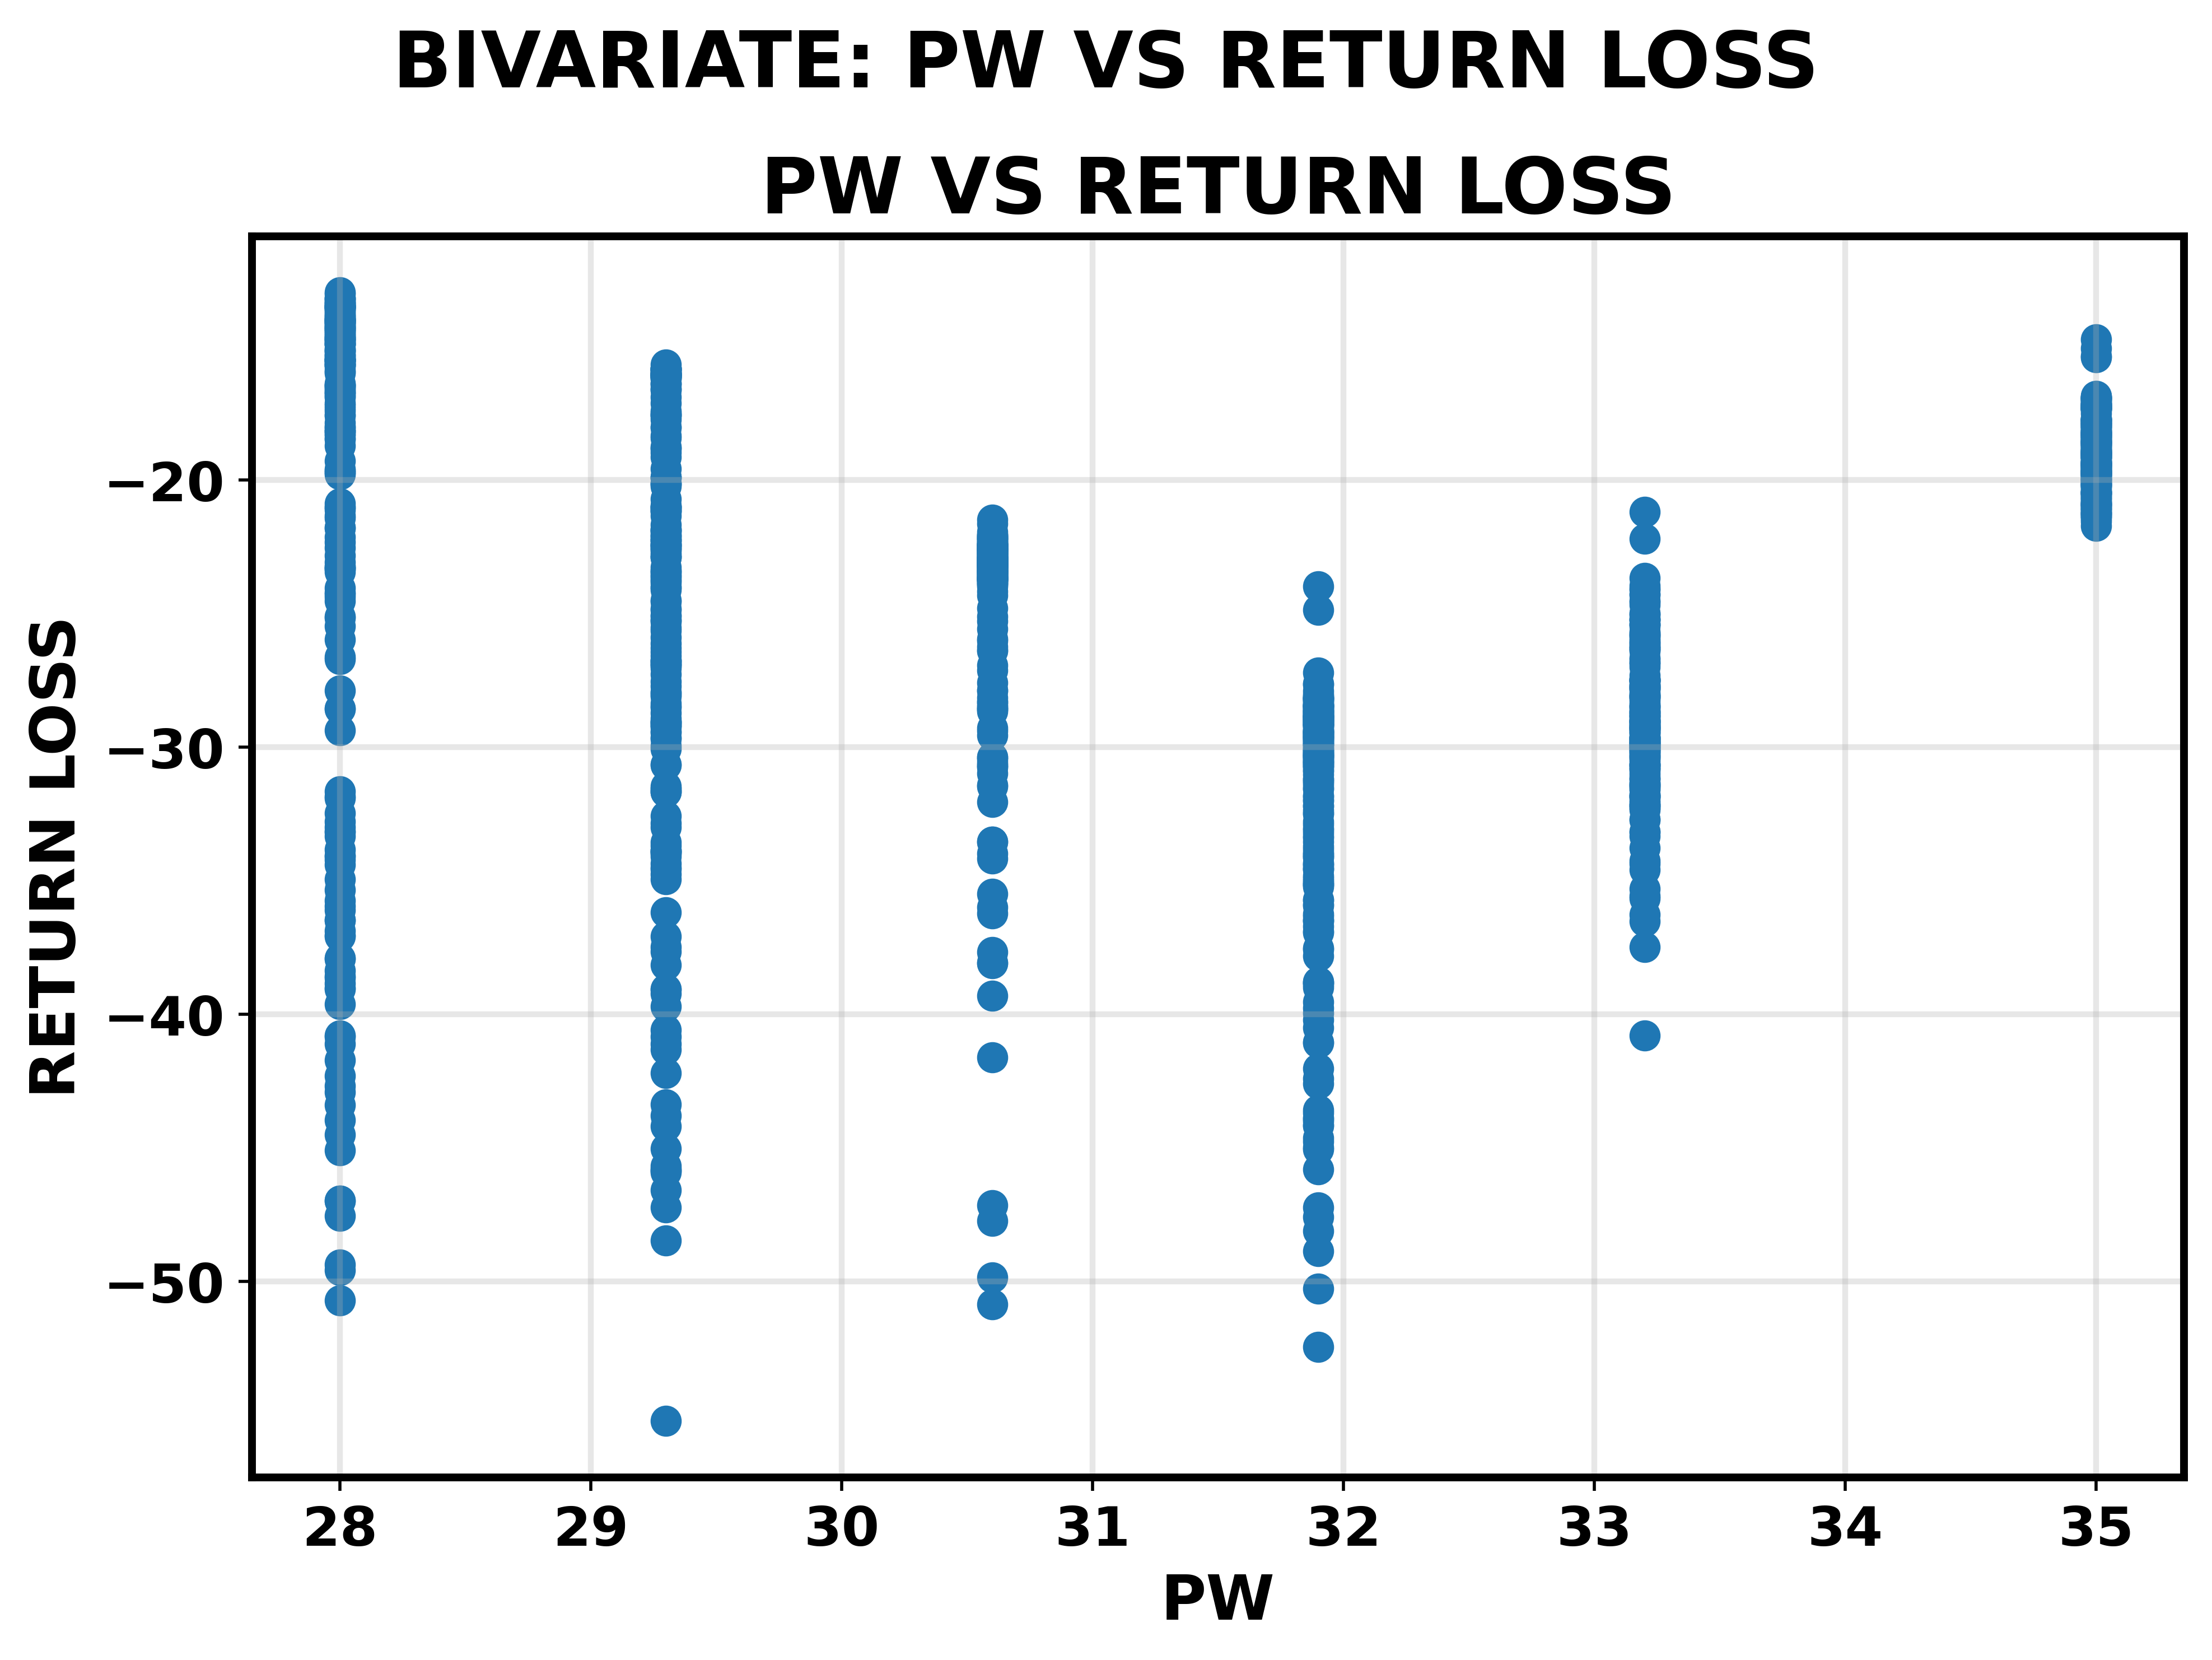

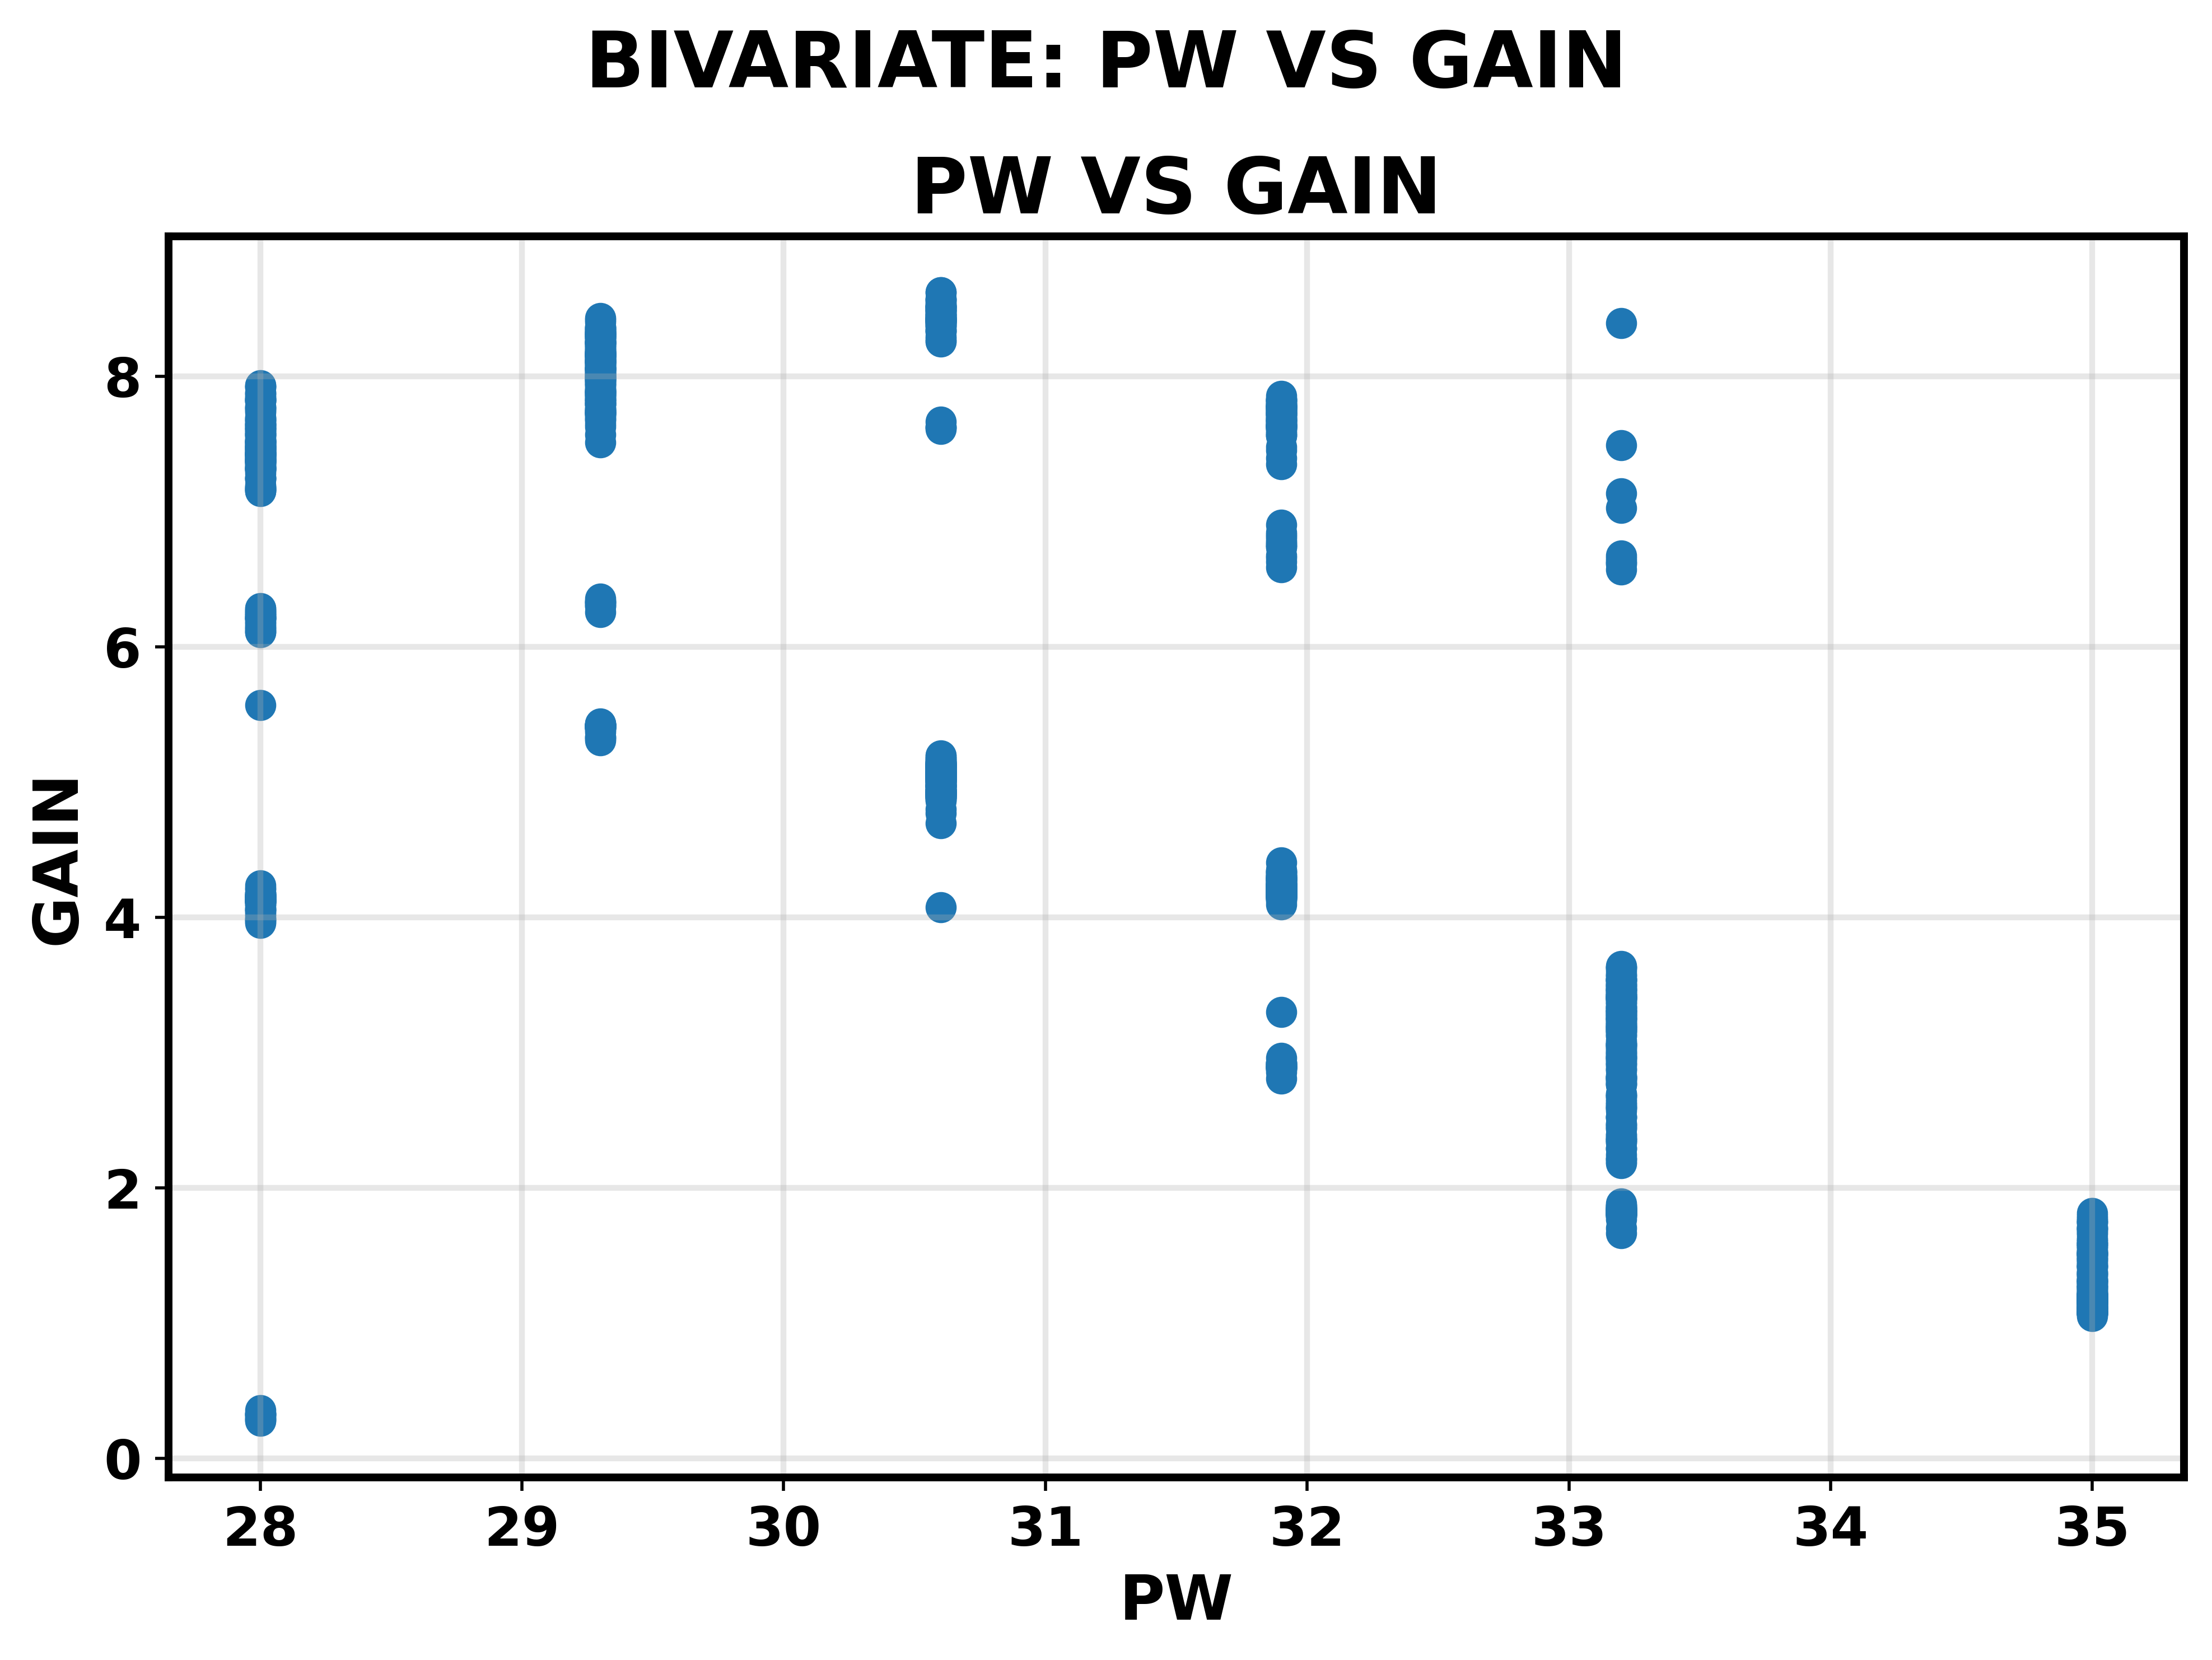

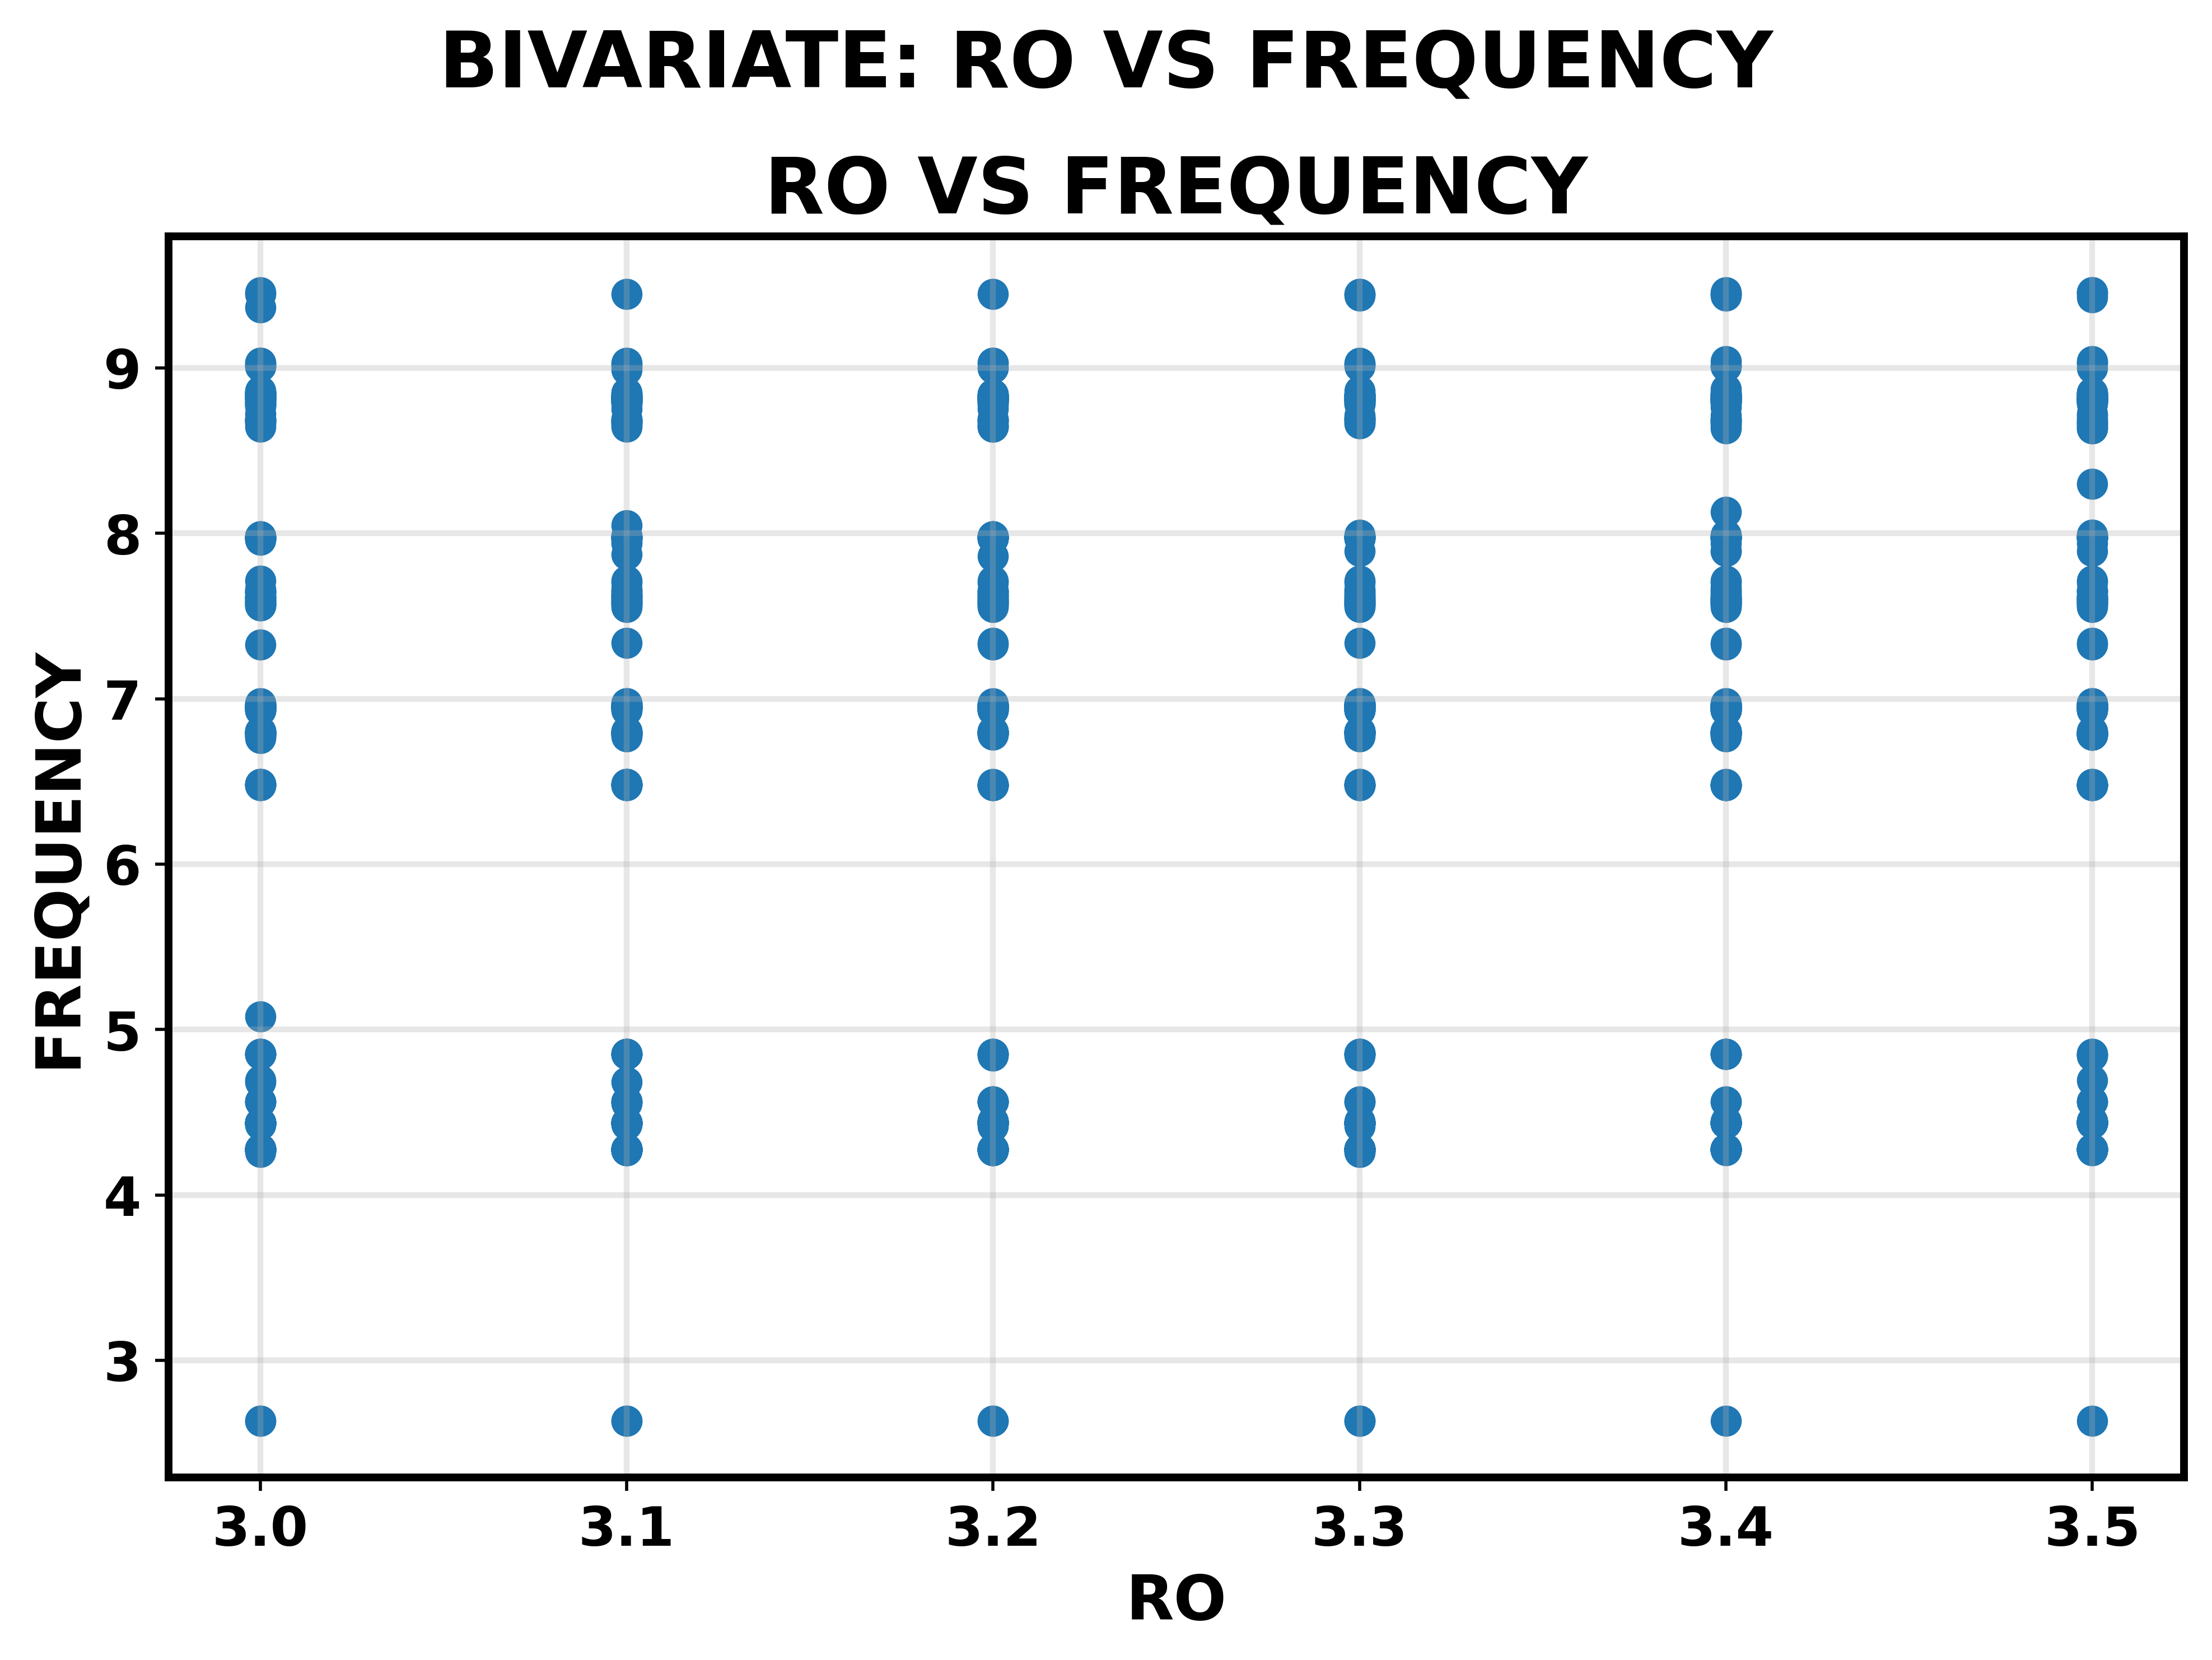

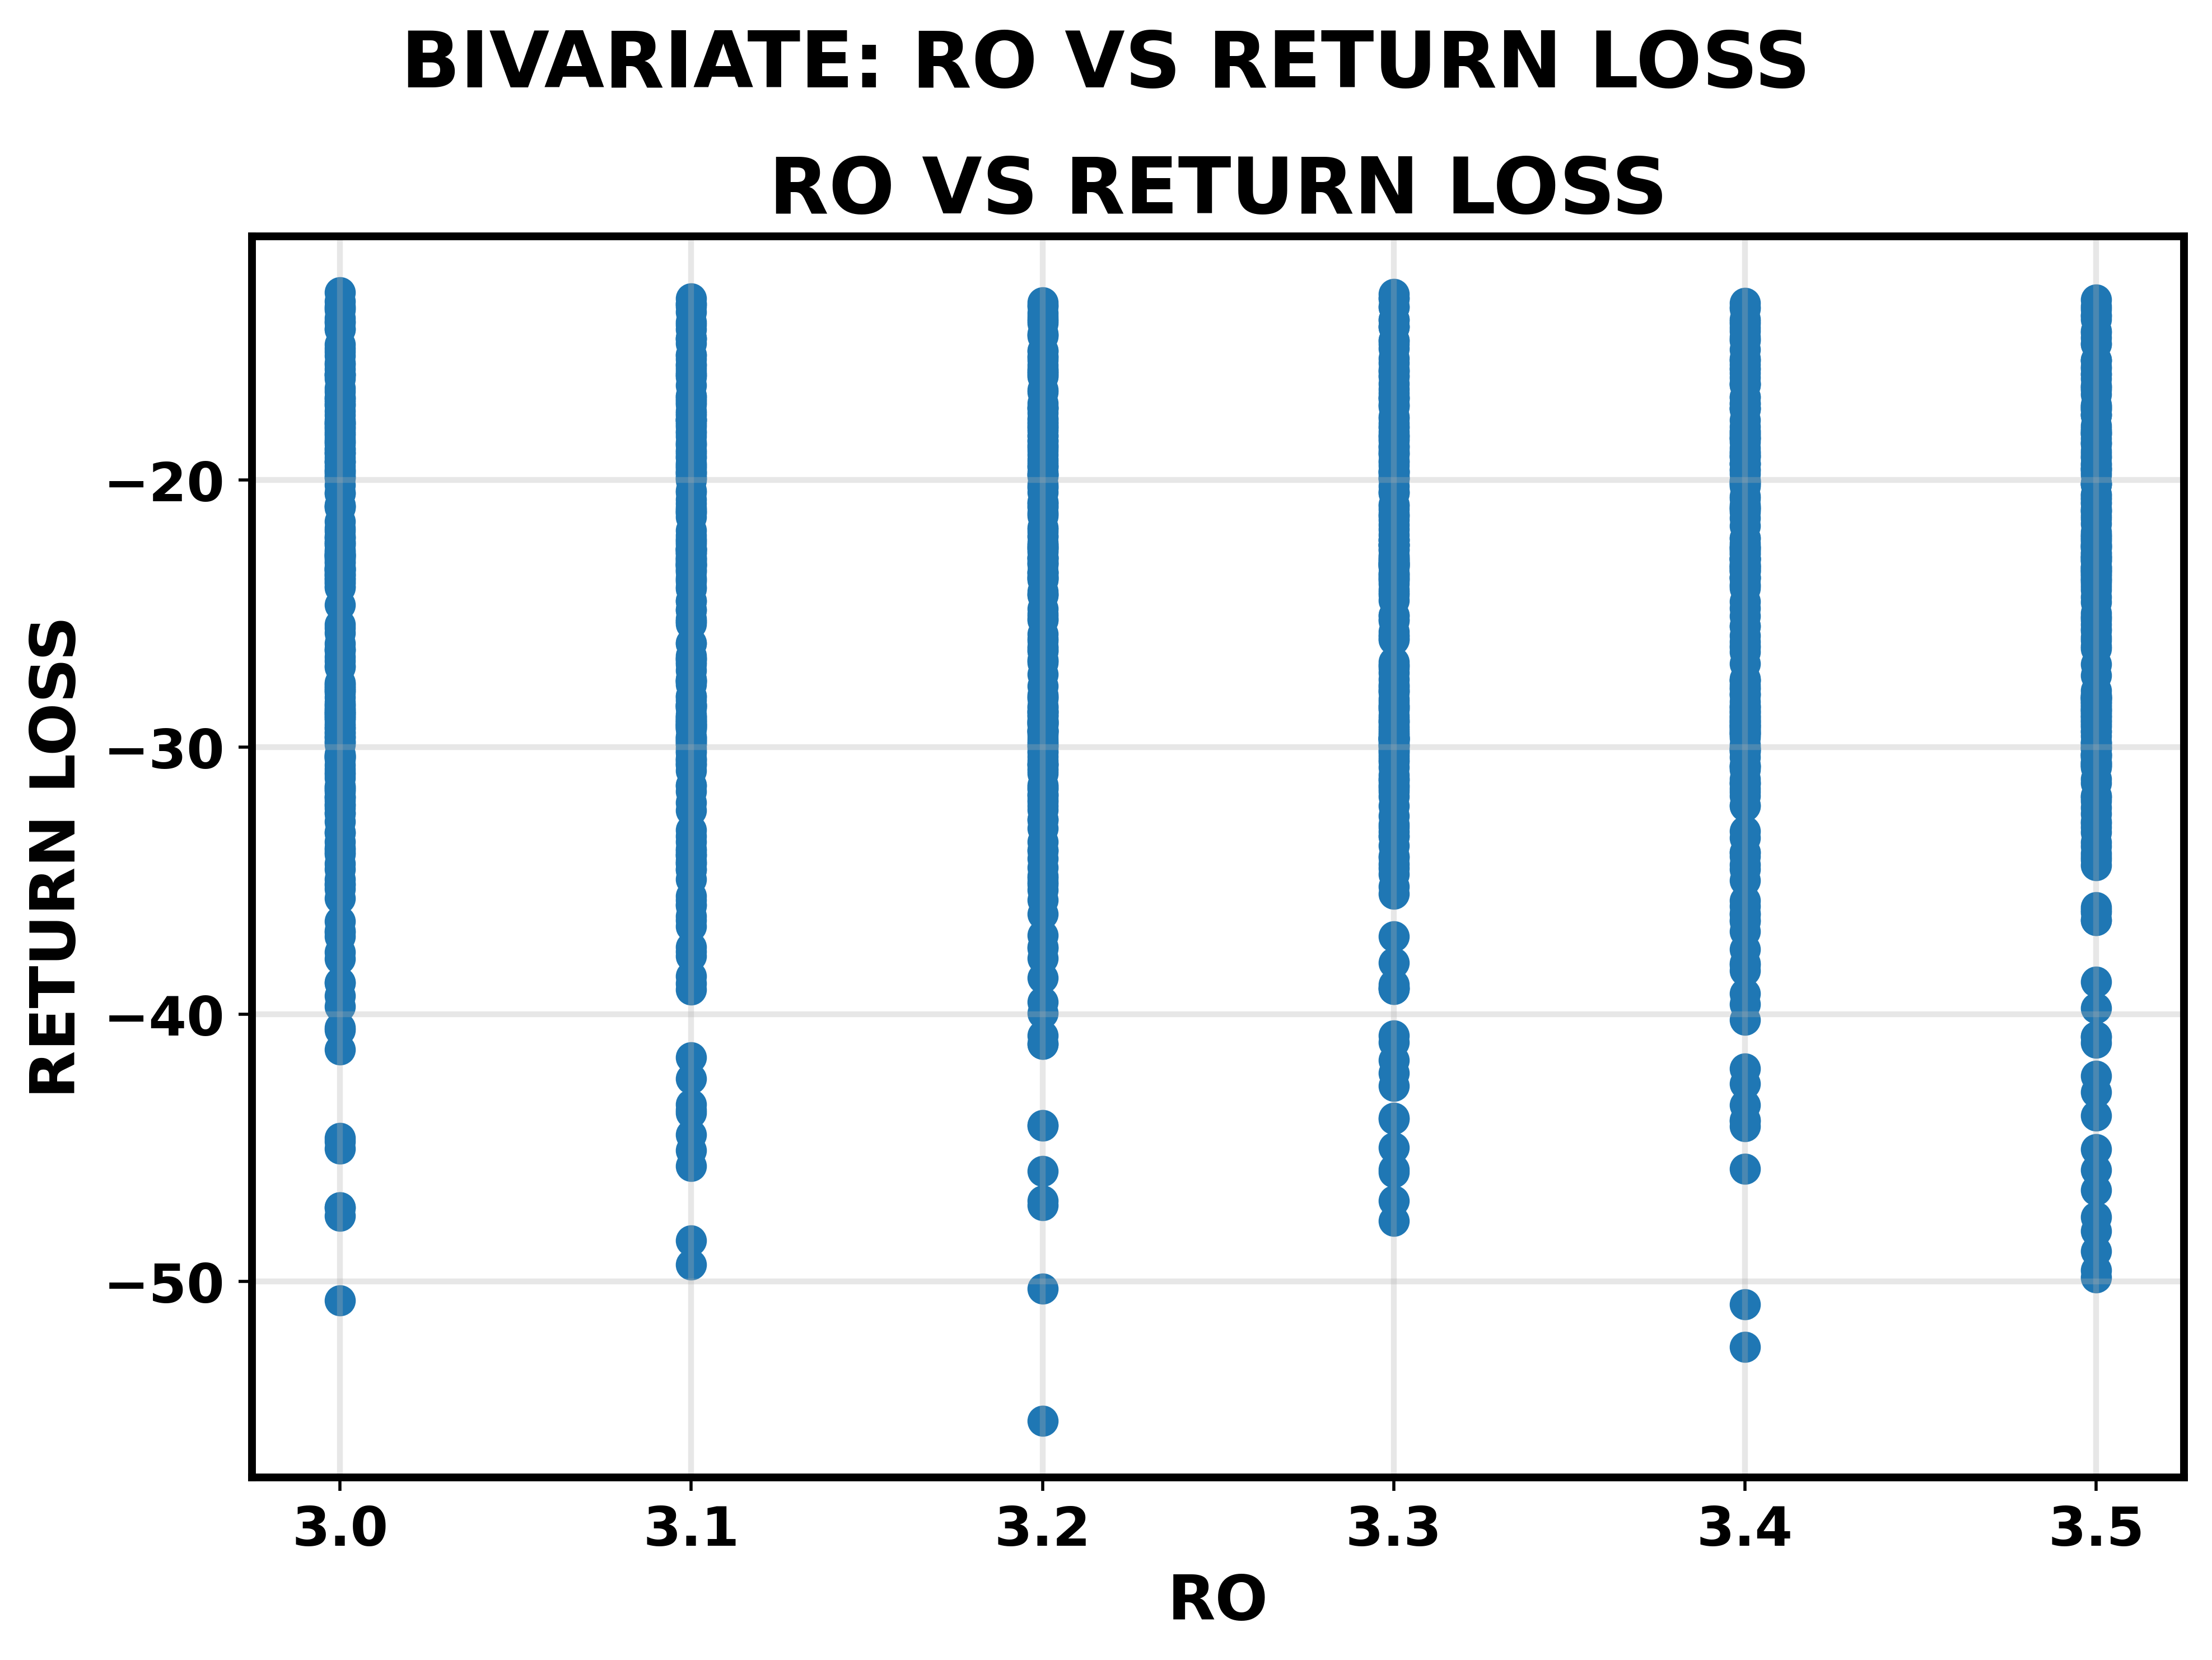

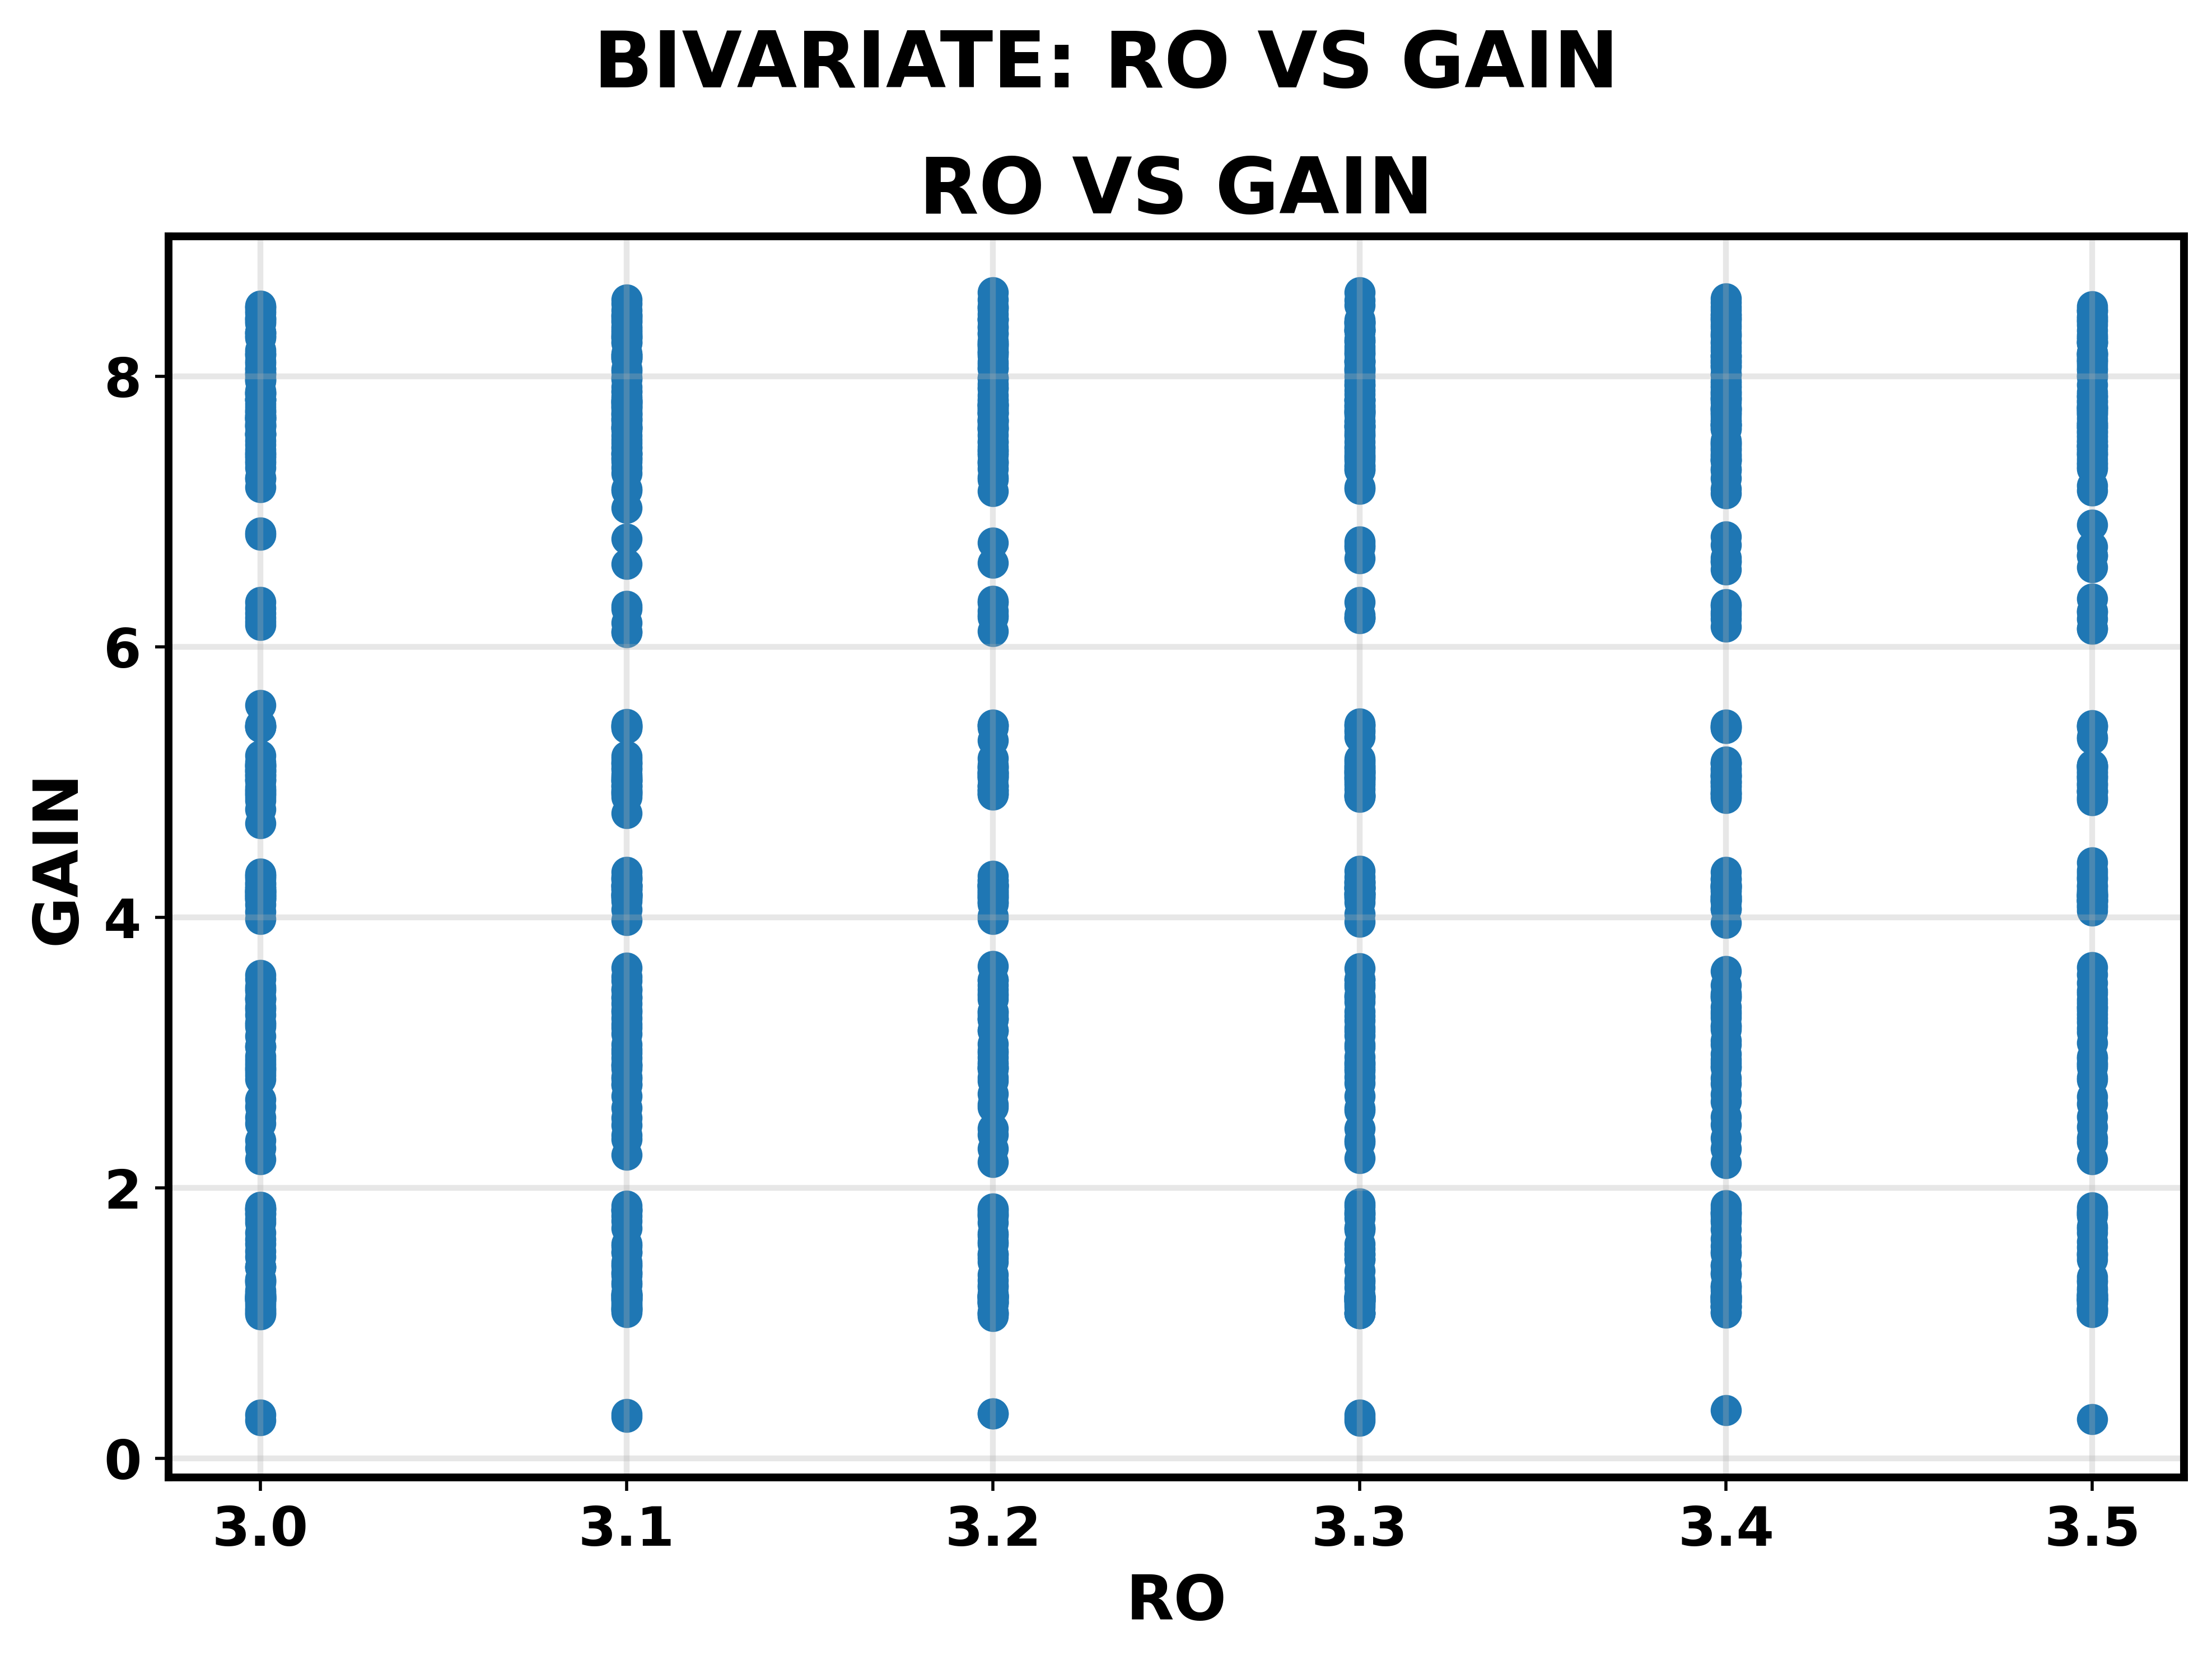

In [17]:
# SCATTER PLOTS: EACH FEATURE VS EACH TARGET, CORRELATION MATRIX, PAIRPLOT              

corr = df_model.corr()                                # COMPUTES CORRELATION MATRIX
fig, ax = plt.subplots()                              # CREATES FIGURE
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)  # HEATMAP WITH ANNOTATIONS
boldify_axes(ax, title="correlation heatmap", xlabel="columns", ylabel="columns") 
finalize_figure(fig, suptitle="multivariate correlation matrix")  # FINALIZES
plt.show()                                            # SHOWS PLOT

for feat in FEATURE_COLS:                             # LOOPS OVER FEATURES
    for tgt in TARGET_COLS:                           # LOOPS OVER TARGETS
        fig, ax = plt.subplots()                      # CREATES FIGURE
        ax.scatter(df_model[feat], df_model[tgt], linewidth=LINEWIDTH)       # SCATTER PLOT
        boldify_axes(ax, title=f"{feat} vs {tgt}", xlabel=feat, ylabel=tgt)  # FORMATS
        finalize_figure(fig, suptitle=f"bivariate: {feat} vs {tgt}")         # FINALIZES
        plt.show()                                    # DISPLAYS

# OPTIONAL PAIRPLOT (CAN BE SLOW FOR MANY COLUMNS; WE LIMIT TO FEATURES + TARGETS)      
pairplot_cols = FEATURE_COLS + TARGET_COLS            # COLUMNS TO INCLUDE
sns_pairplot = sns.pairplot(df_model[pairplot_cols], corner=True, plot_kws={"linewidth": LINEWIDTH})  # BUILDS PAIRPLOT
plt.suptitle("PAIRPLOT (FEATURES + TARGETS)".upper(), fontsize=FONTSIZE_TITLE, fontweight="bold")     # SUPTITLE
plt.tight_layout()                                    # TIGHT LAYOUT
plt.show()                                            # SHOWS PLOT

### K-FOLD SPLITTER PREVIEW

In [18]:
# PREPARES K-FOLD SPLITS AND PRINTS BASIC INDEX RANGES FOR SANITY CHECK                  

kf = KFold(n_splits=N_SPLITS, shuffle=SHUFFLE_KFOLD, random_state=KFOLD_RANDOM_STATE)  # DEFINES K-FOLD
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_processed), start=1):       # LOOPS OVER FOLDS
    print(f"FOLD {fold_idx}: TRAIN={len(train_idx)}, VAL={len(val_idx)}")              # PRINTS SIZES
    if fold_idx == 1:                                                                  # JUST SHOW INDICES SAMPLE FOR FIRST FOLD
        print("TRAIN IDX SAMPLE:", train_idx[:10])                                     # FIRST 10 TRAIN INDICES
        print("VAL IDX SAMPLE:", val_idx[:10])                                         # FIRST 10 VAL INDICES

FOLD 1: TRAIN=1036, VAL=260
TRAIN IDX SAMPLE: [0 1 2 3 4 5 6 7 8 9]
VAL IDX SAMPLE: [10 23 29 31 32 43 44 48 49 51]
FOLD 2: TRAIN=1037, VAL=259
FOLD 3: TRAIN=1037, VAL=259
FOLD 4: TRAIN=1037, VAL=259
FOLD 5: TRAIN=1037, VAL=259
